In [9]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import tensorflow as tf

from Training_Data.Particle_Tracking_Training_Data import Particle_Tracking_Training_Data
from tensorflow.keras.utils import register_keras_serializable

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
from tensorflow.keras import layers, models

# Goal 2: Given ground truth labels, extract particle positions in each video frame
Simply stated, given `labels` approximate `tracks`. So this project essentially ignores the training videos.

## Does your method work for hypothetical neural network output?
The neural network output is a probability distribution with values between zero and one.

# DBSCAN

In [91]:
# Initialize a list to store the coordinates of marked points for each frame
particle_positions_per_frame = []

# Iterate through each frame
for frame_index in range(predicted_labels.shape[0]):
    # Find the coordinates of all points marked as True in the current frame
    y_positions, x_positions = np.where(predicted_labels[frame_index])

    # For each marked point, record its coordinates
    frame_particle_positions = list(zip(y_positions, x_positions))

    # Add the list of coordinates for all marked points in the current frame to the total list
    particle_positions_per_frame.append(frame_particle_positions)

# particle_positions_per_frame now contains the coordinates of all marked points in each frame, in the form of (y, x)

In [92]:
from sklearn.cluster import DBSCAN
import numpy as np

centers_per_frame = []  # Store the center positions of particles for each frame

for frame_positions in particle_positions_per_frame:
    # Ensure frame_positions is a NumPy array
    frame_positions_np = np.array(frame_positions)

    # Apply DBSCAN algorithm
    dbscan = DBSCAN(eps=3, min_samples=3)
    clusters = dbscan.fit_predict(frame_positions_np)

    # Find the center positions of each cluster (particle)
    centers = []
    for label in set(clusters):
        if label != -1:  # Exclude noise points
            # Calculate the centroid for each cluster
            center = frame_positions_np[clusters == label].mean(axis=0)
            centers.append(center)
    
    centers_per_frame.append(centers)

# centers_per_frame now contains the center positions of each particle for every frame

In [93]:
# Visualizing testing videos and labels
@interact(t=(0, Nt-1, 1))
def plotfn(t=0, show_tracks=True):
    fig = figure(1, [14, 7])
    fig.add_subplot(121)
    imshow(test_vid[t], origin='lower')
    if show_tracks:
        plot(test_tracks[t, :, 0], test_tracks[t, :, 1], 'rx')
    xlim(-10, 265)
    ylim(-10, 265)
    
    fig.add_subplot(122)
    imshow(test_vid[t], origin='lower')
    imshow(test_labels[t, ..., 1], origin='lower')

interactive(children=(IntSlider(value=0, description='t', max=49), Checkbox(value=True, description='show_trac…

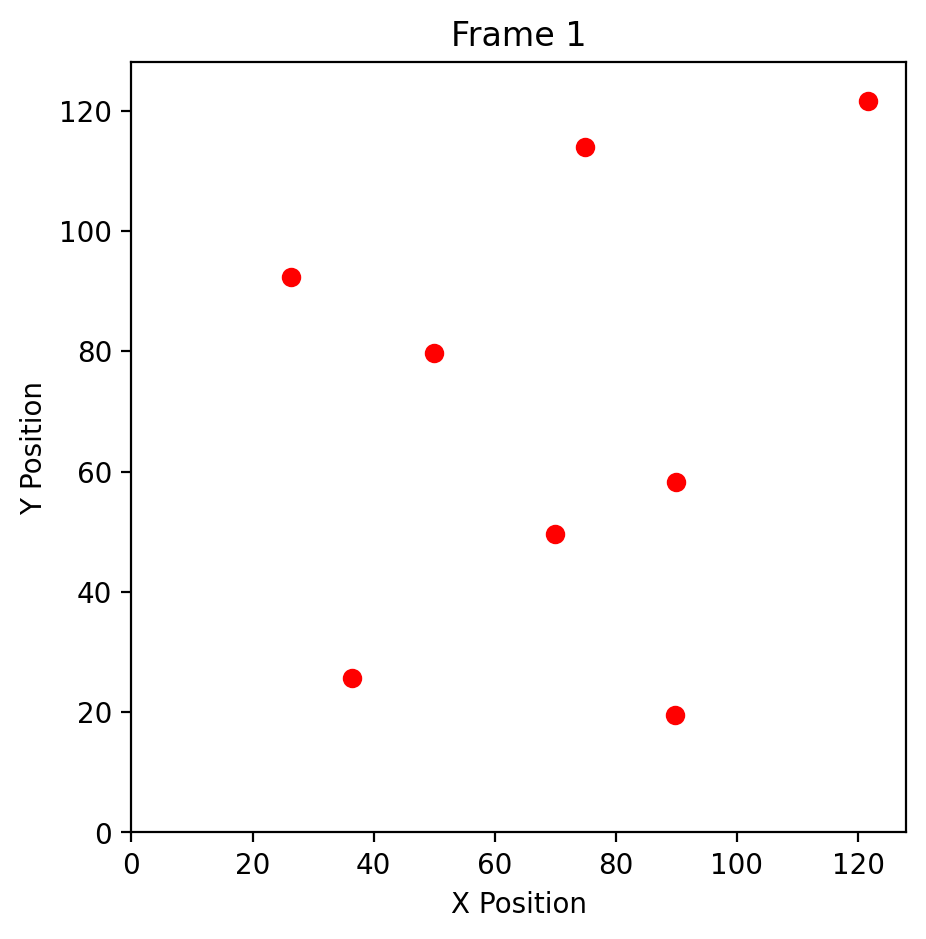

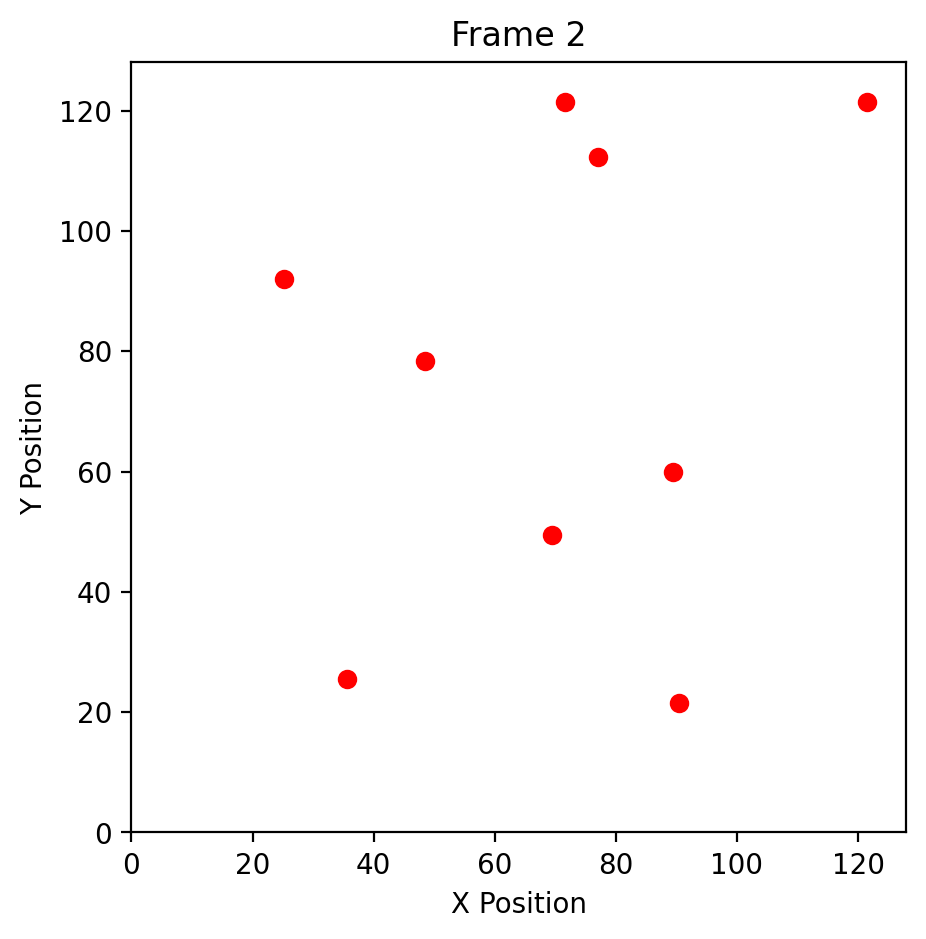

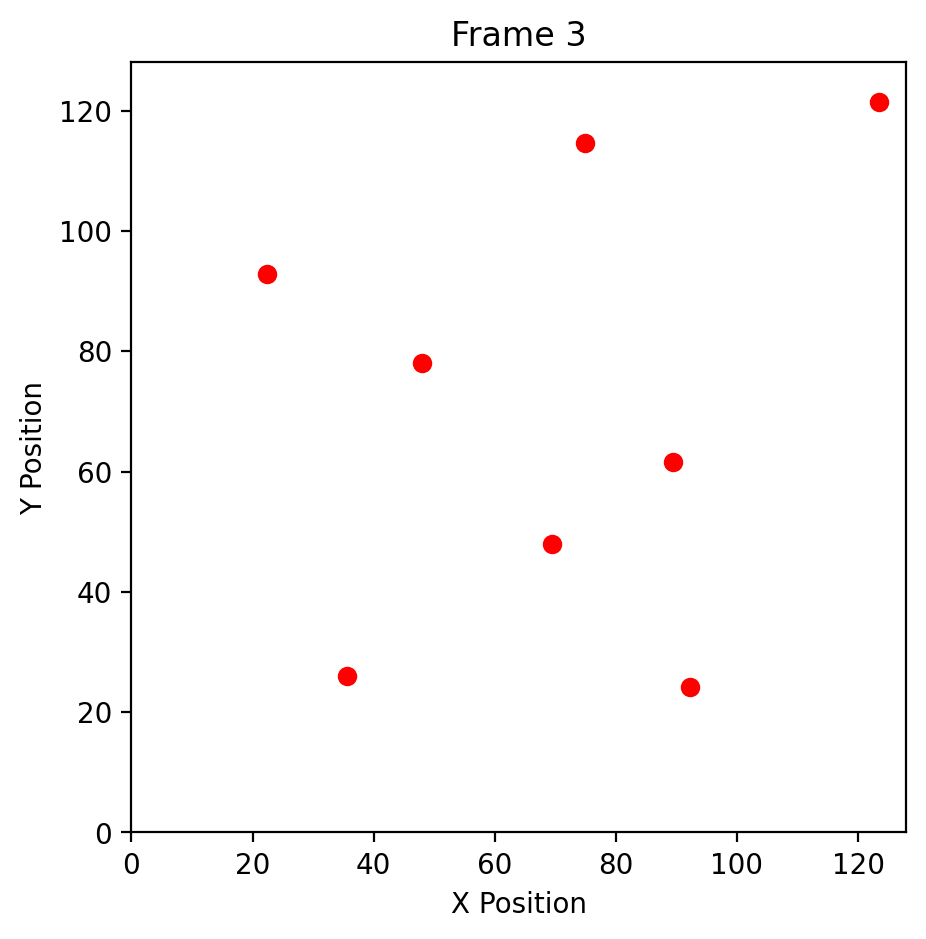

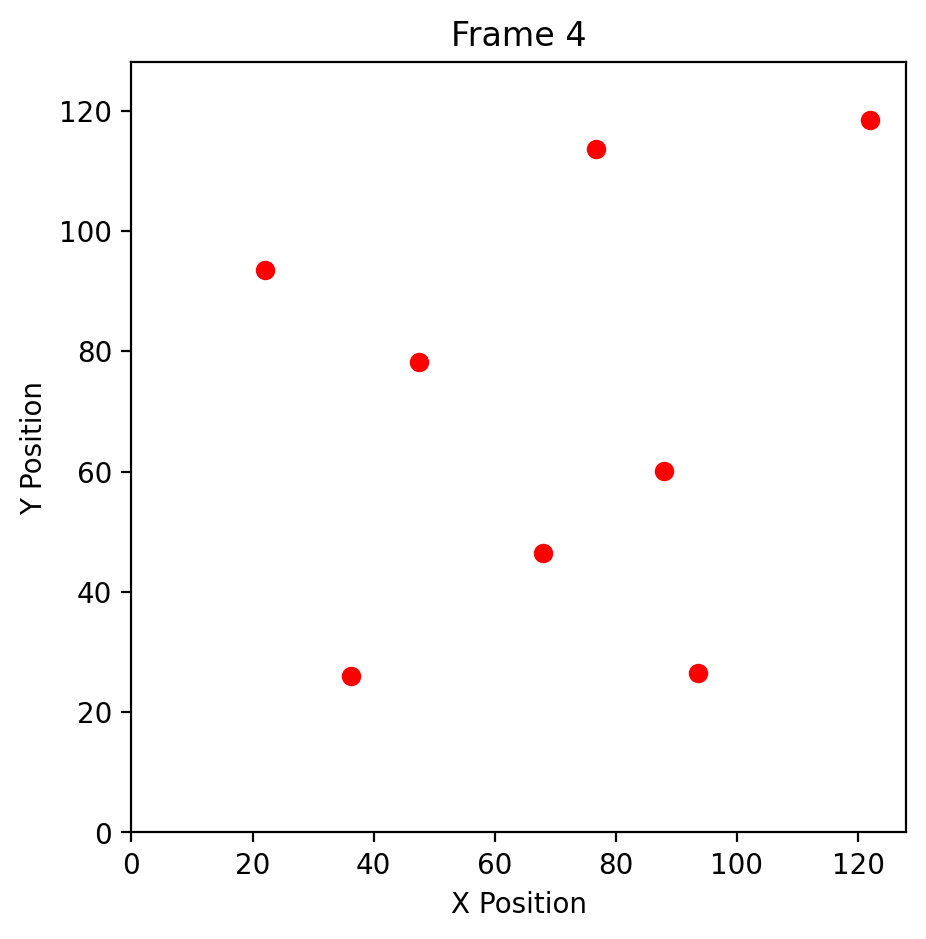

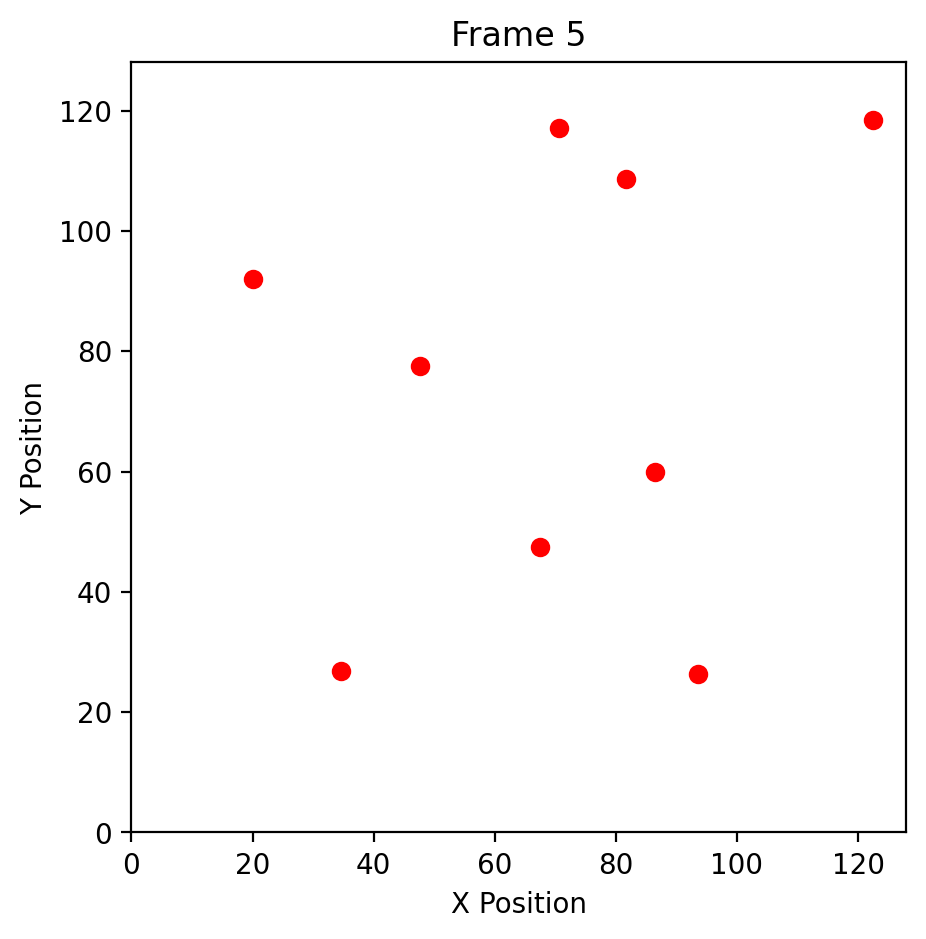

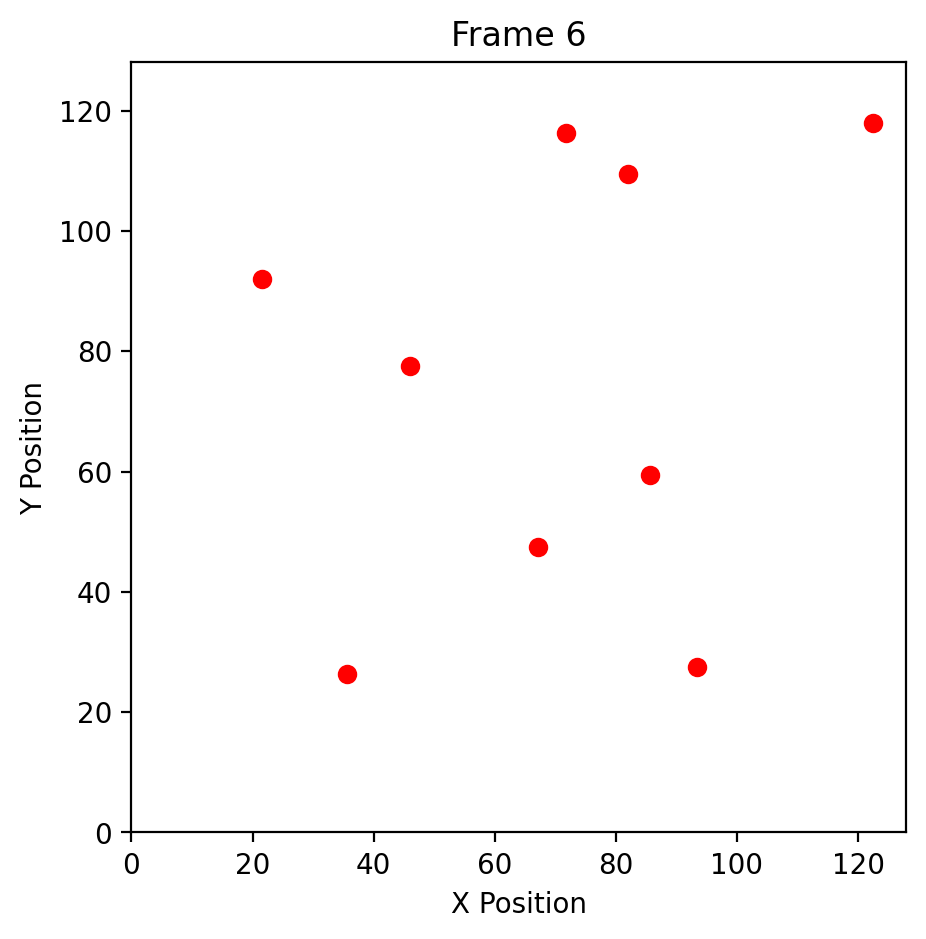

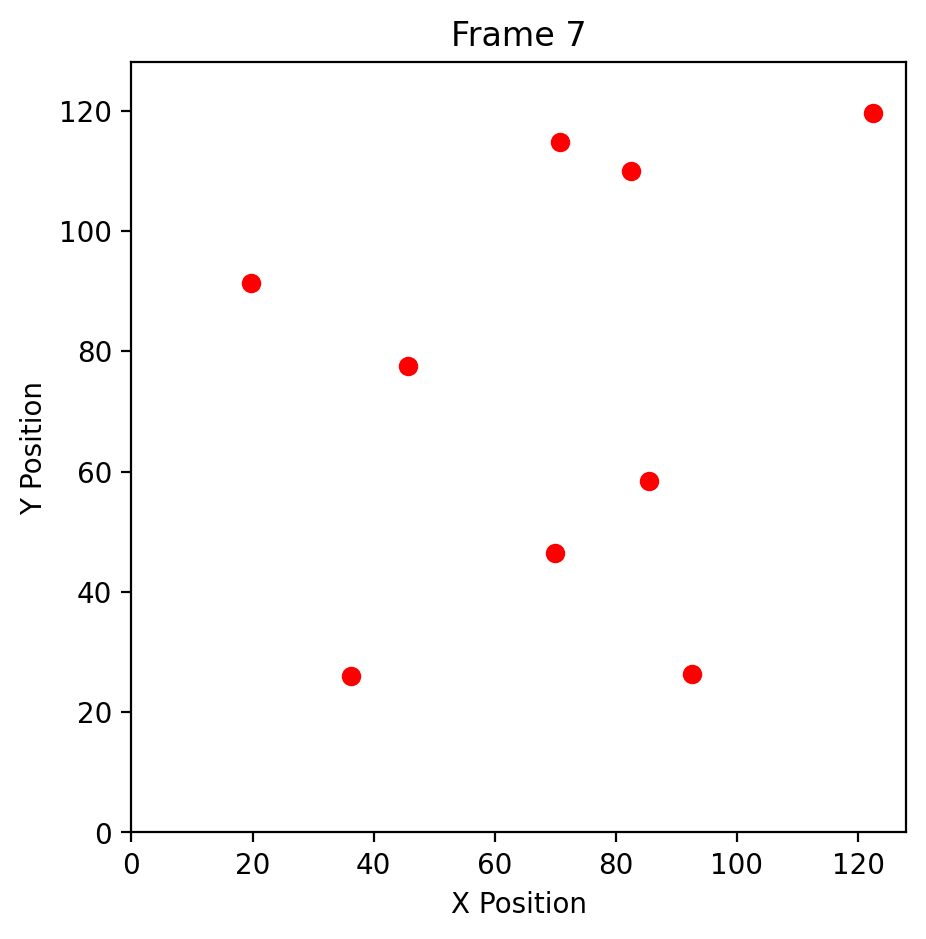

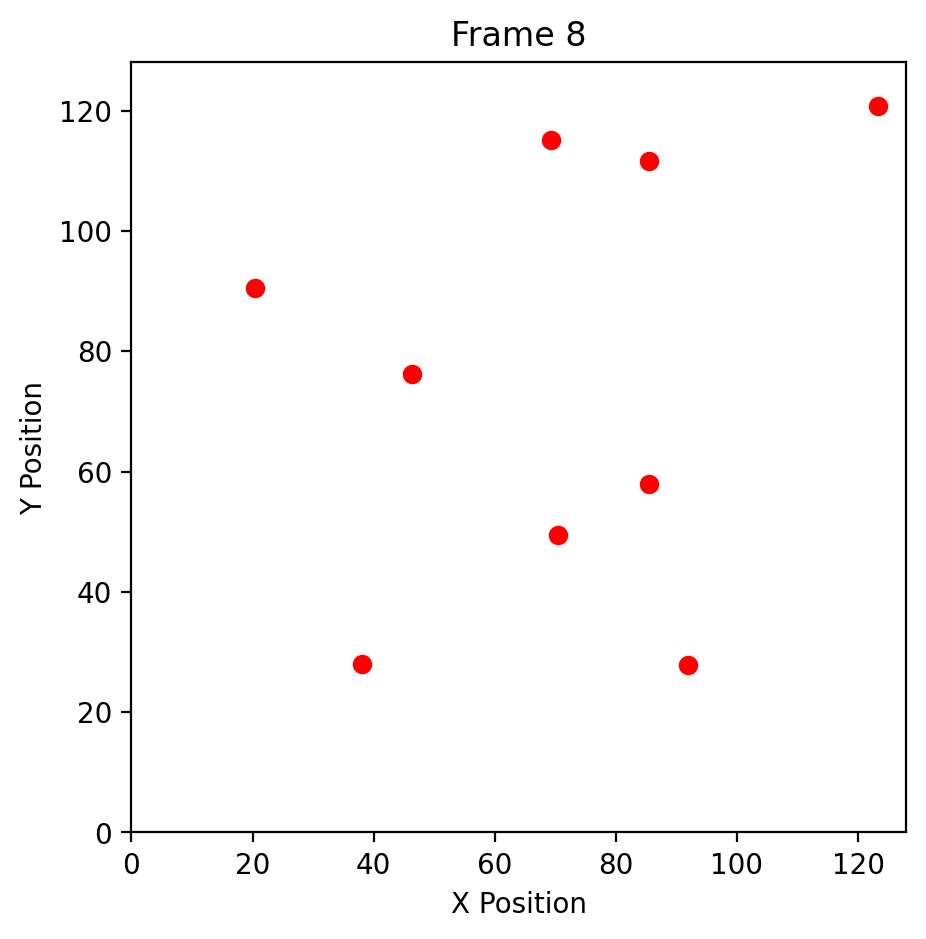

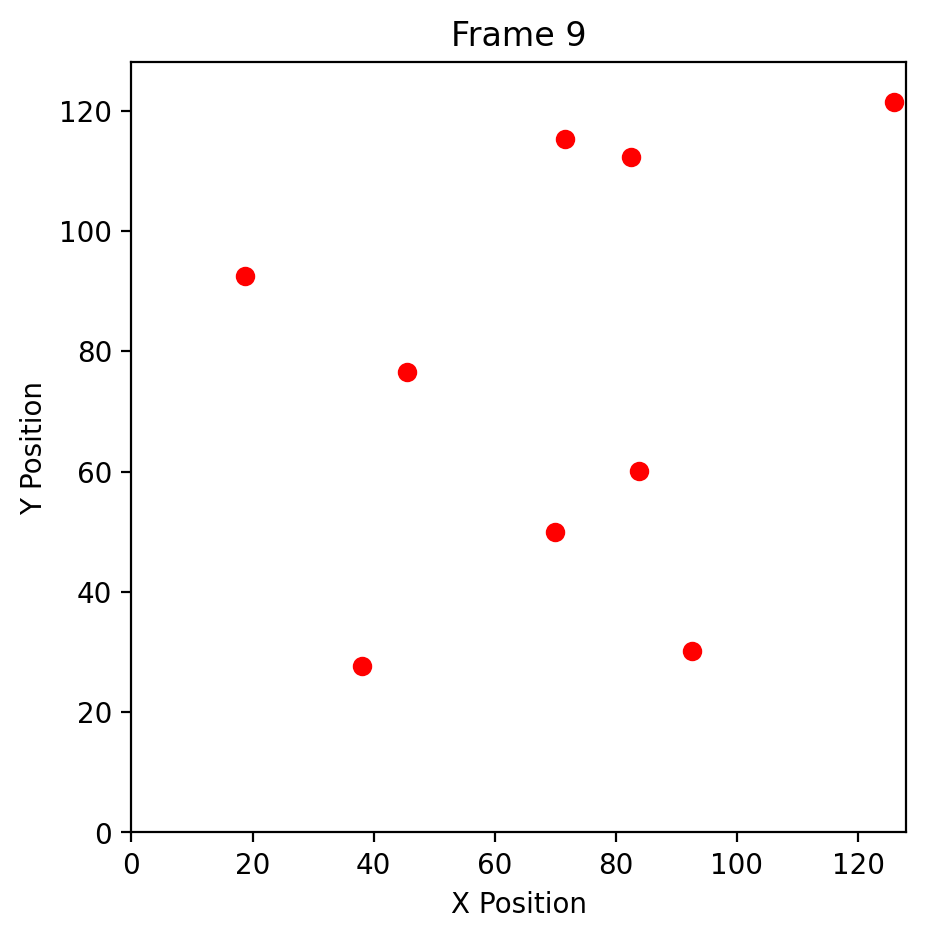

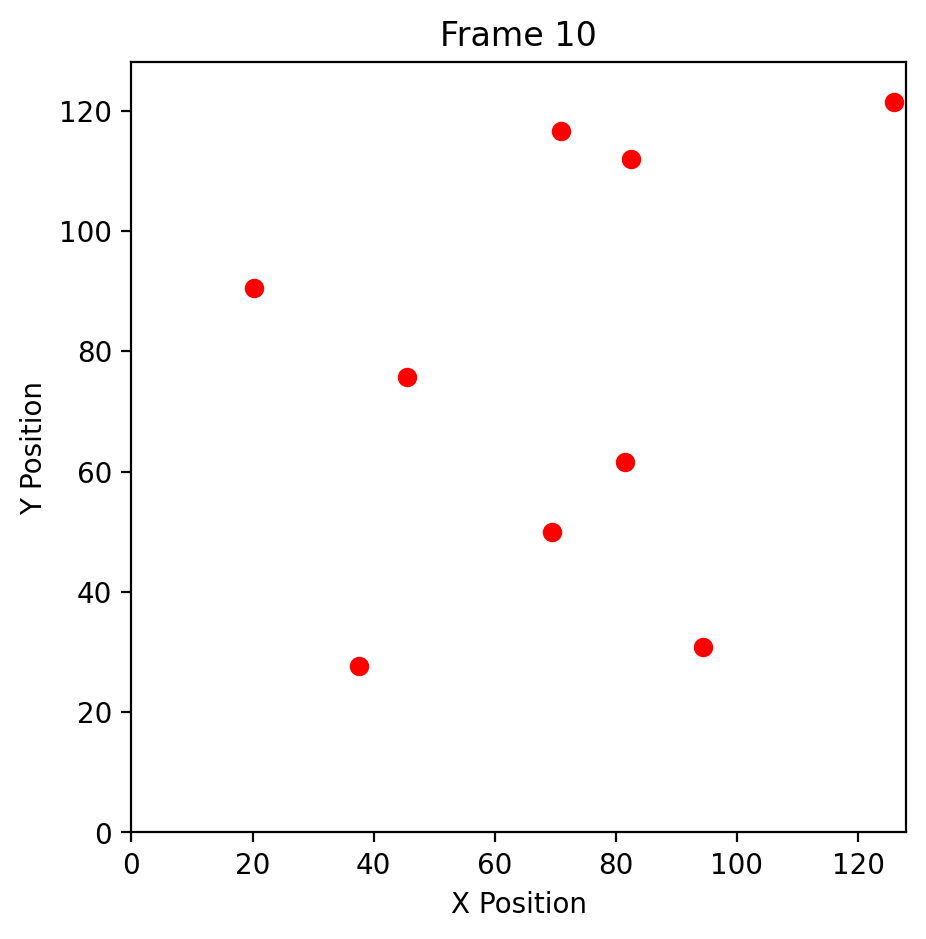

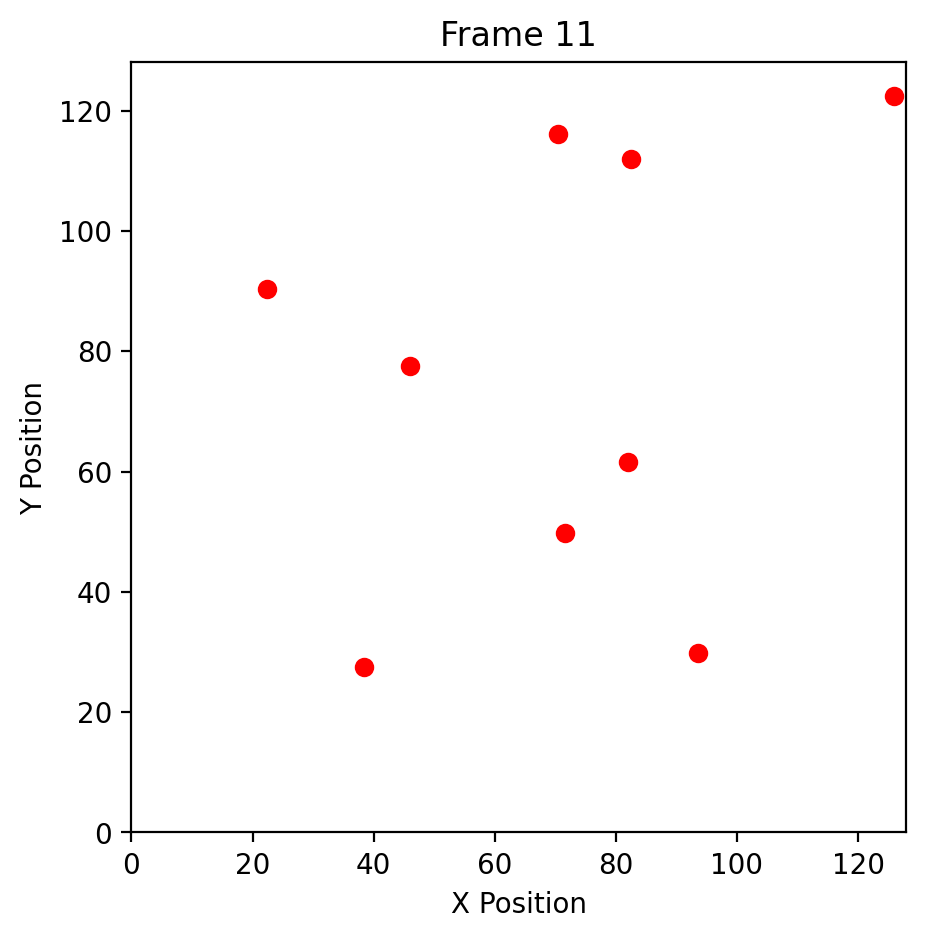

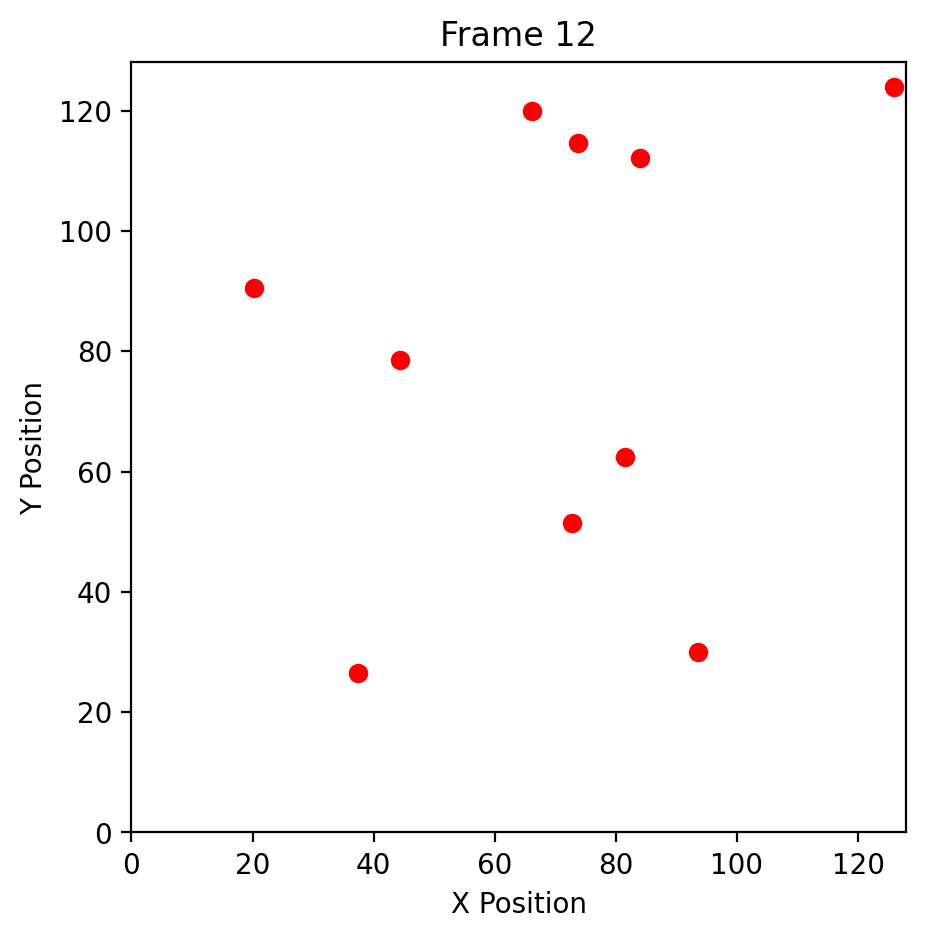

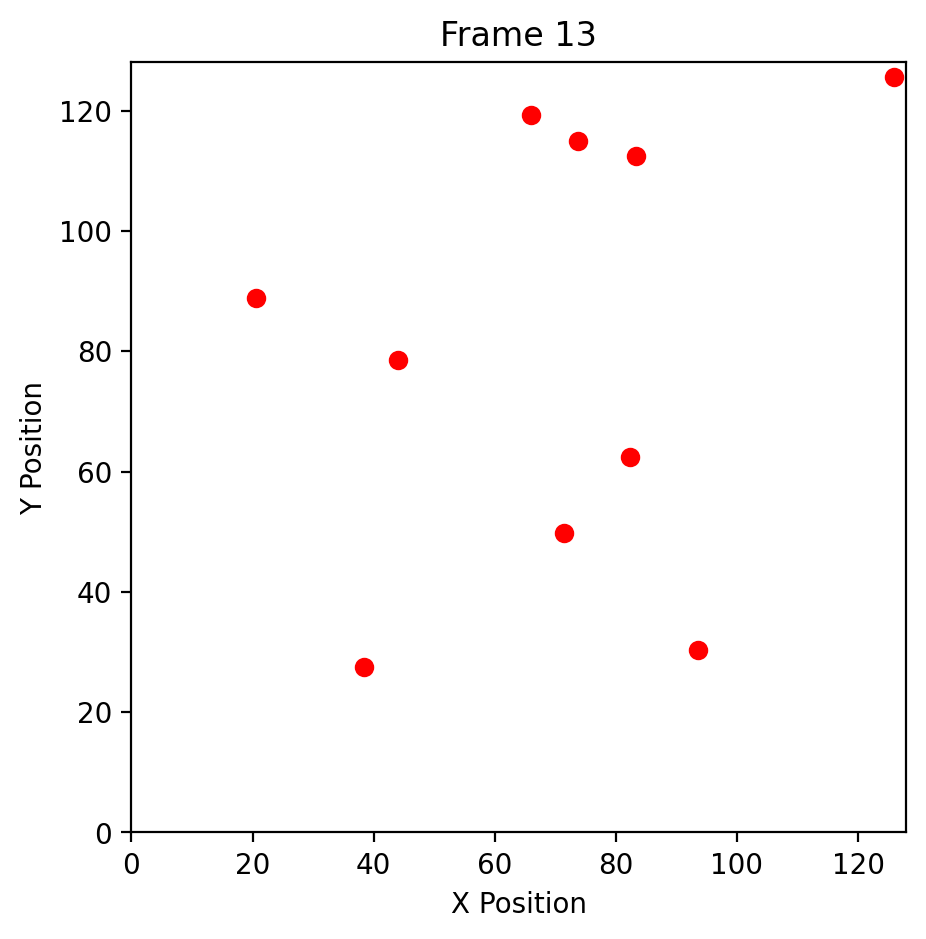

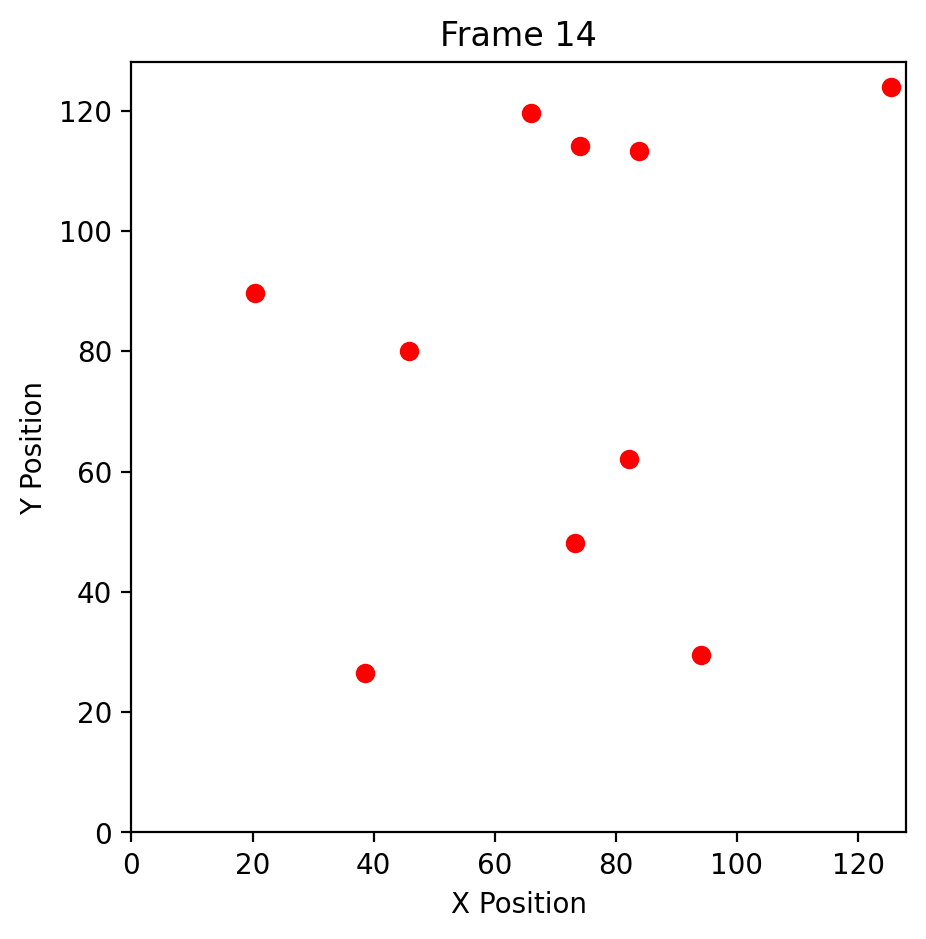

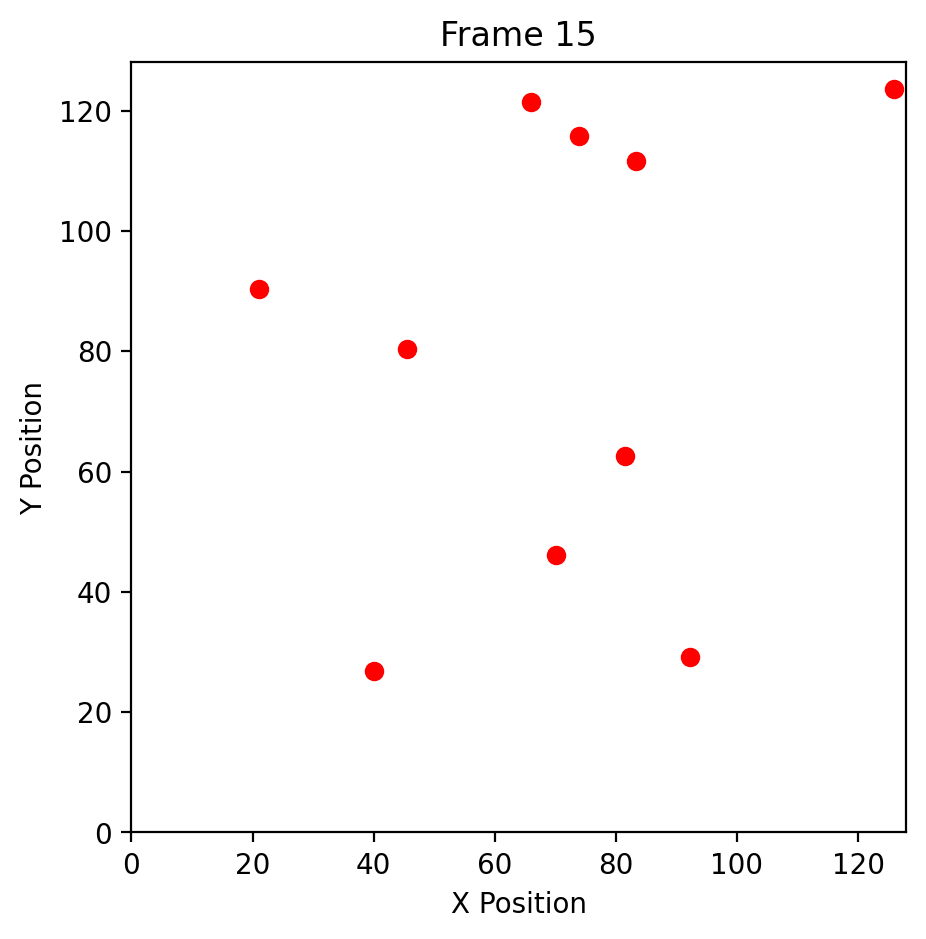

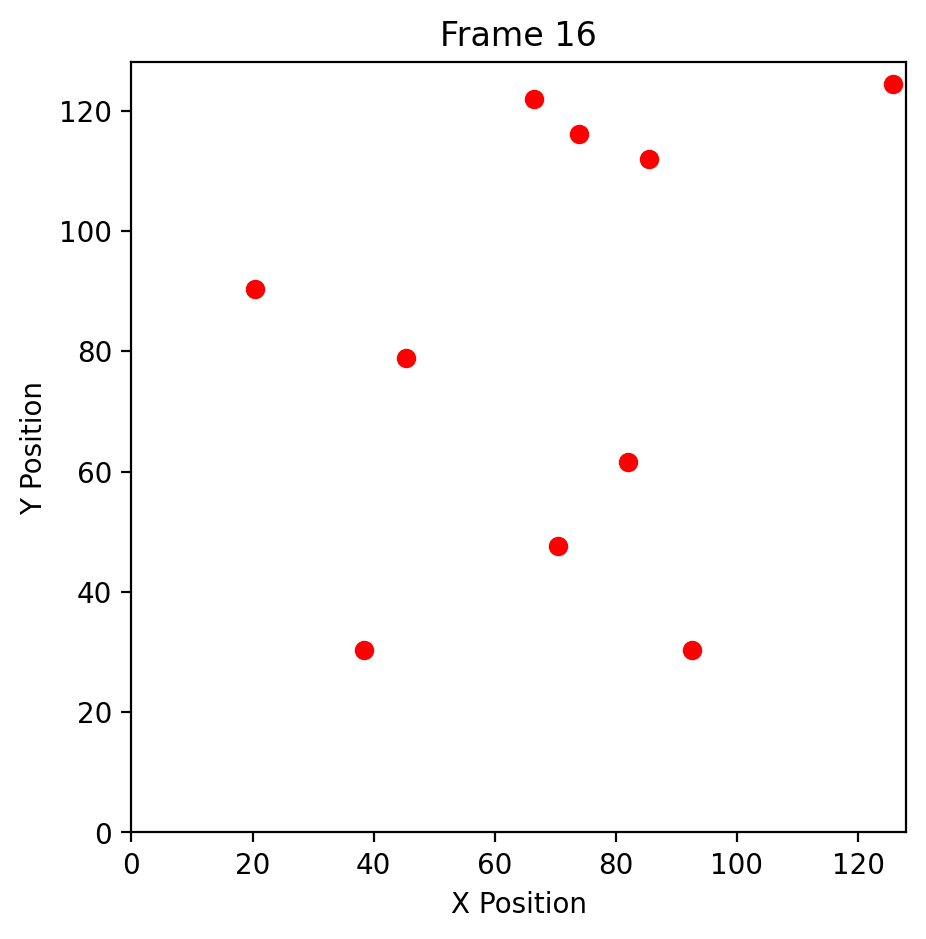

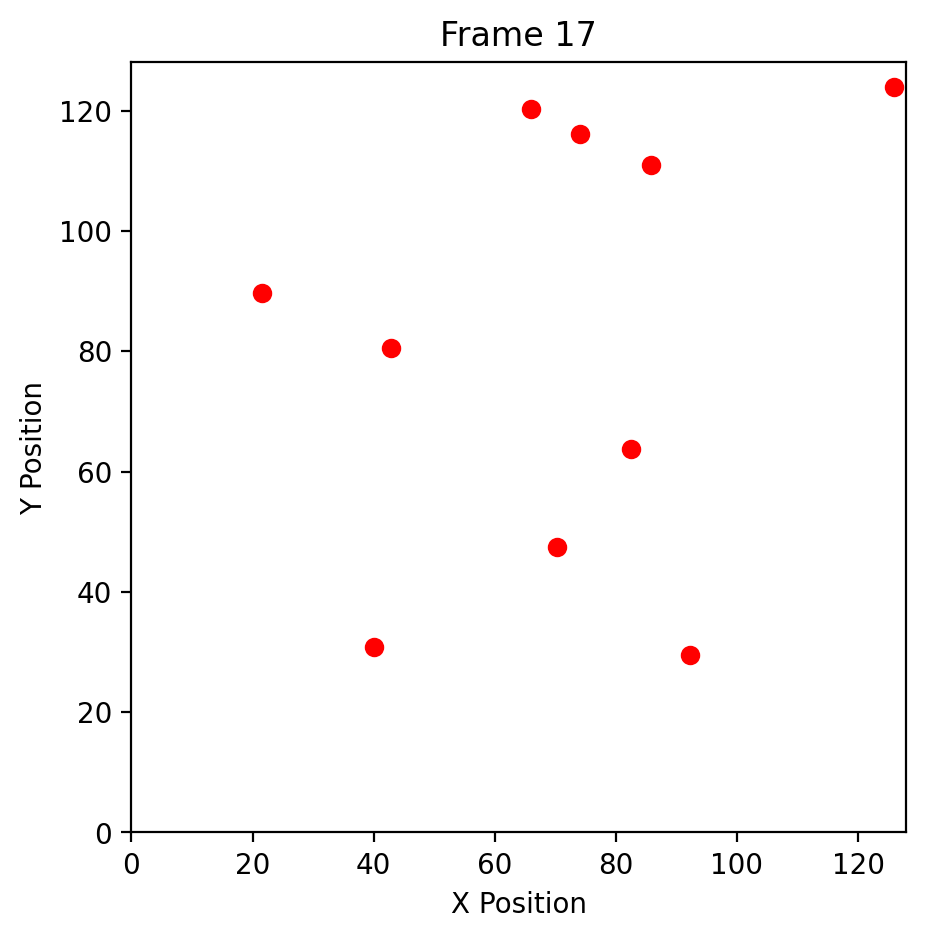

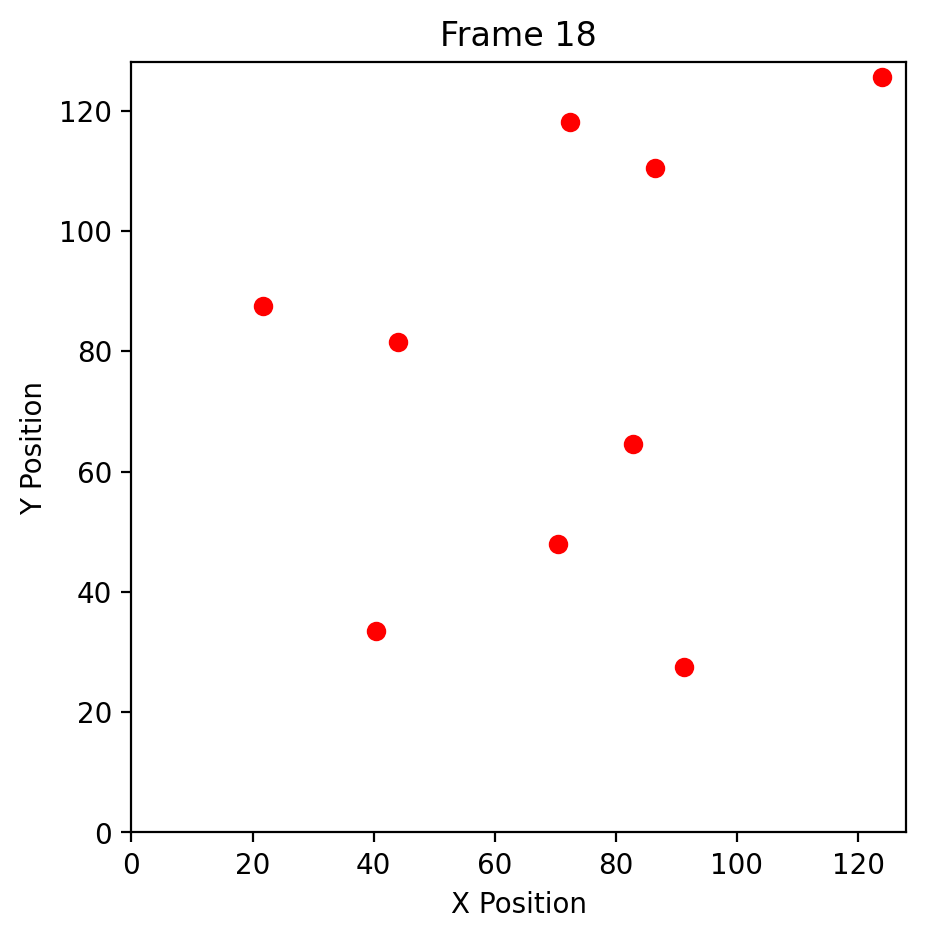

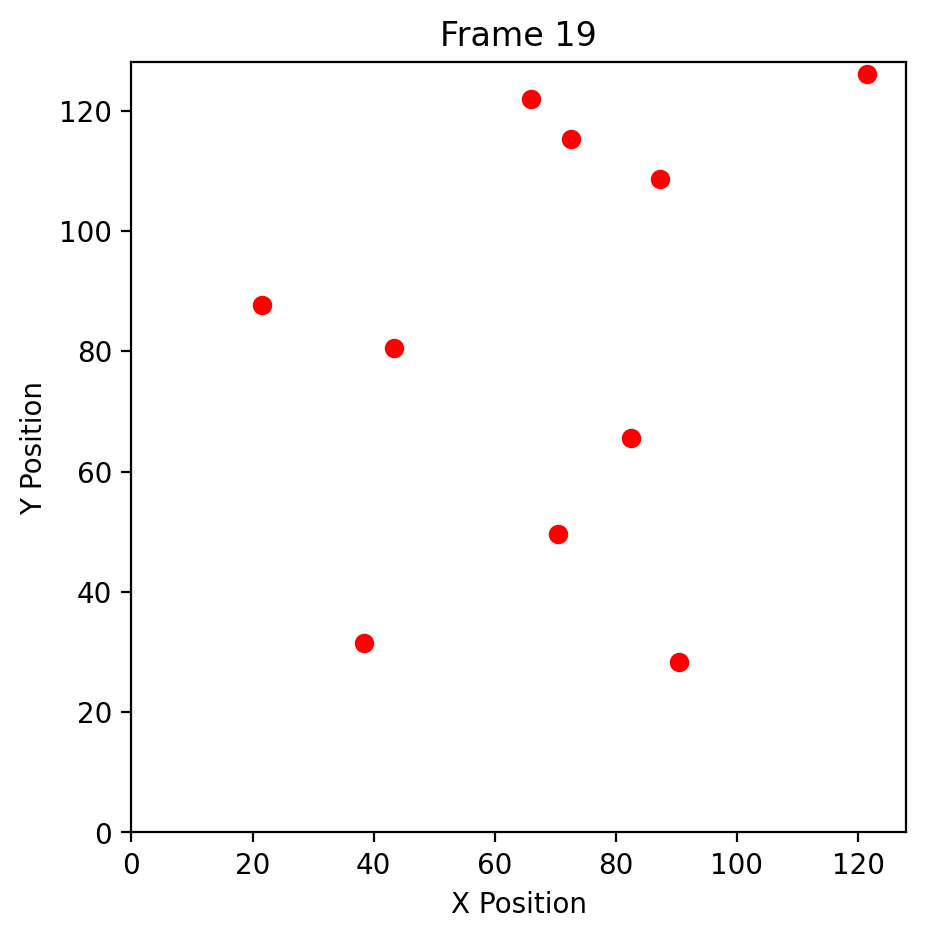

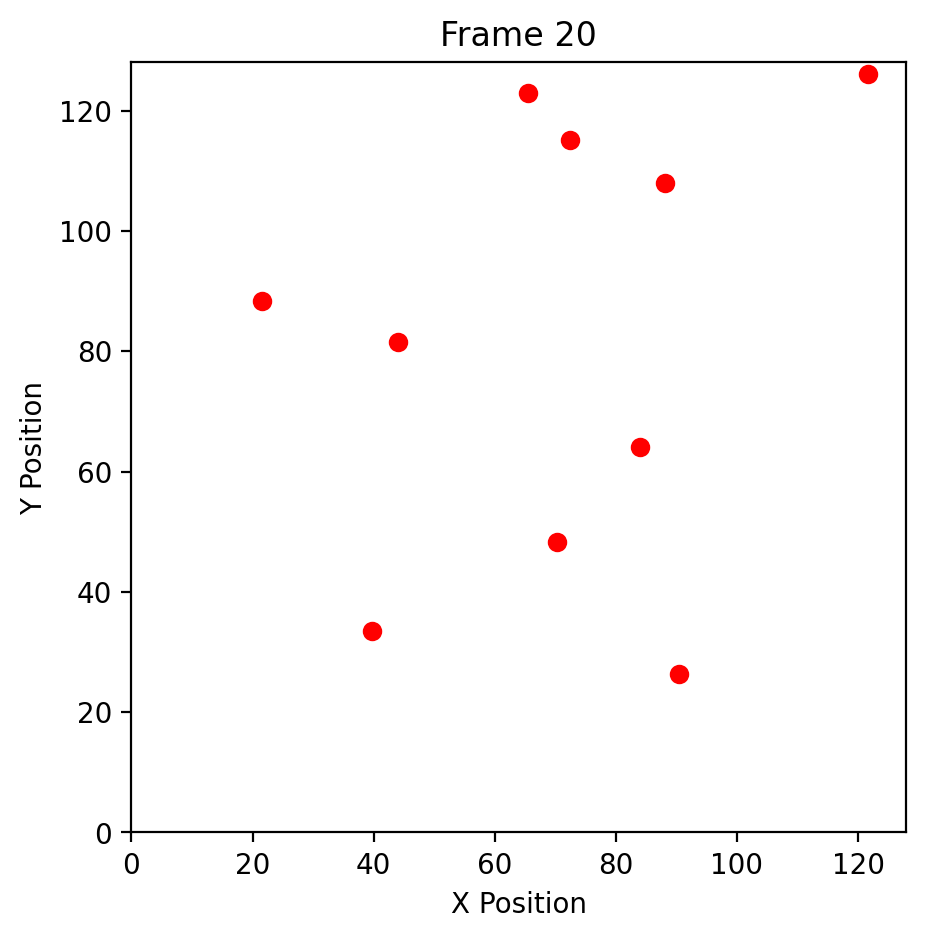

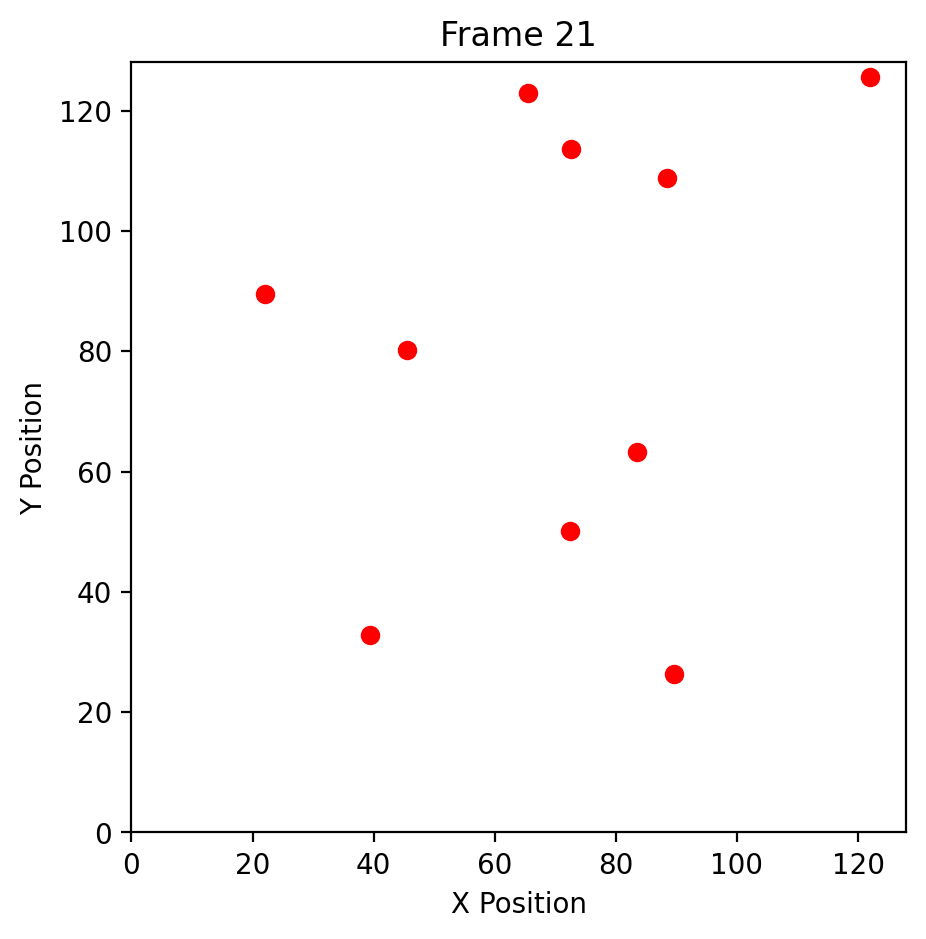

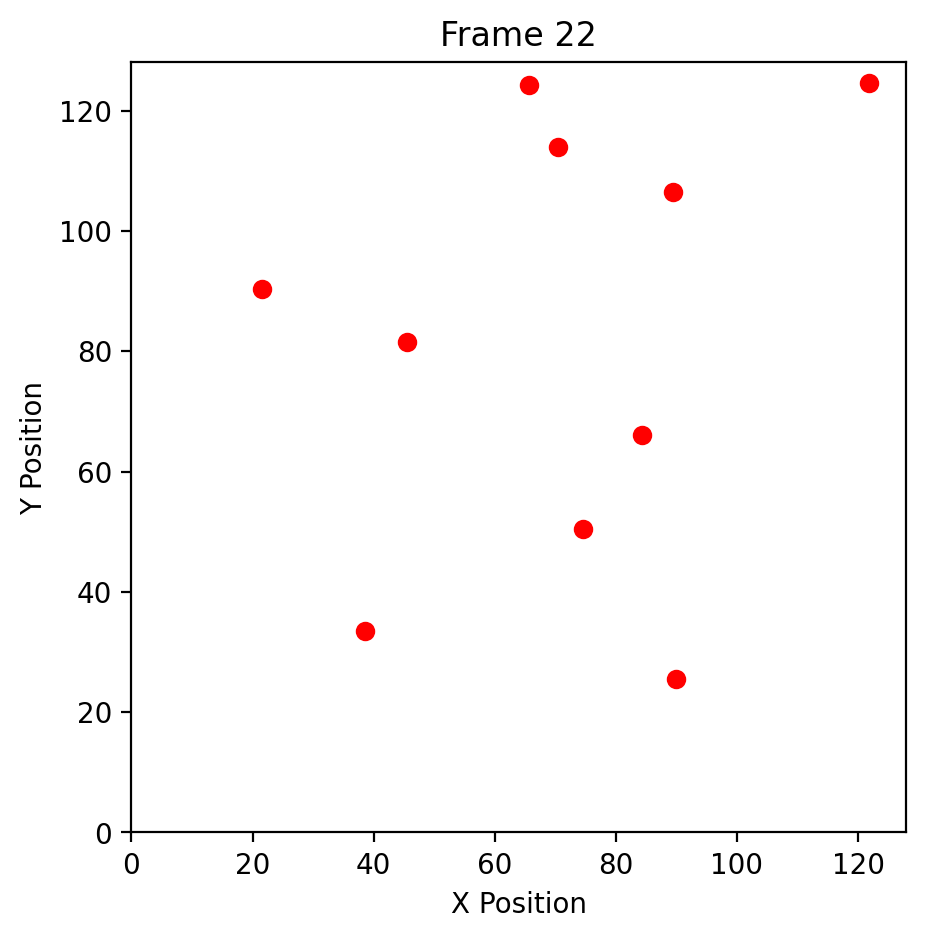

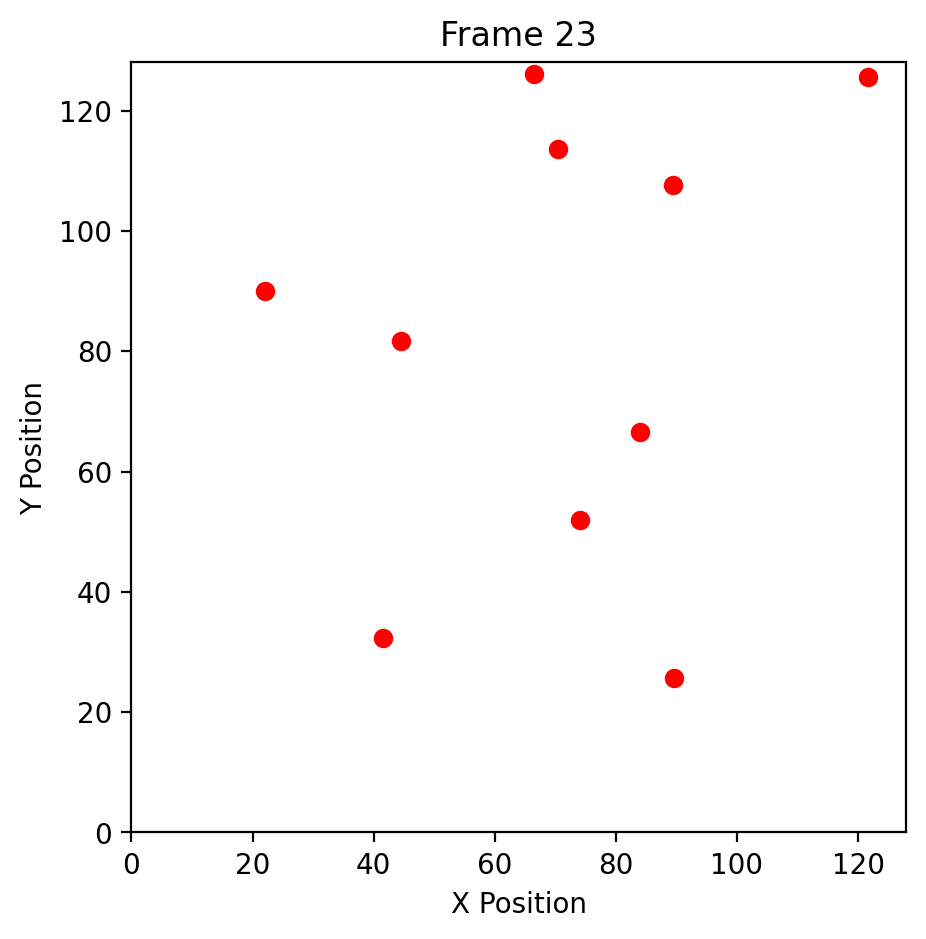

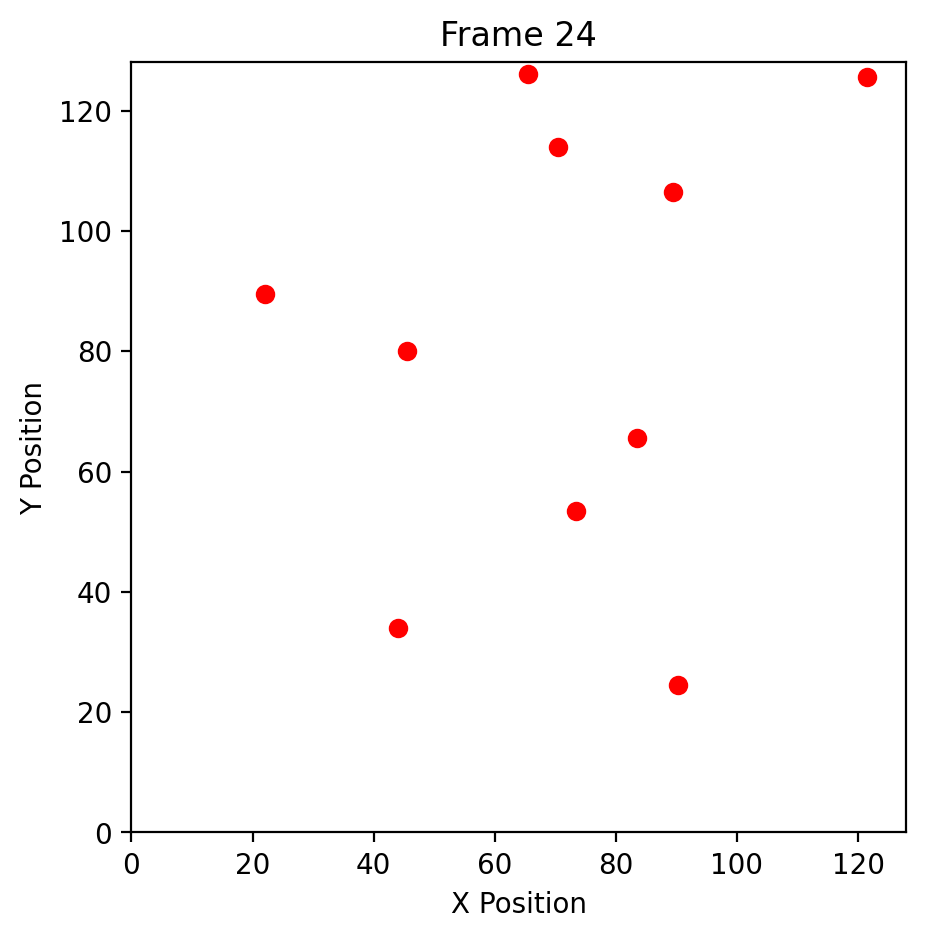

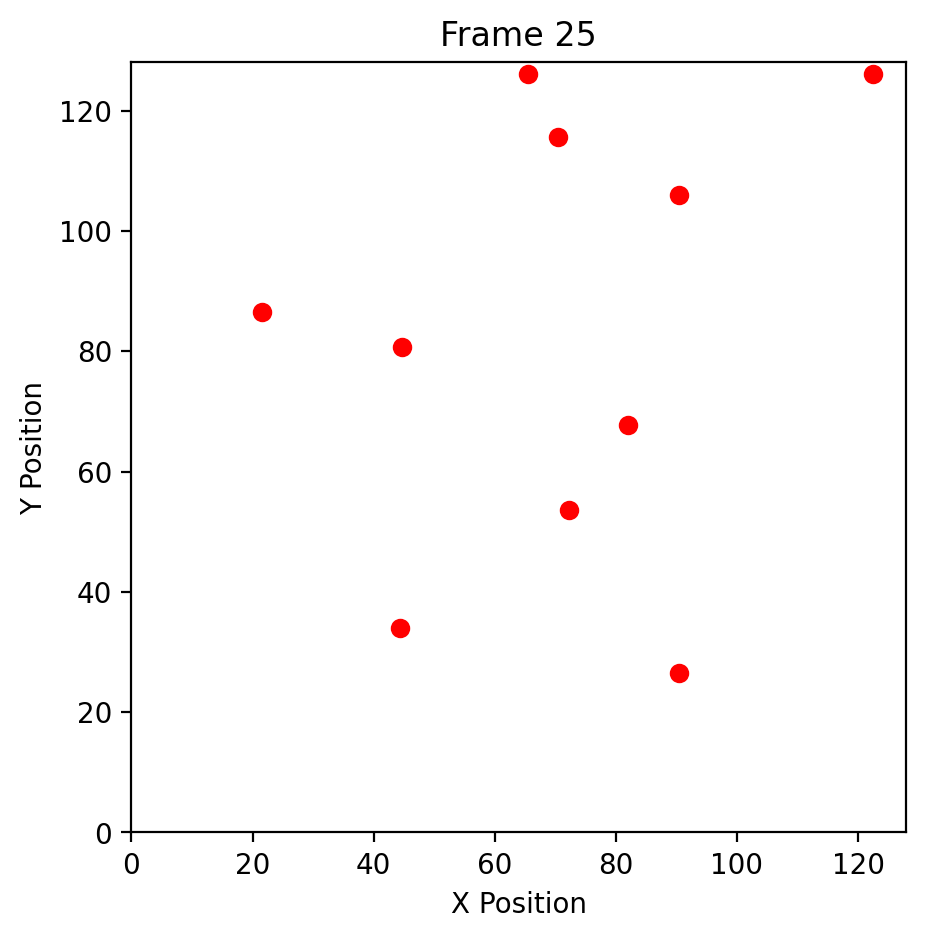

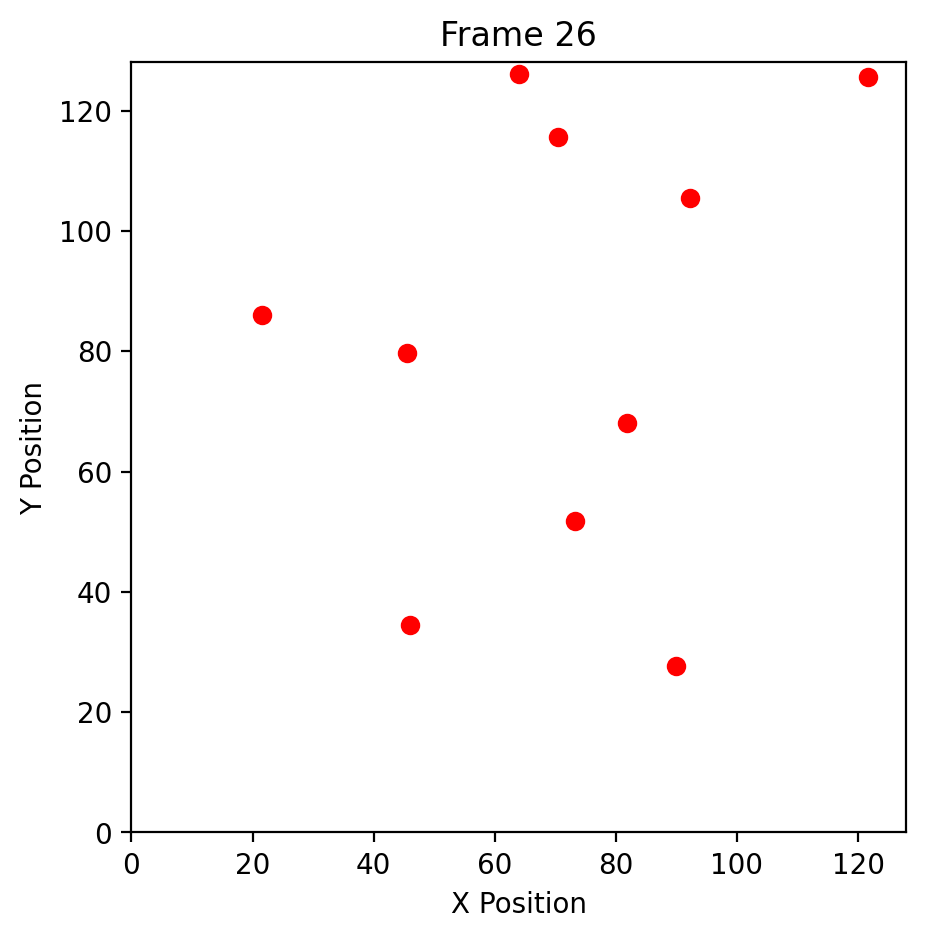

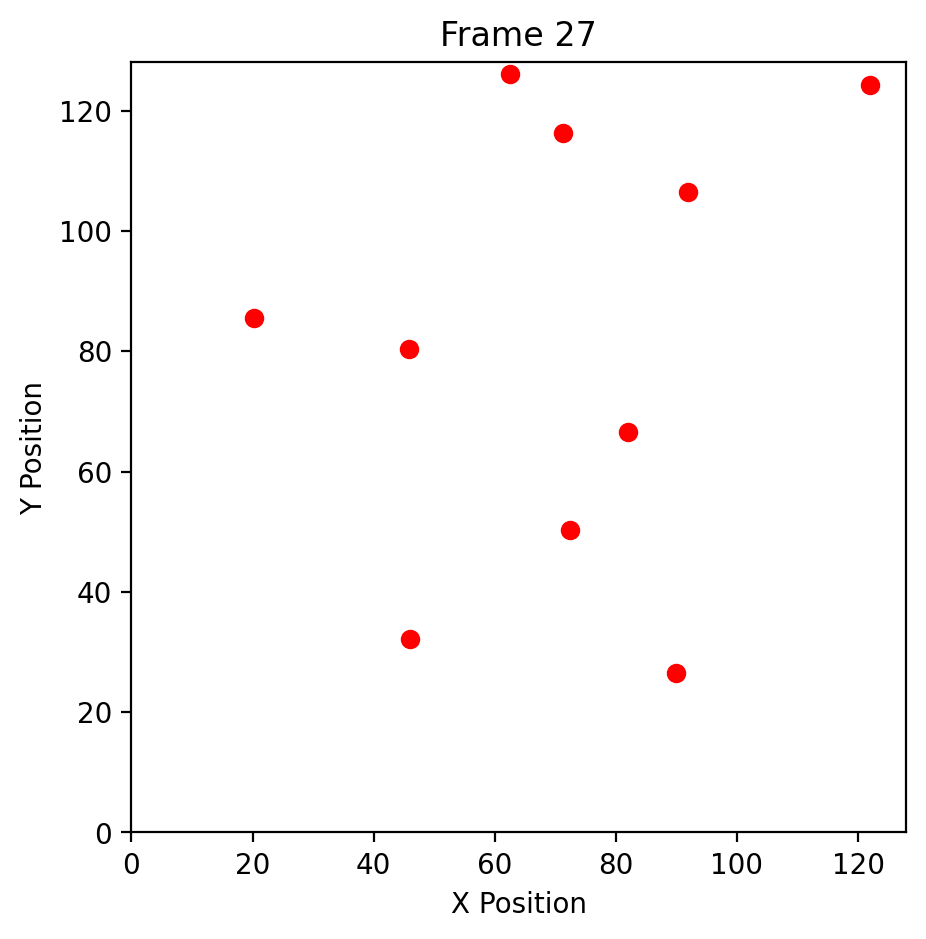

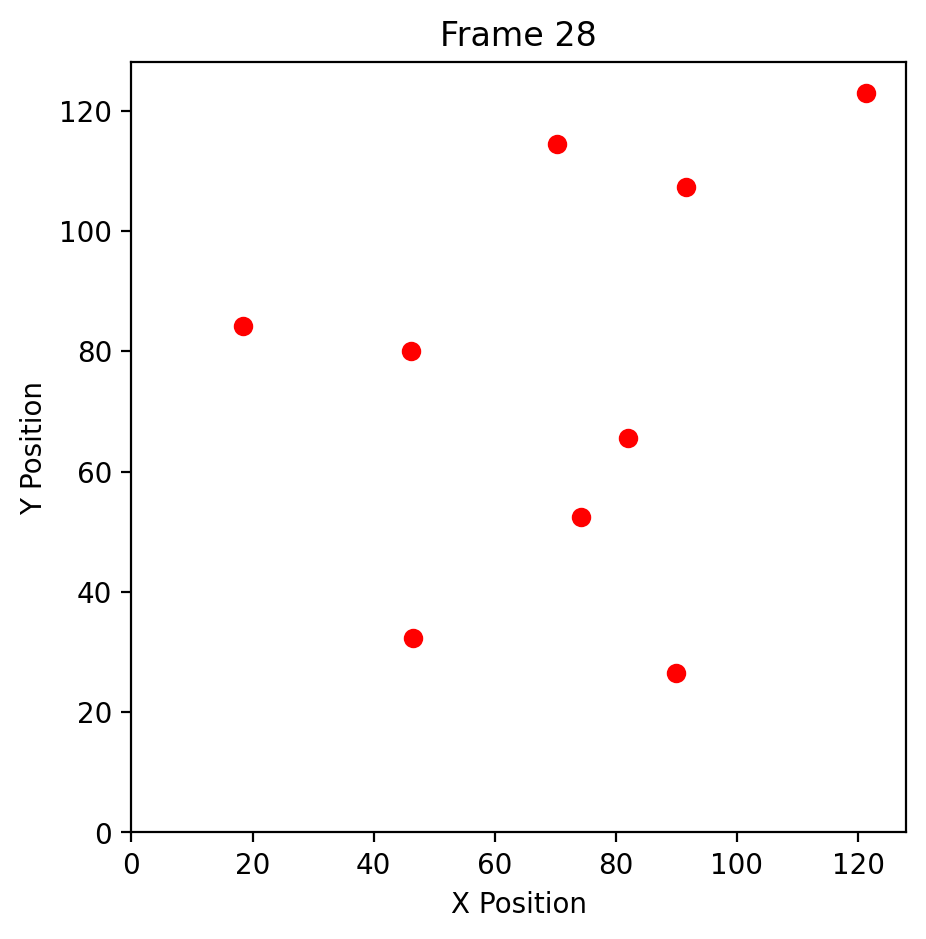

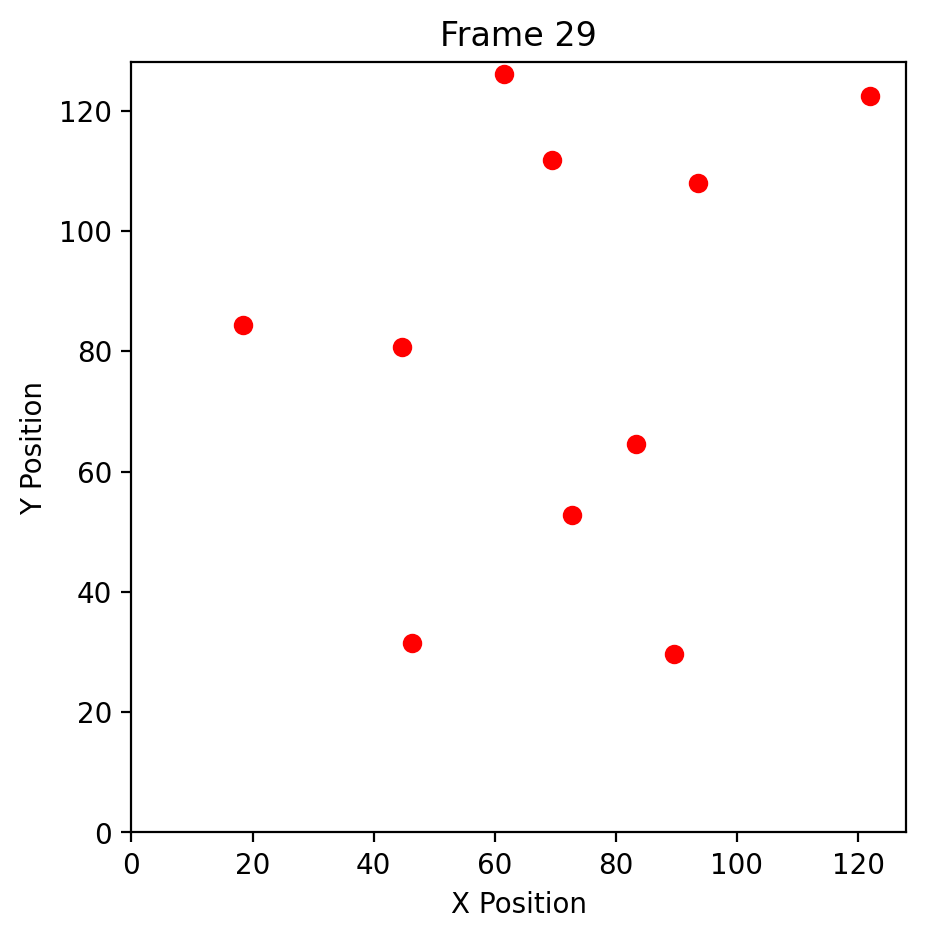

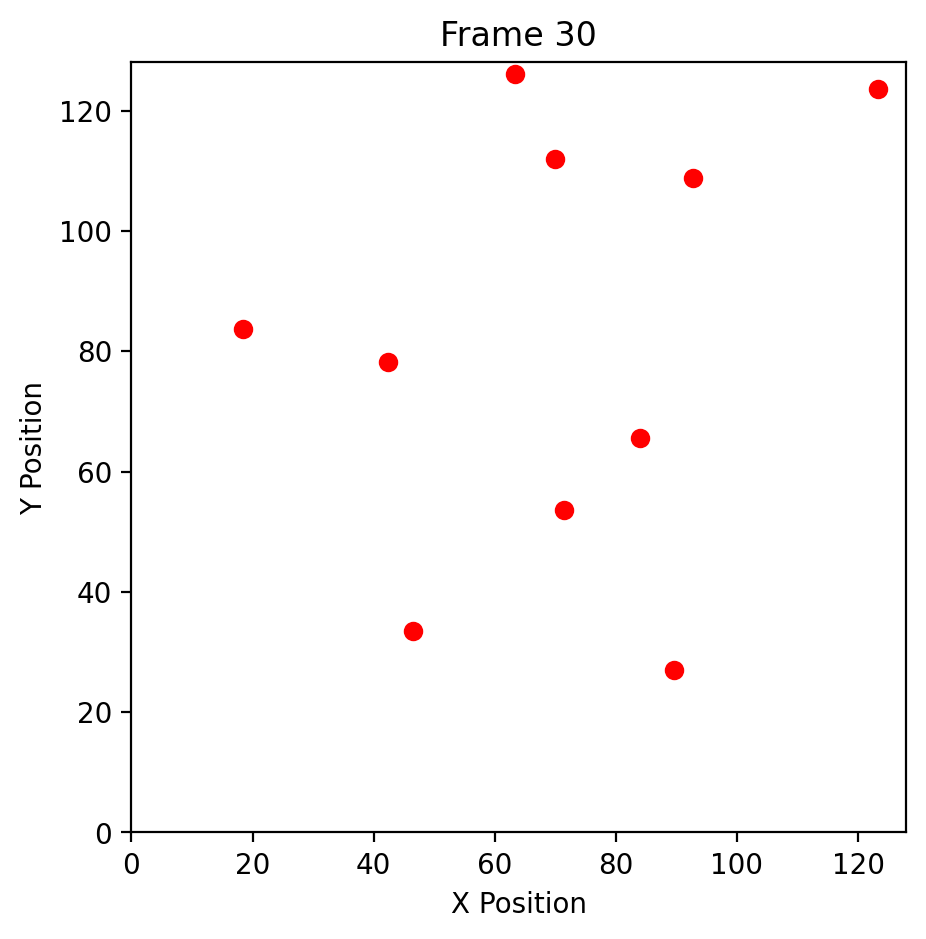

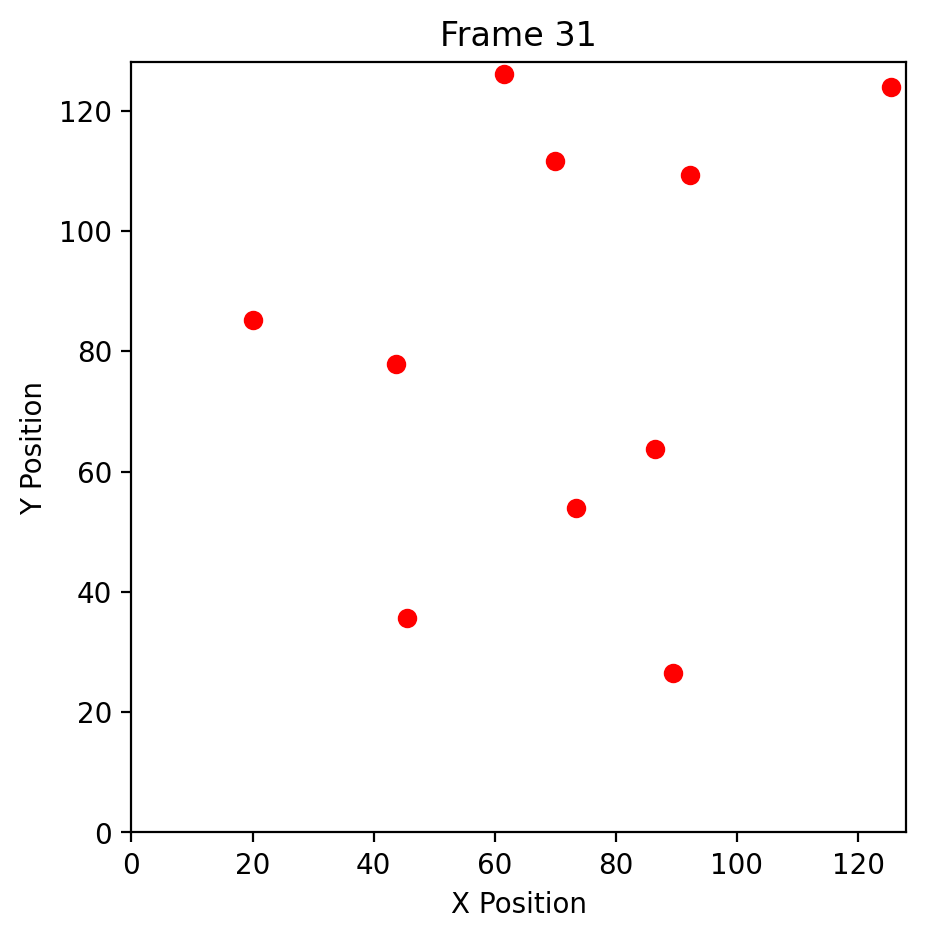

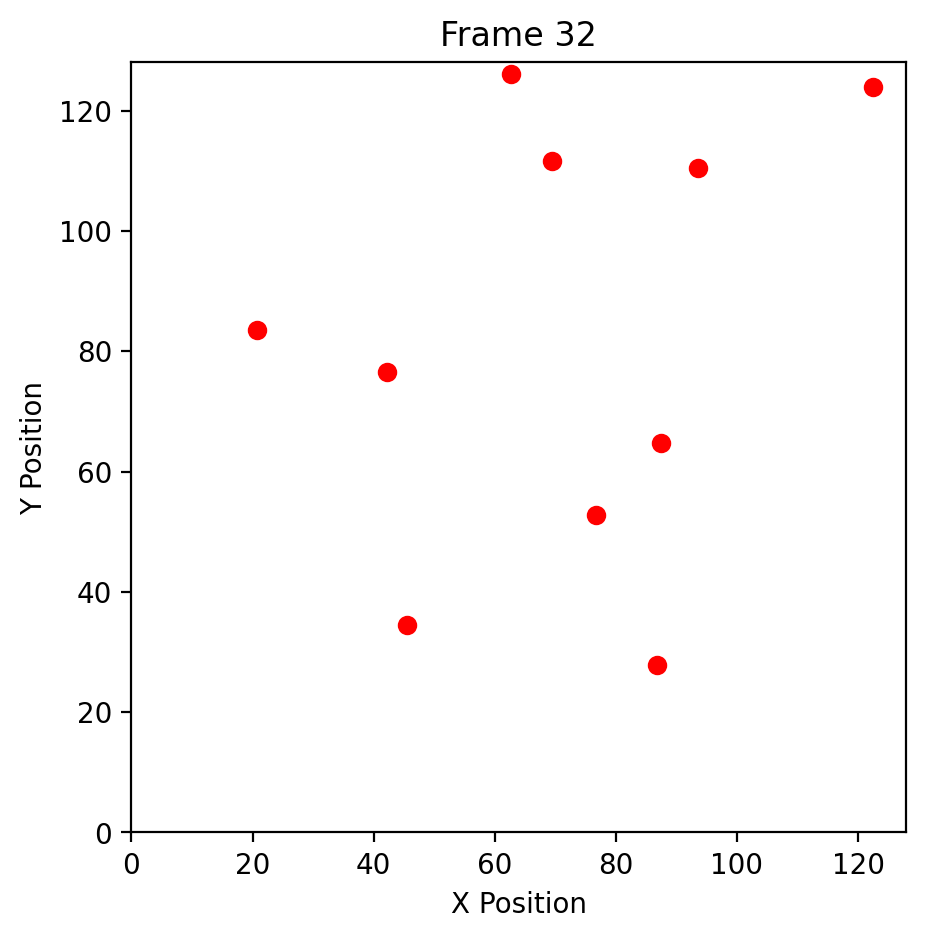

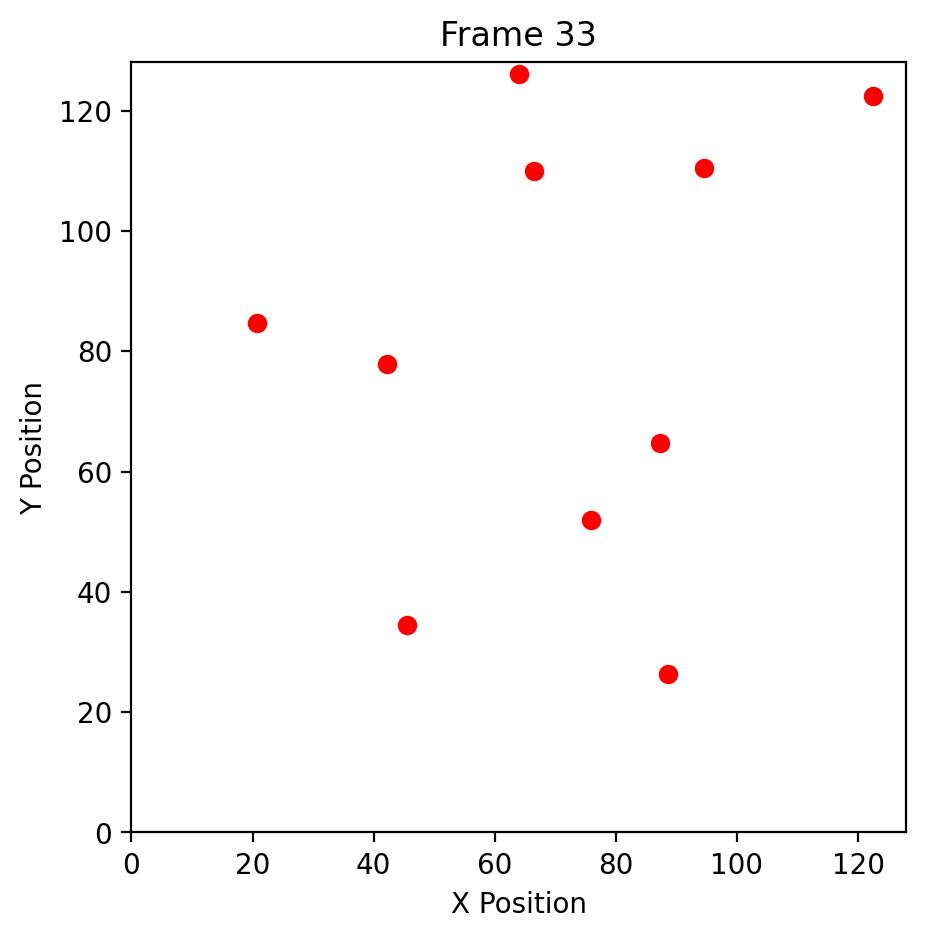

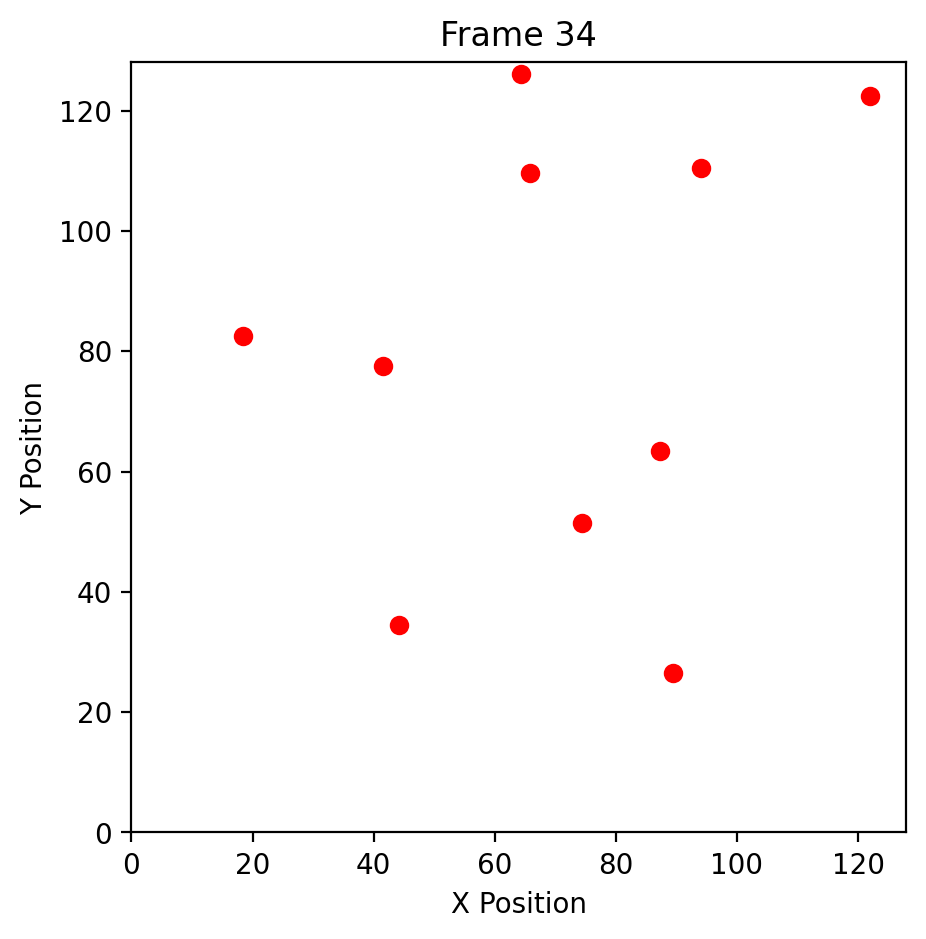

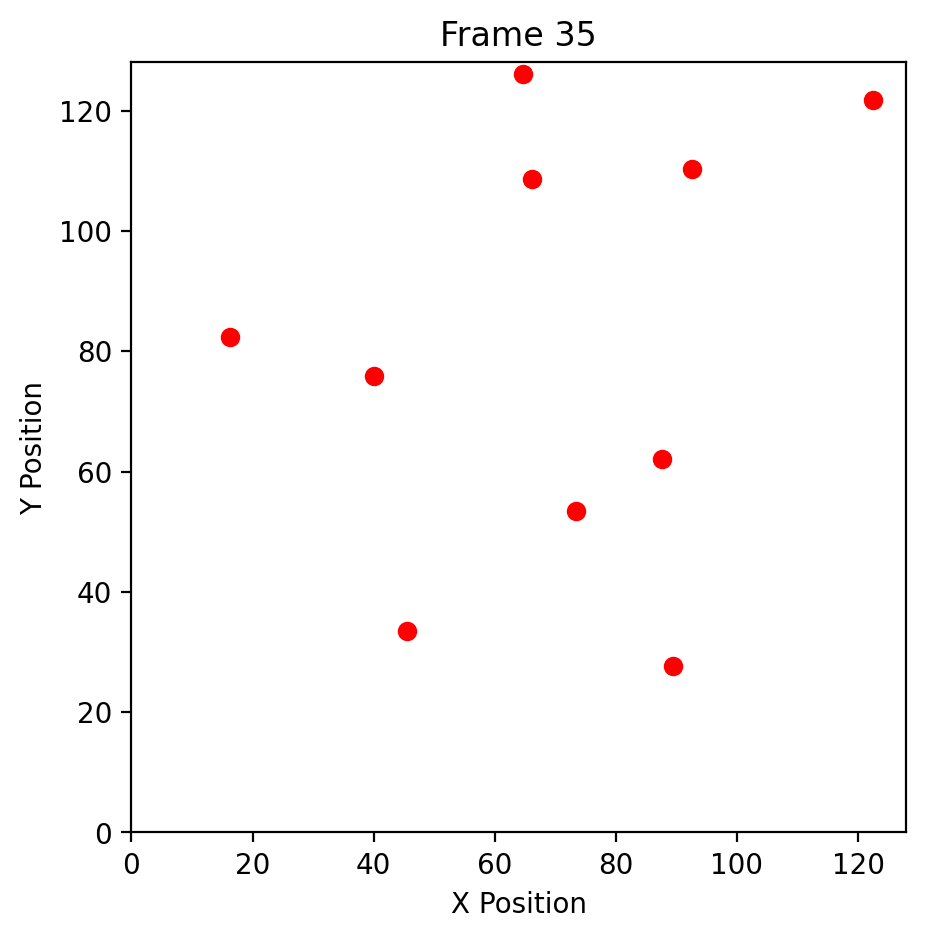

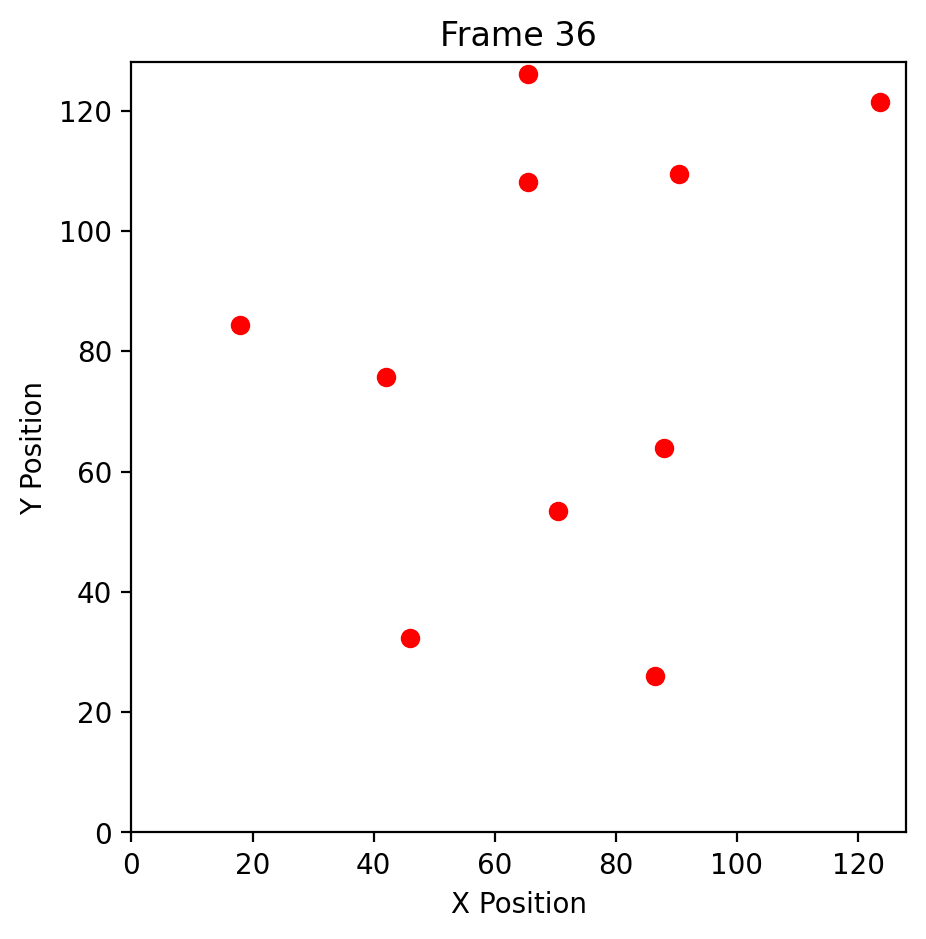

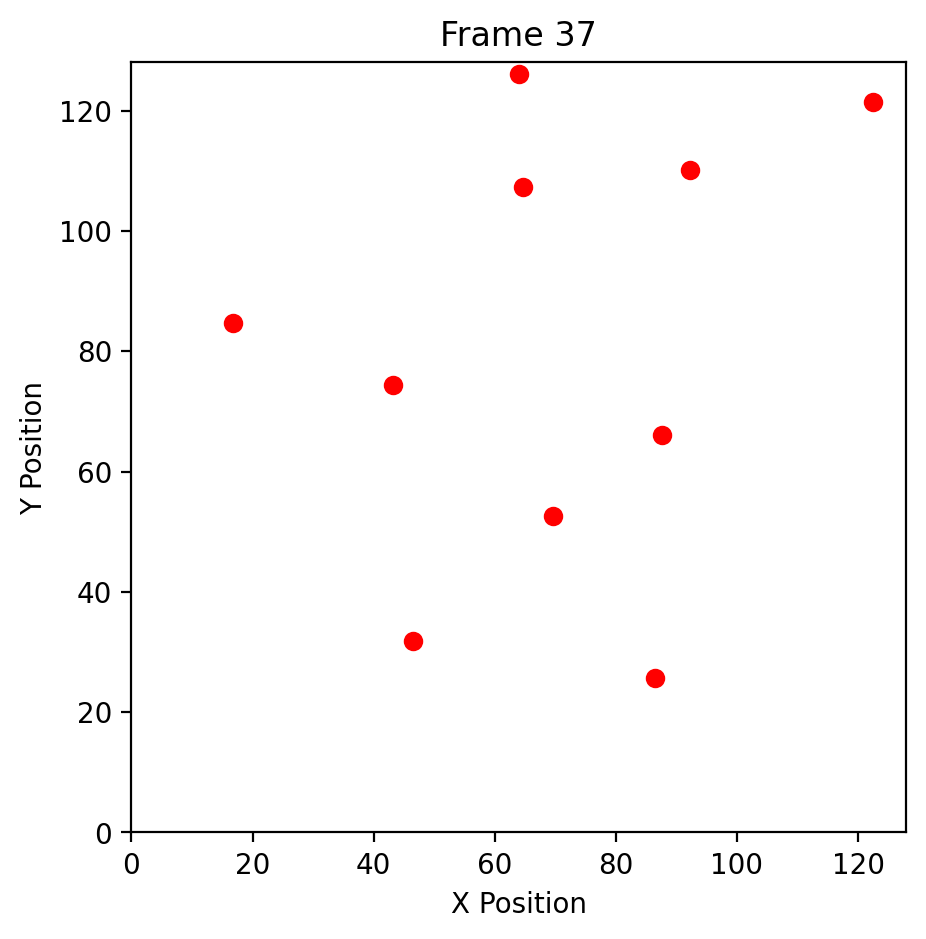

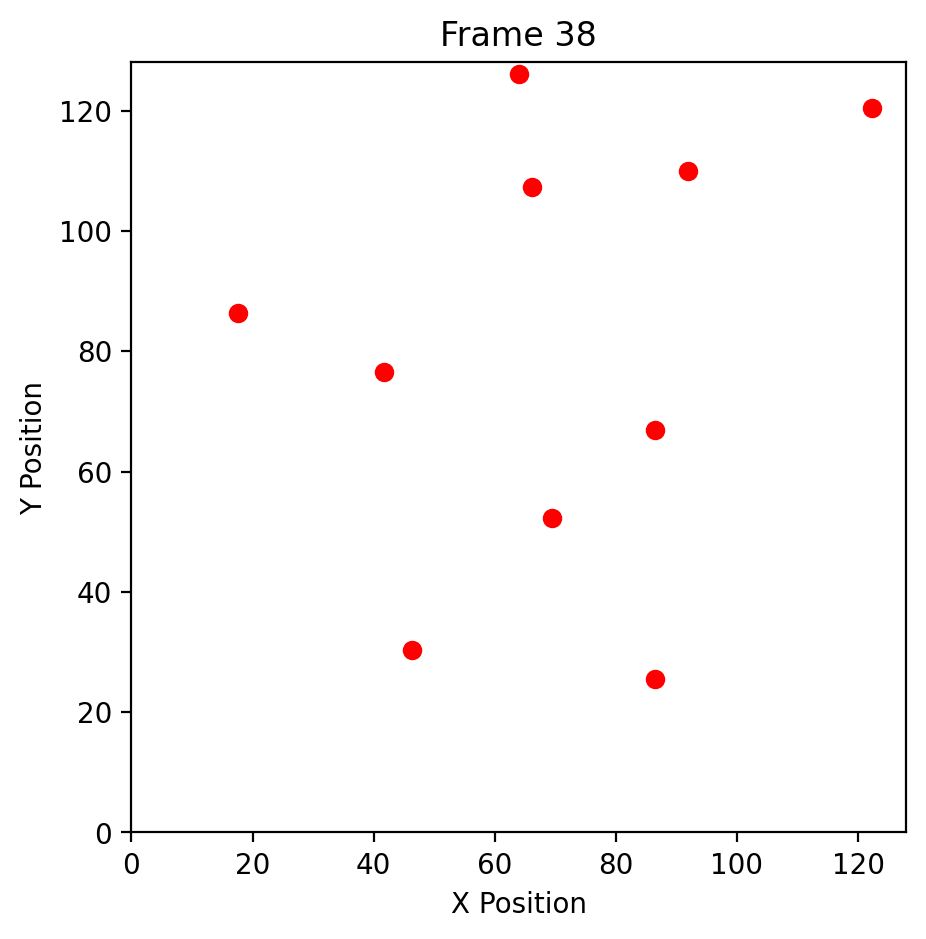

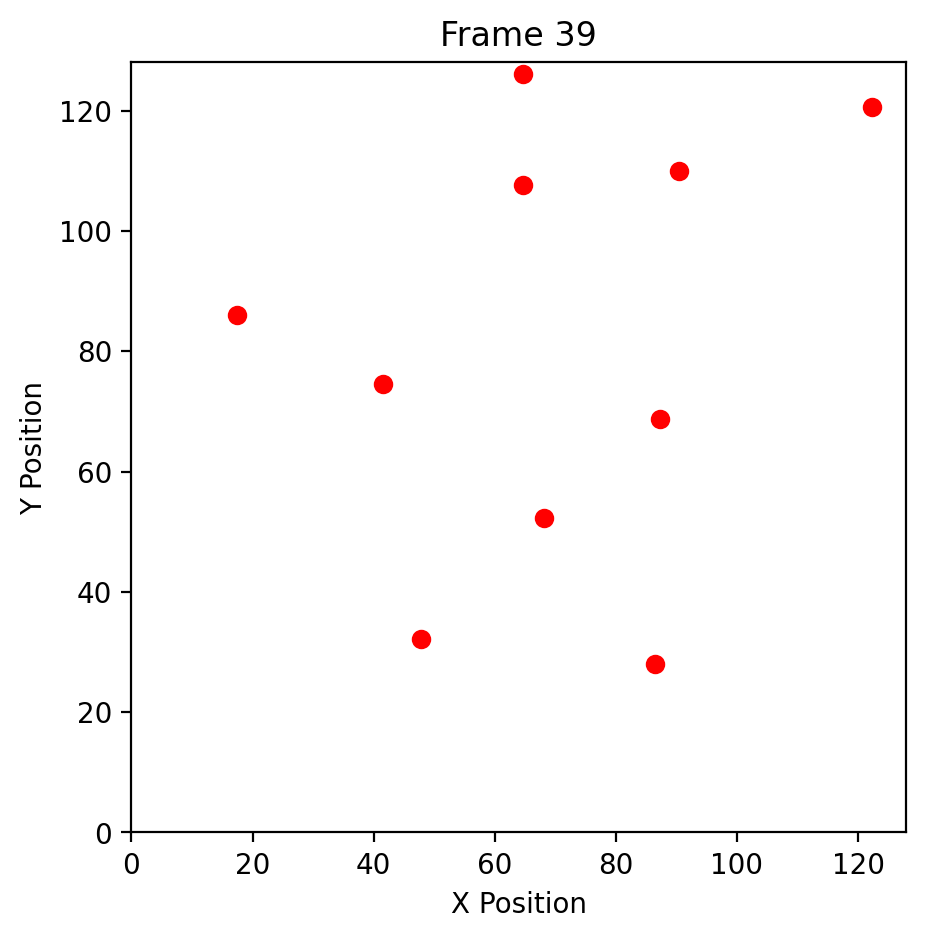

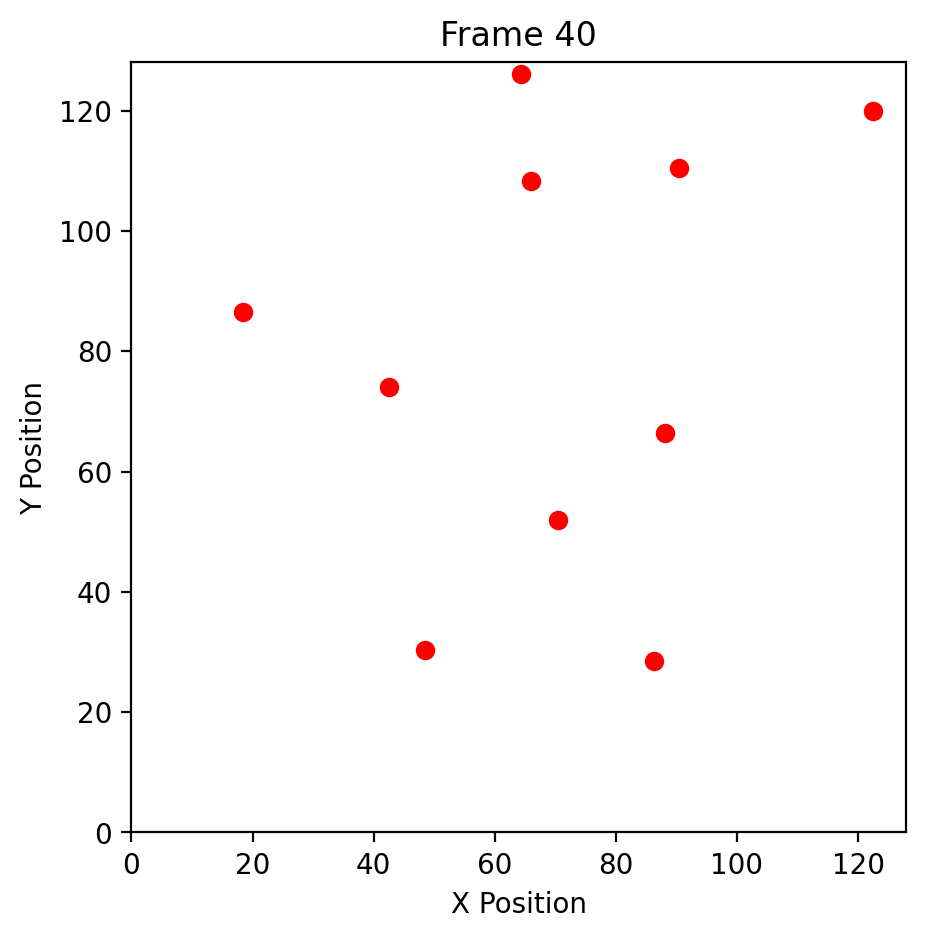

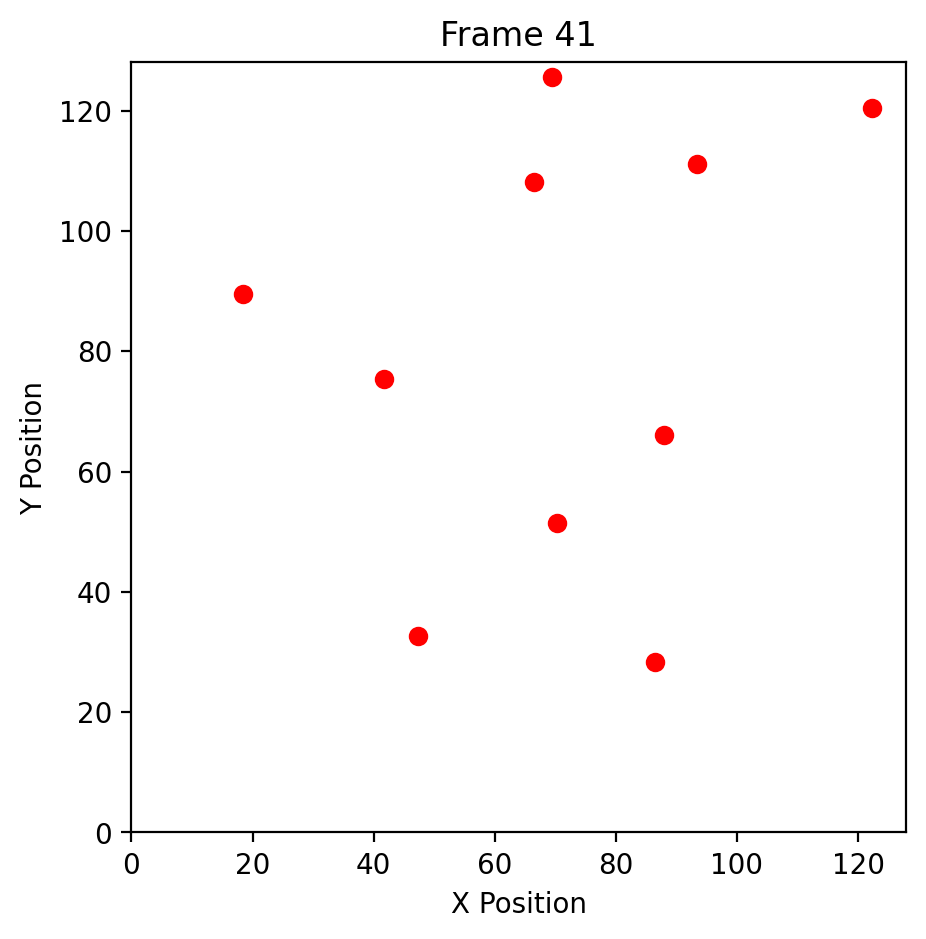

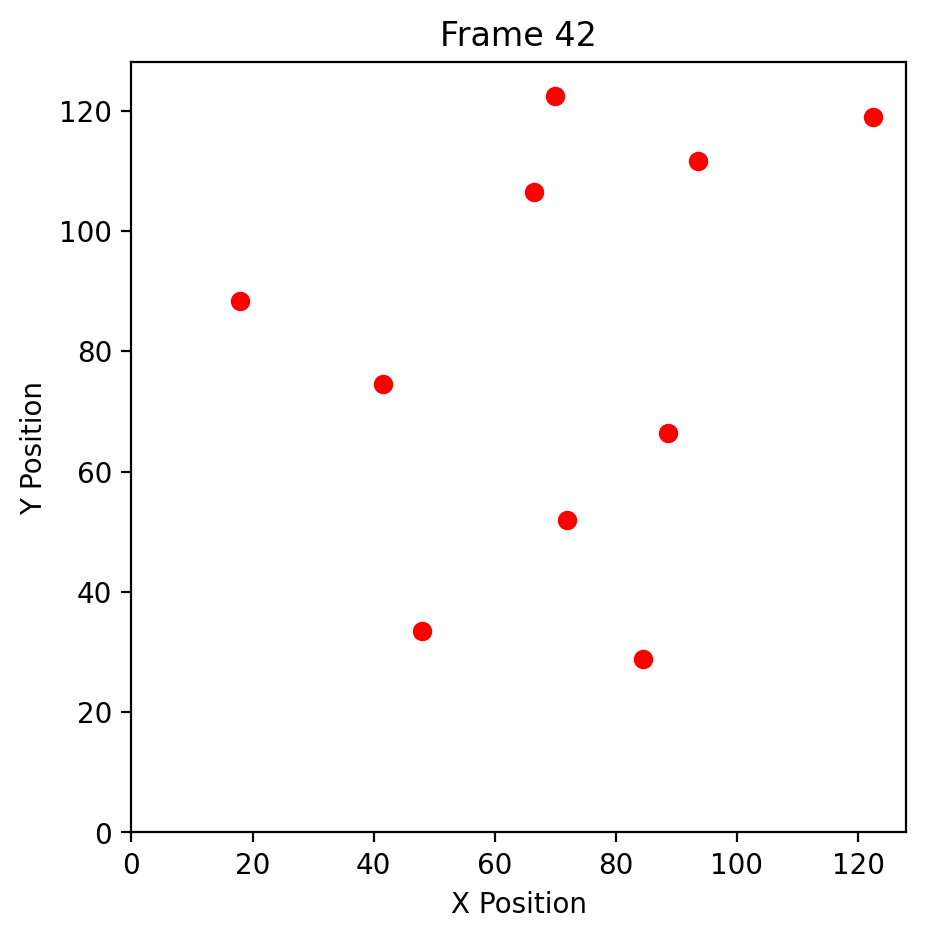

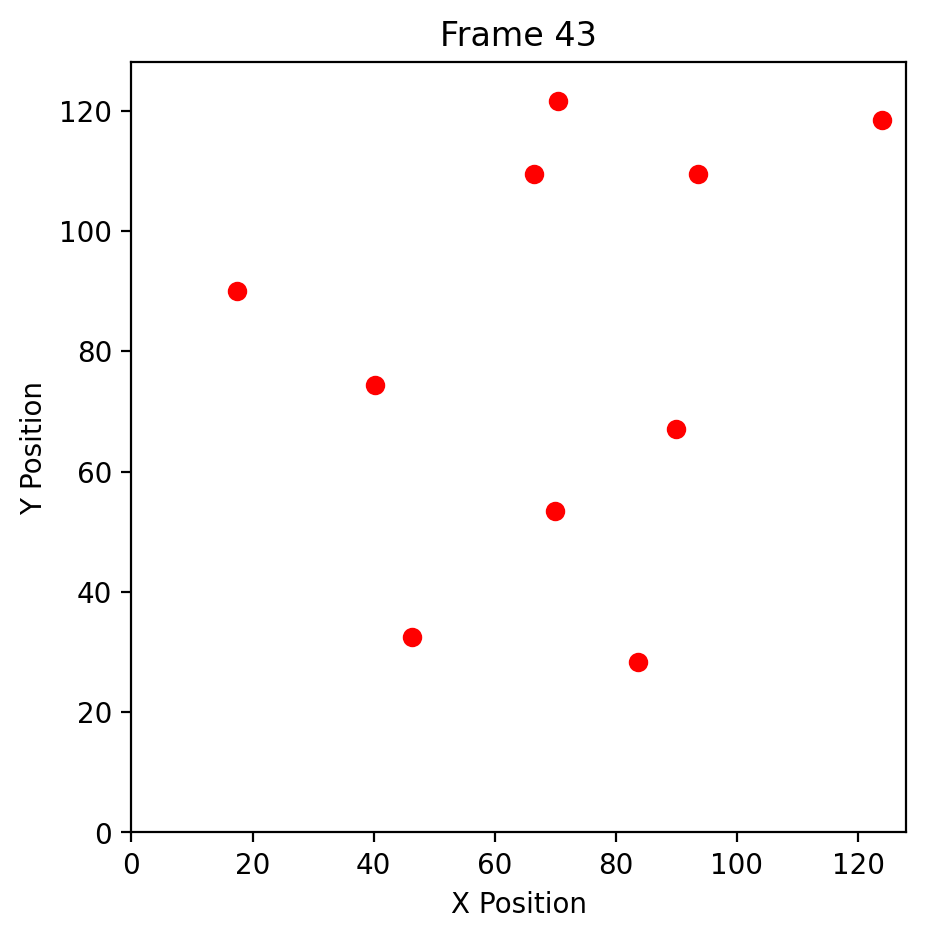

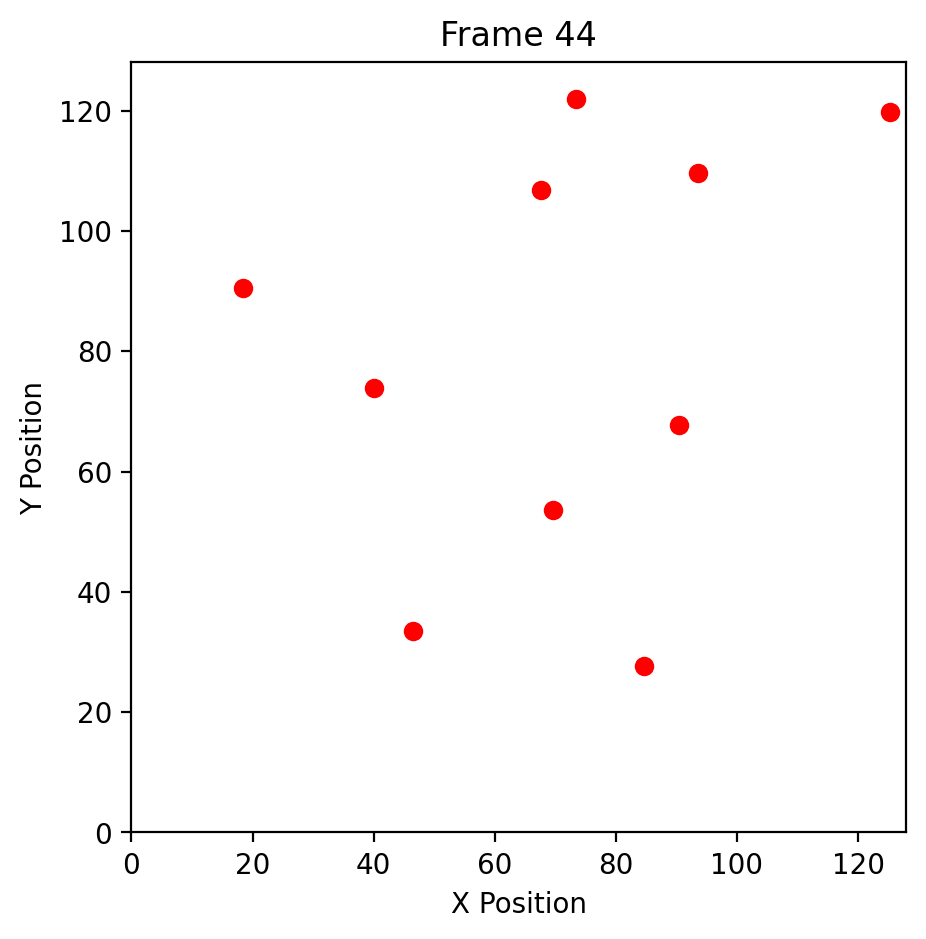

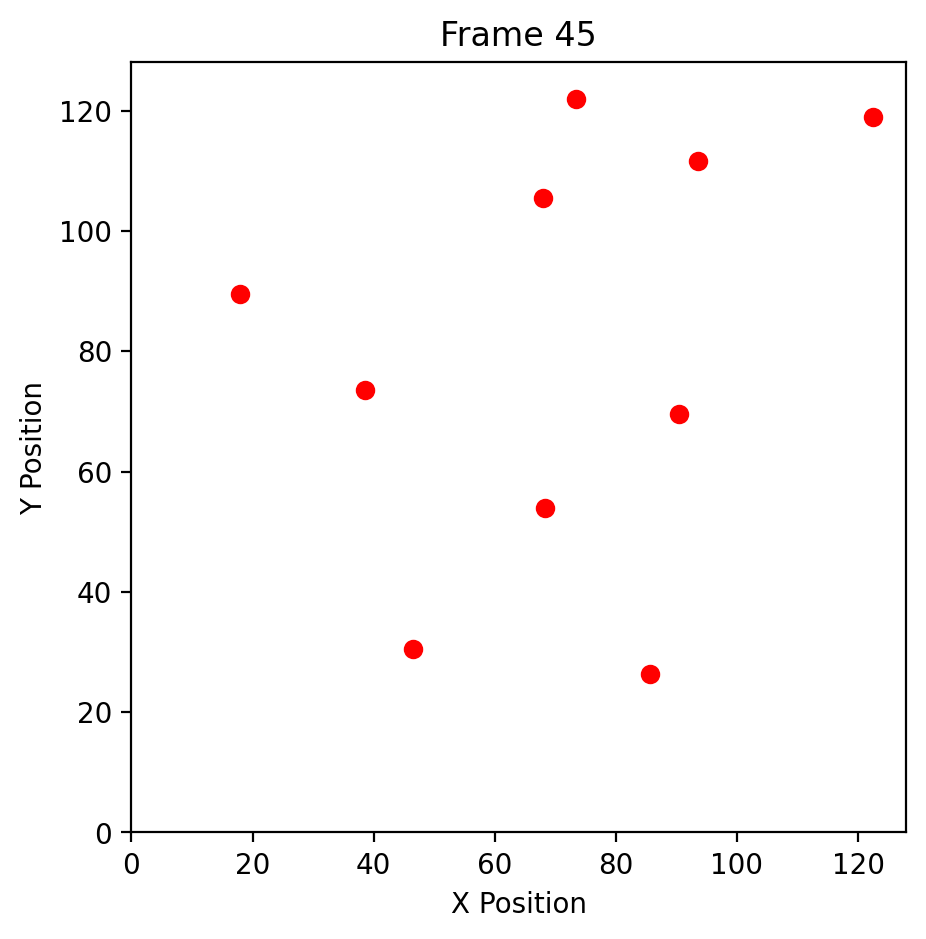

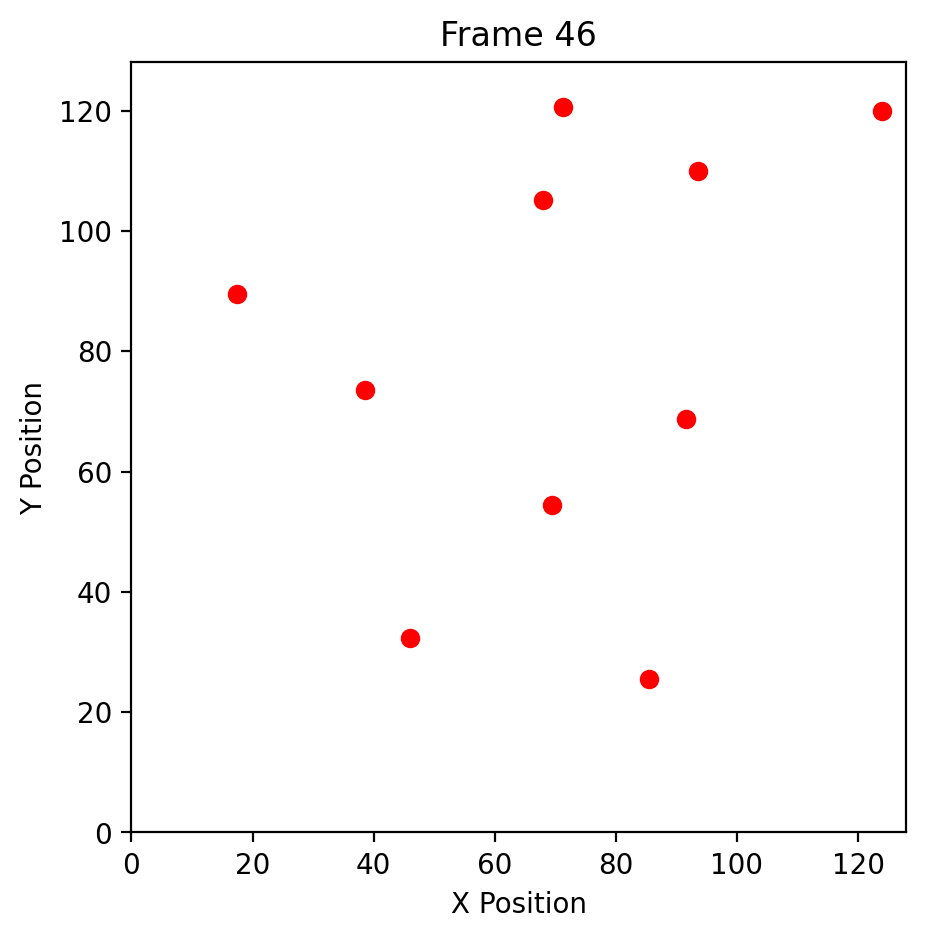

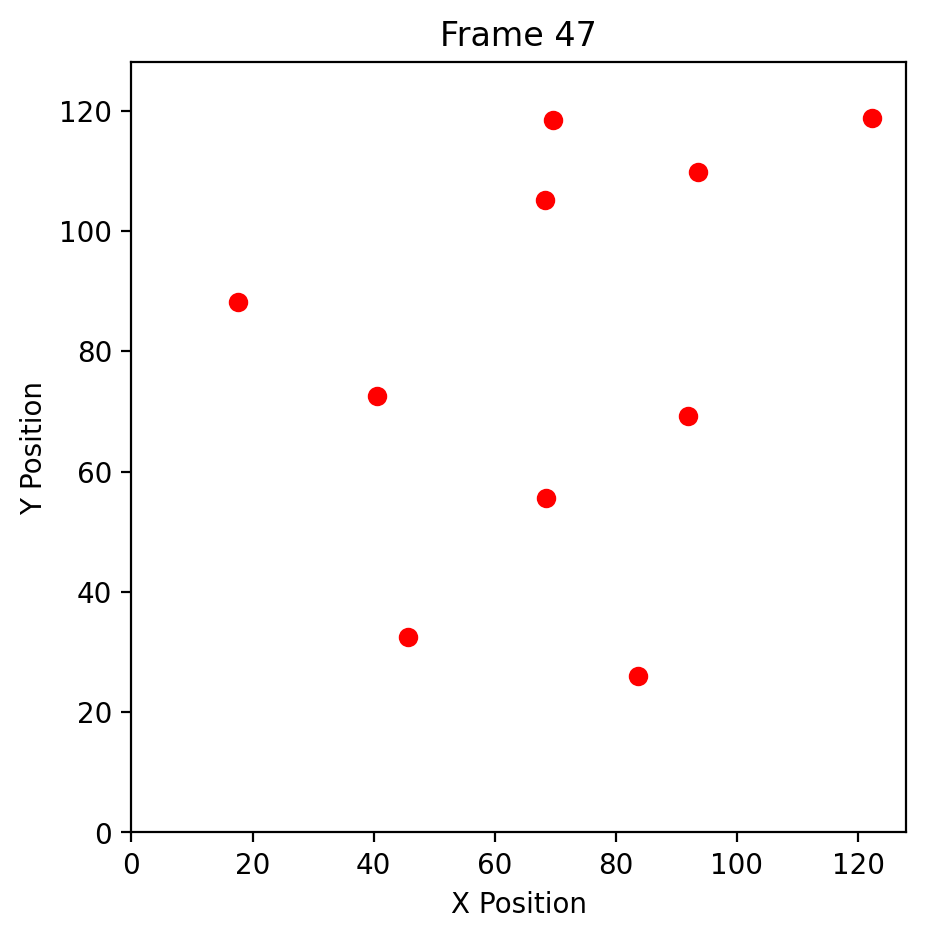

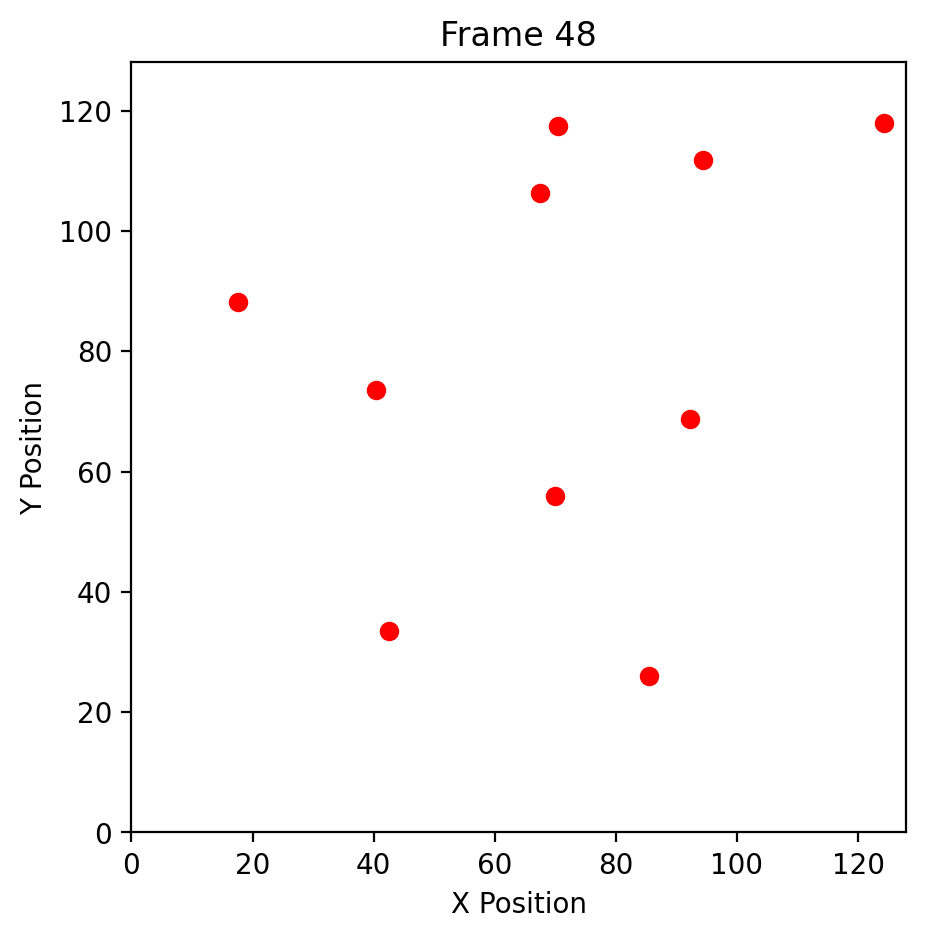

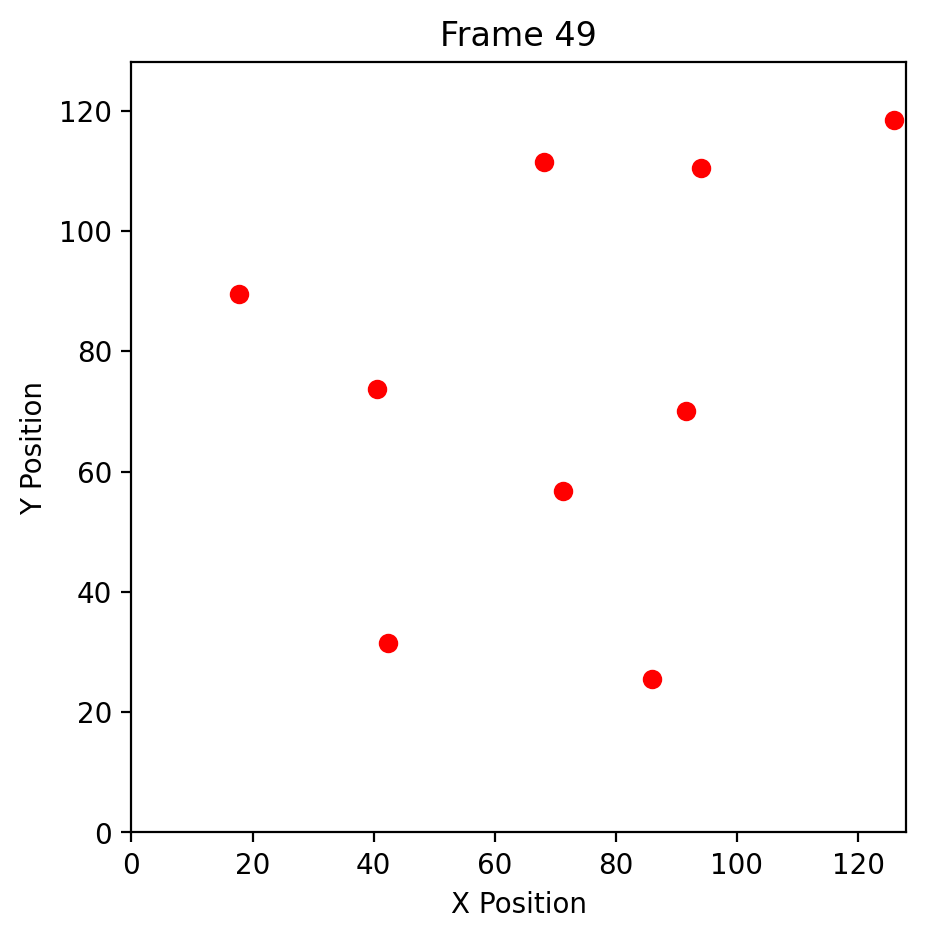

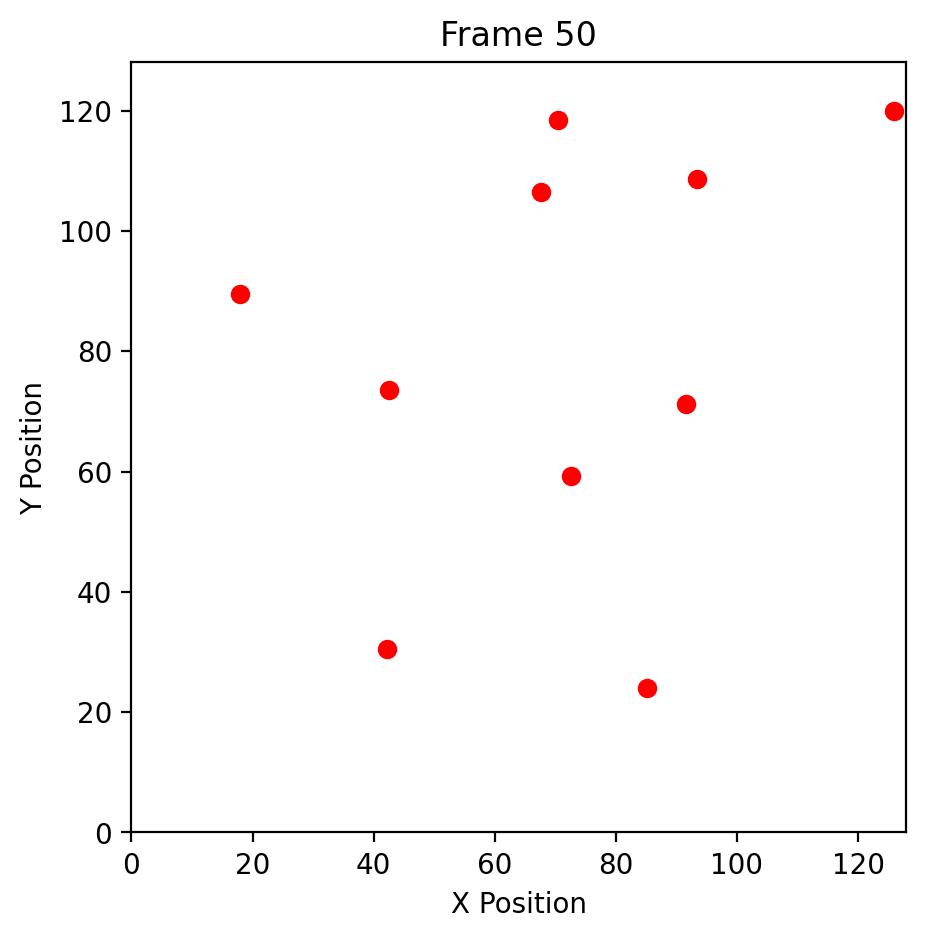

In [94]:
# Iterate through centers_per_frame and plot the center positions of particles for each frame
for i, centers in enumerate(centers_per_frame):
    # Unpack particle center positions for plotting
    if centers:  # Check if there are any centers in the current frame
        x_vals, y_vals = zip(*centers)
    else:
        x_vals, y_vals = [], []

    plt.figure(figsize=(5, 5))
    plt.scatter(y_vals, x_vals, c='r', marker='o')  # Mark particle centers with red circles
    plt.title(f"Frame {i+1}")
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.xlim(0, 128)
    plt.ylim(0, 128)
    plt.show()

# K-means

In [60]:
from sklearn.cluster import KMeans
centers_per_frame = []  # Store the center positions of particles for each frame

k = 10  

for frame_positions in particle_positions_per_frame:
    # Ensure frame_positions is a NumPy array
    frame_positions_np = np.array(frame_positions)
    
    # Apply KMeans algorithm
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(frame_positions_np)
    
    # Get cluster centers
    centers = kmeans.cluster_centers_
    
    centers_per_frame.append(centers)

In [61]:
# Visualizing testing videos and labels
@interact(t=(0, Nt-1, 1))
def plotfn(t=0, show_tracks=True):
    fig = figure(1, [14, 7])
    fig.add_subplot(121)
    imshow(test_vid[t], origin='lower')
    if show_tracks:
        plot(test_tracks[t, :, 0], test_tracks[t, :, 1], 'rx')
    xlim(-10, 265)
    ylim(-10, 265)
    
    fig.add_subplot(122)
    imshow(test_vid[t], origin='lower')
    imshow(test_labels[t, ..., 1], origin='lower')

interactive(children=(IntSlider(value=0, description='t', max=49), Checkbox(value=True, description='show_trac…

/var/folders/_h/v3zx4l357d3fgz8svznhxcjc0000gn/T/ipykernel_4537/2454678541.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


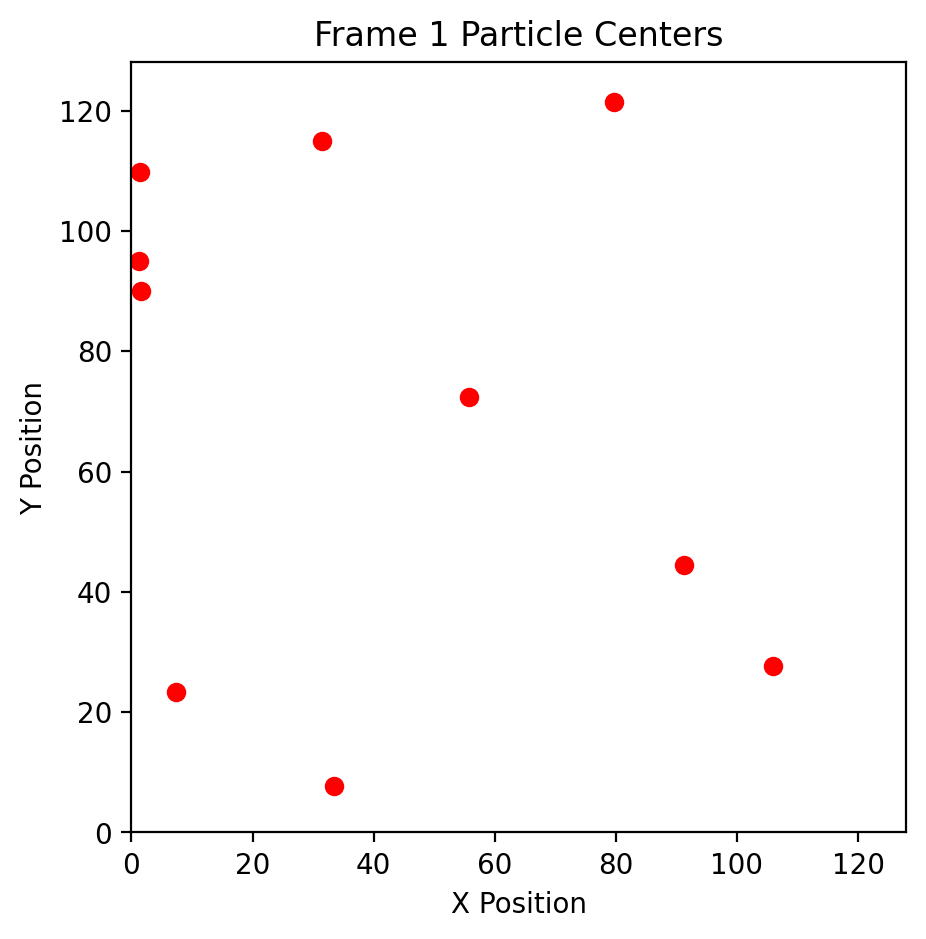

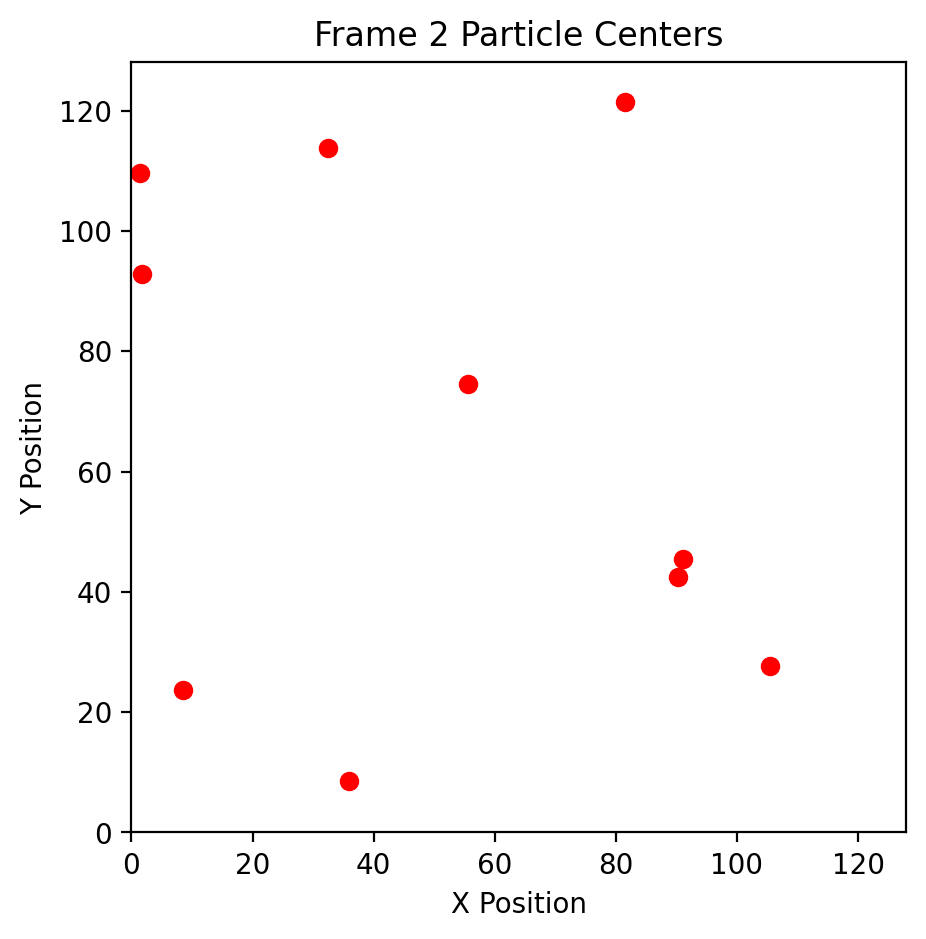

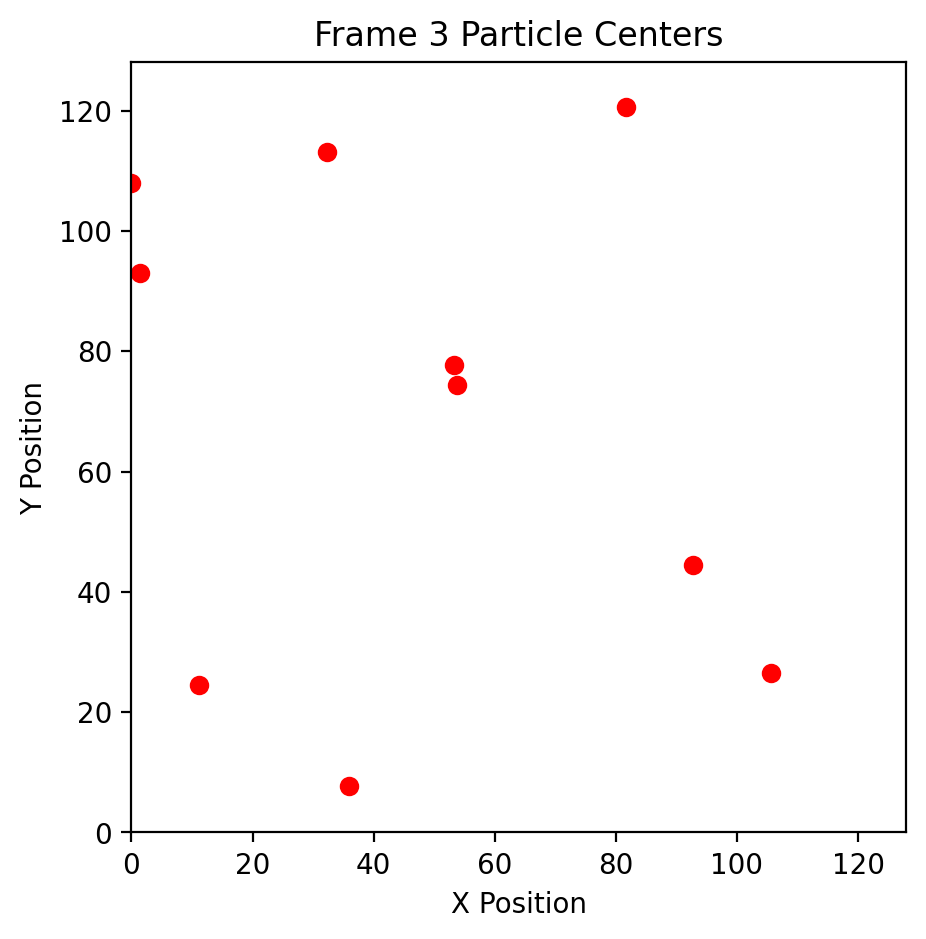

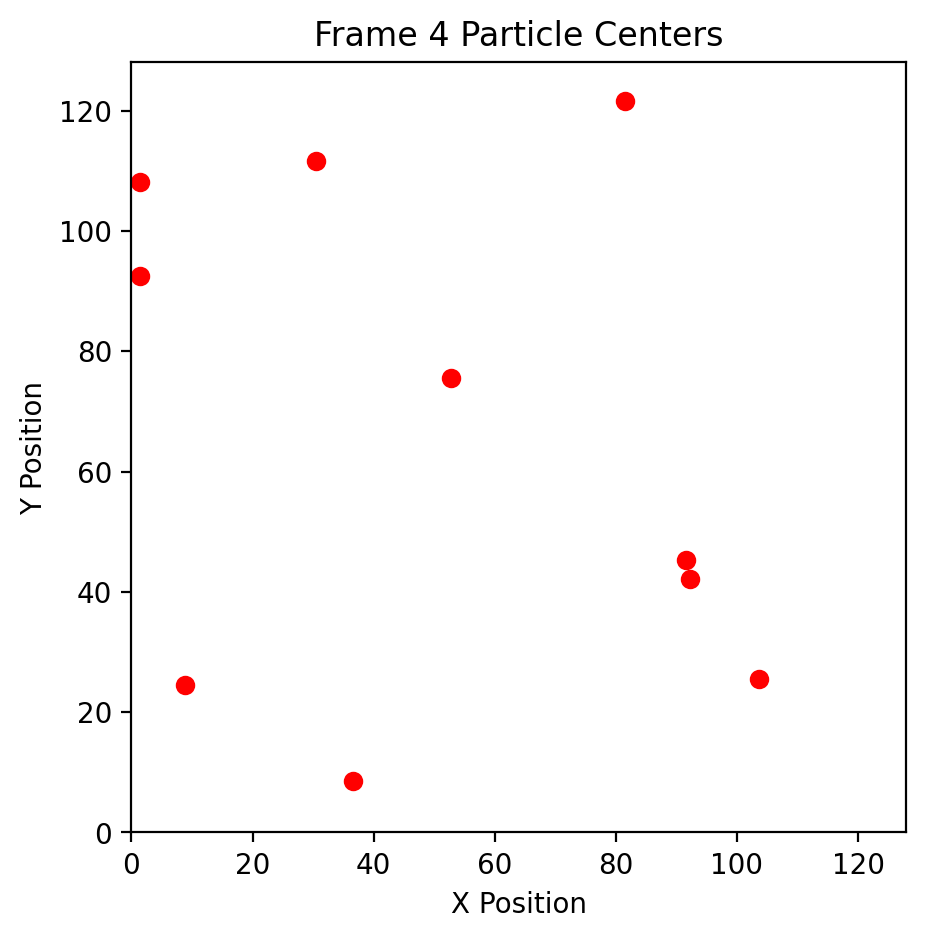

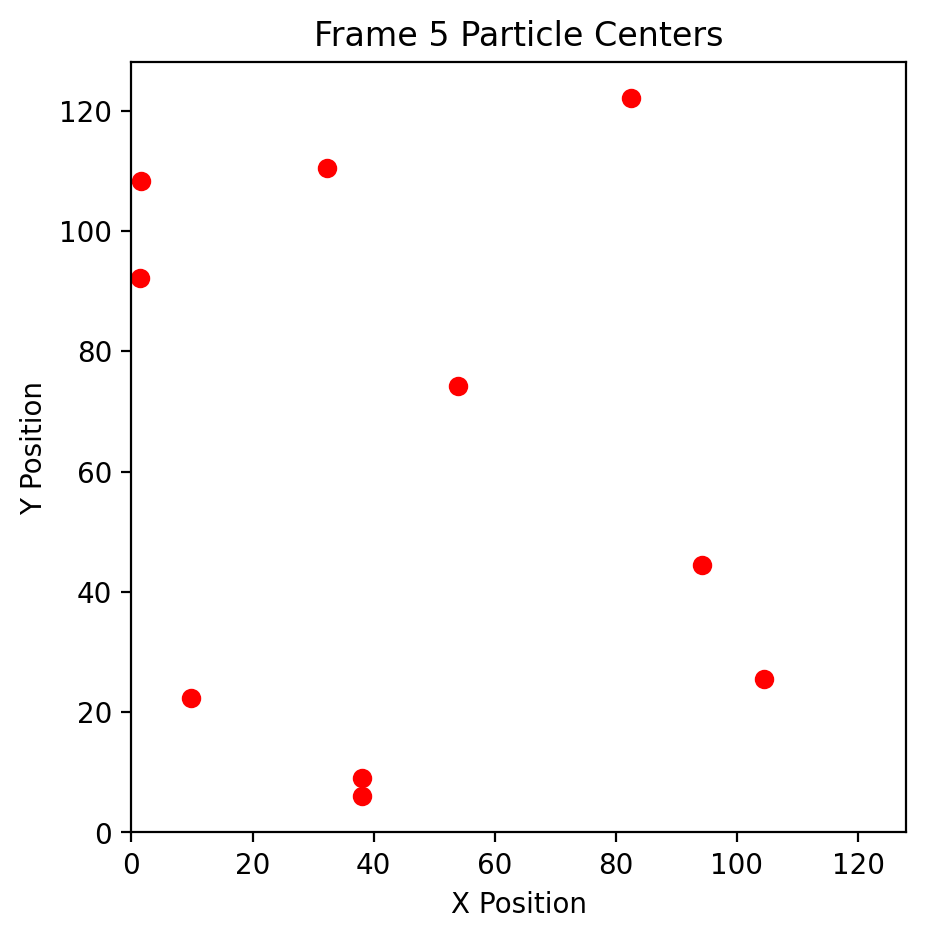

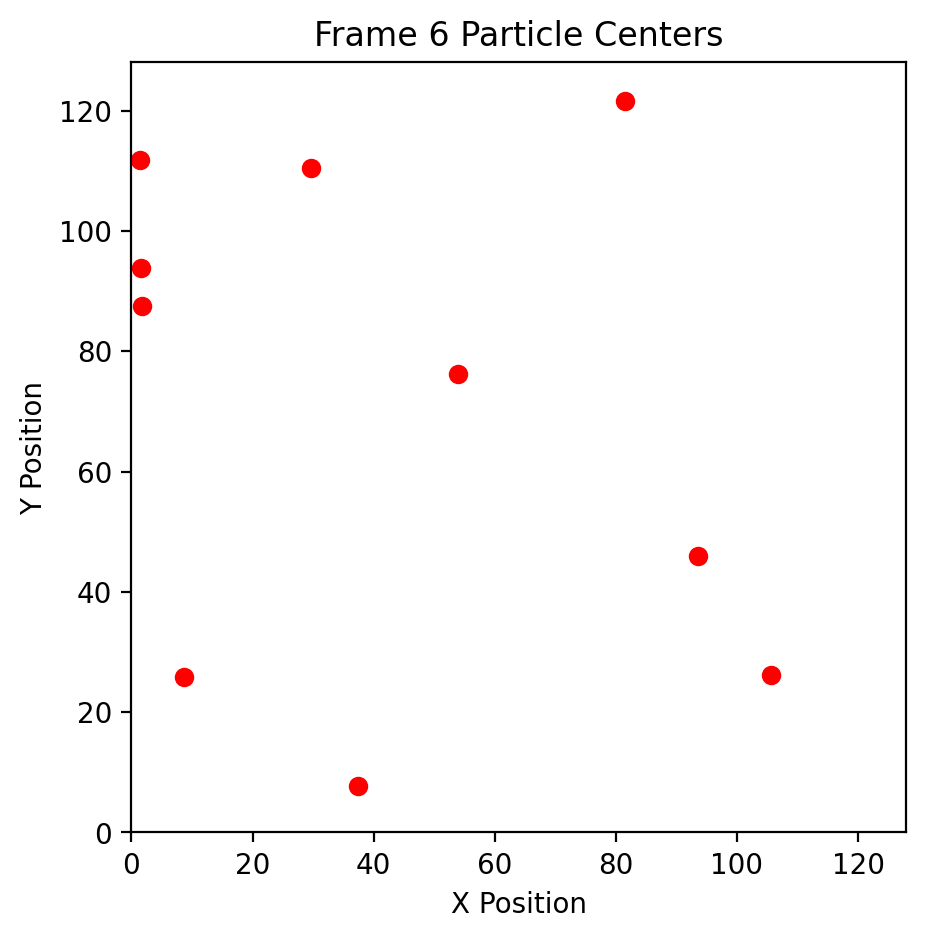

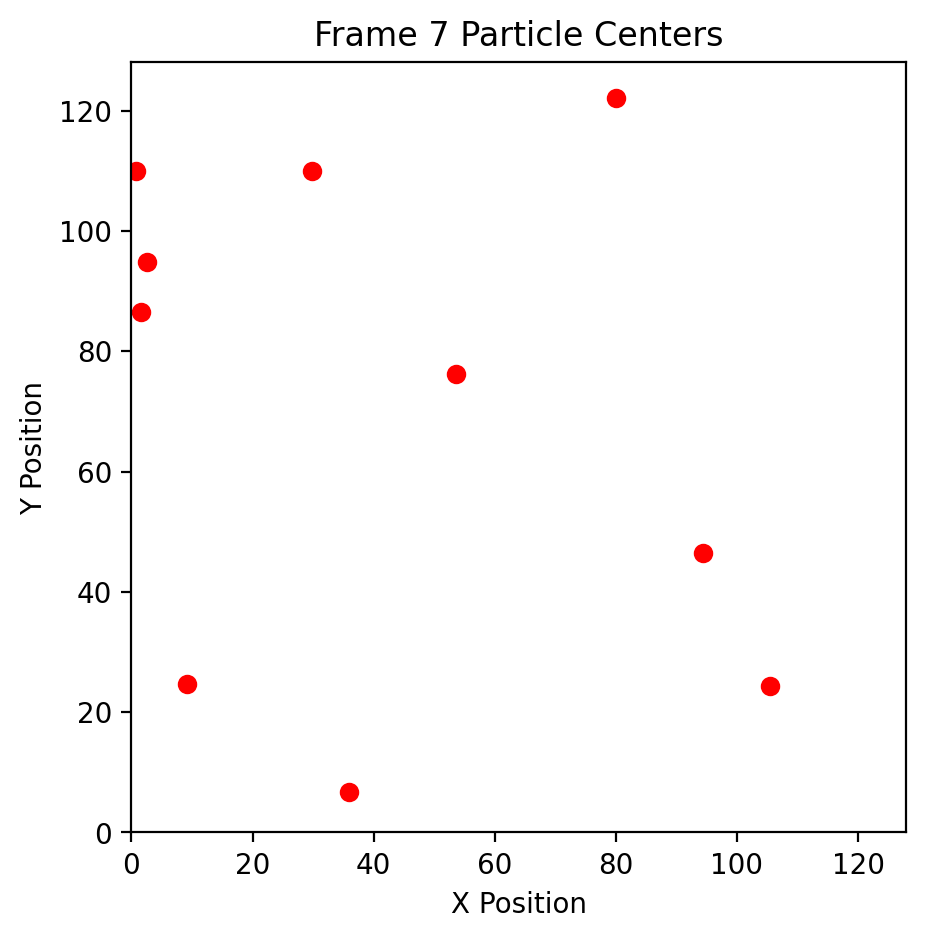

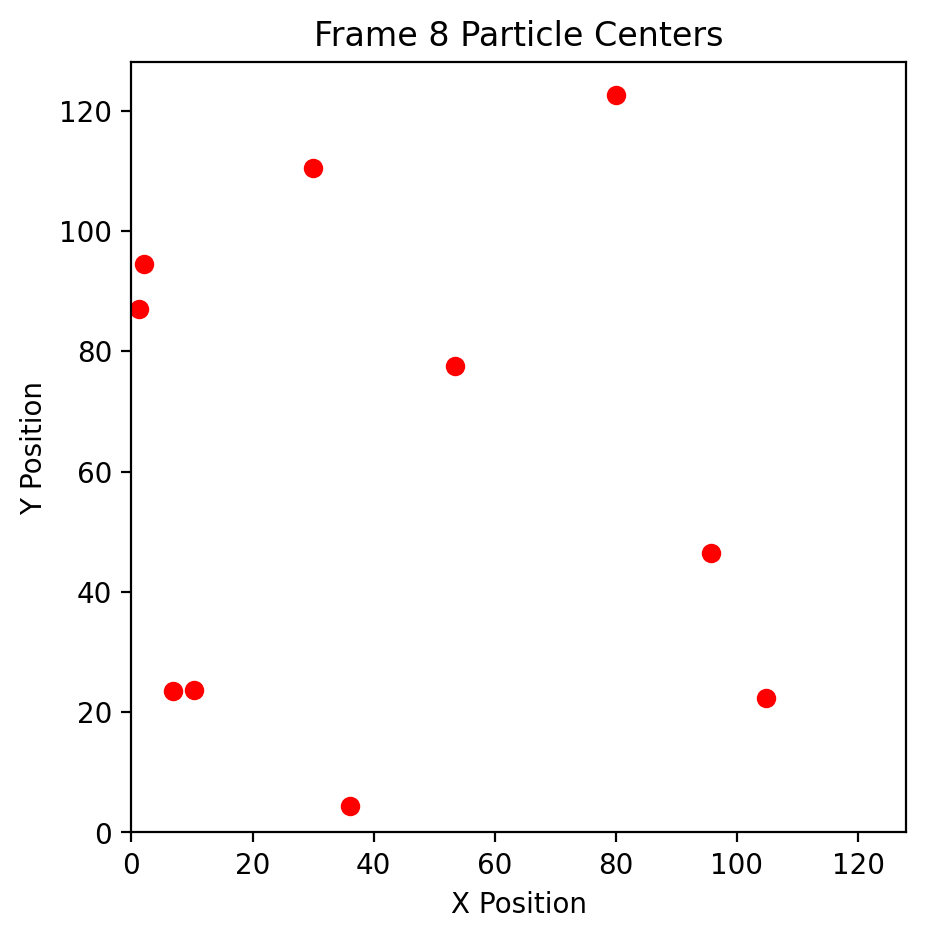

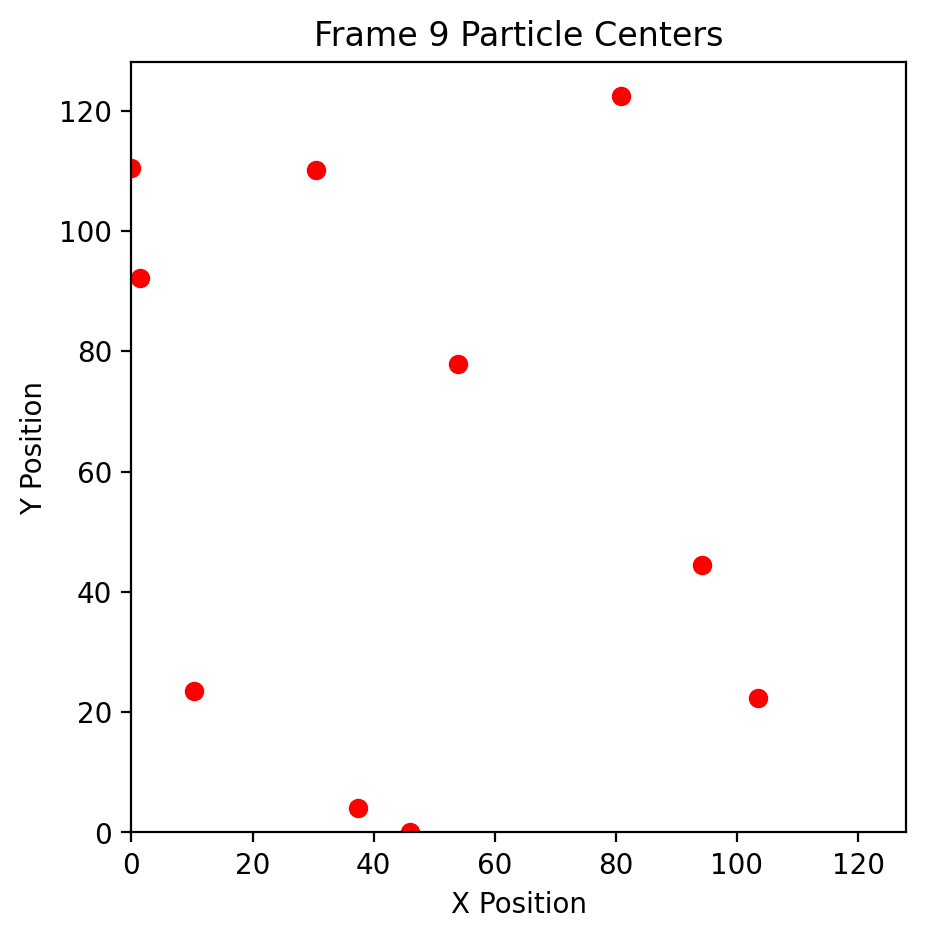

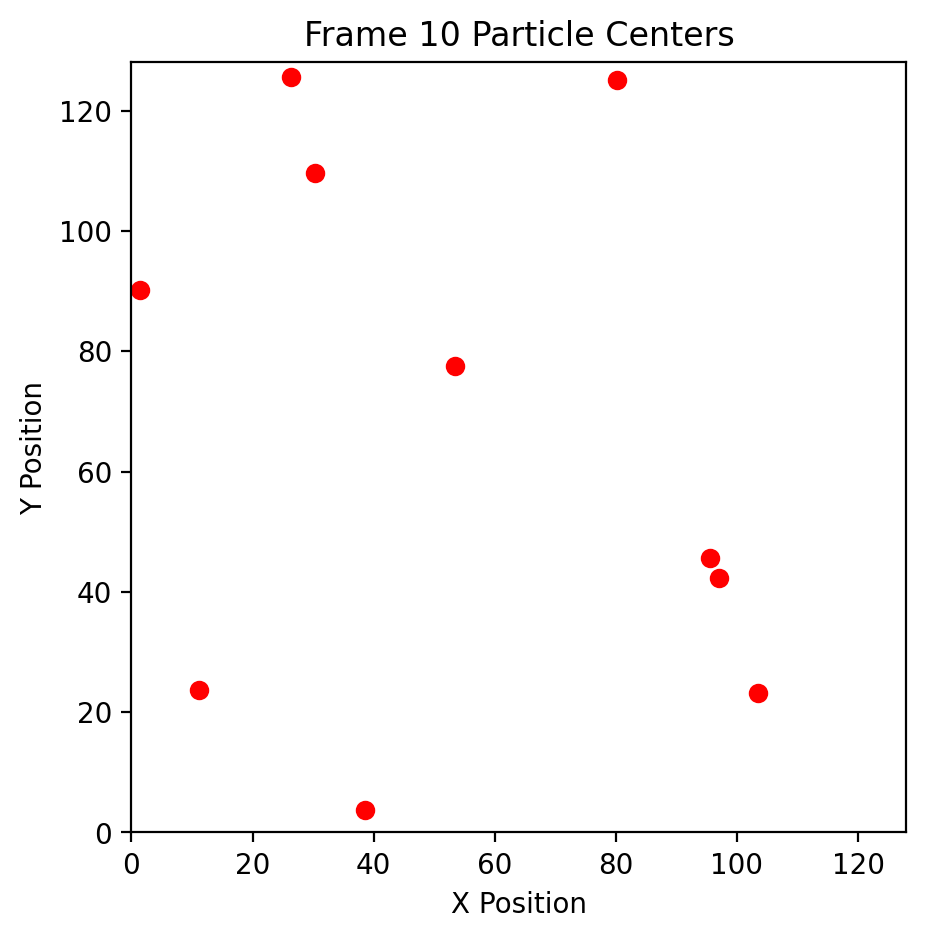

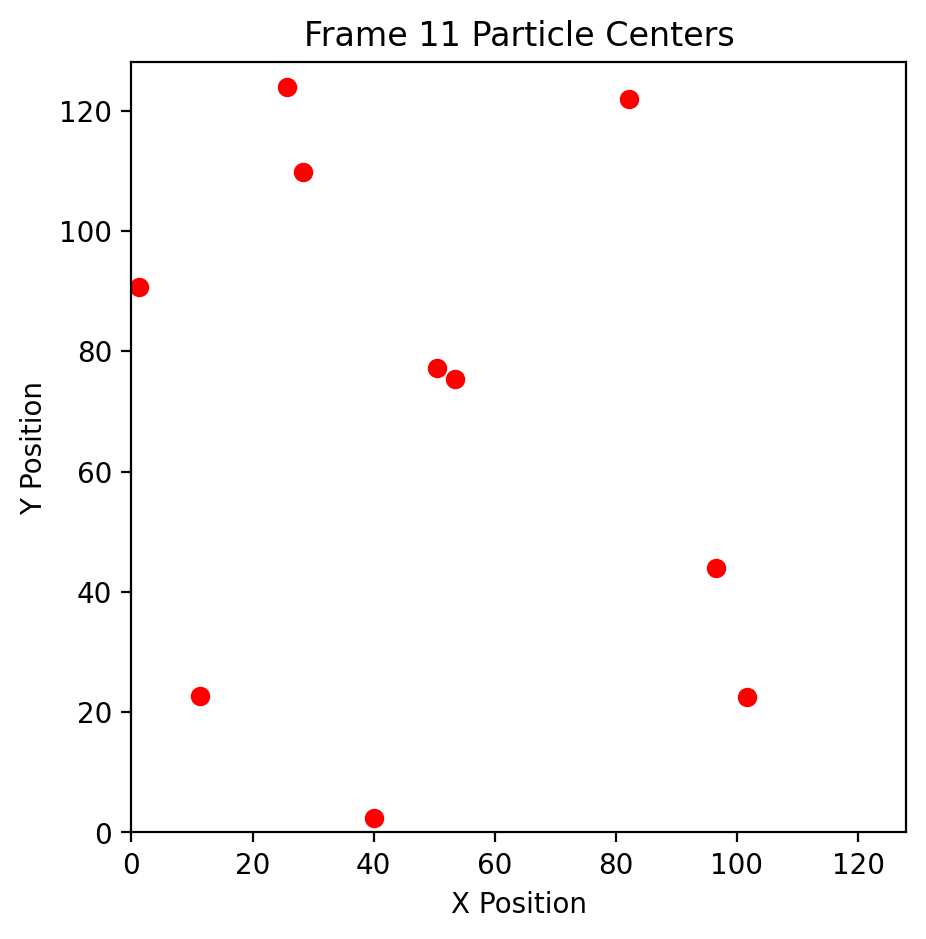

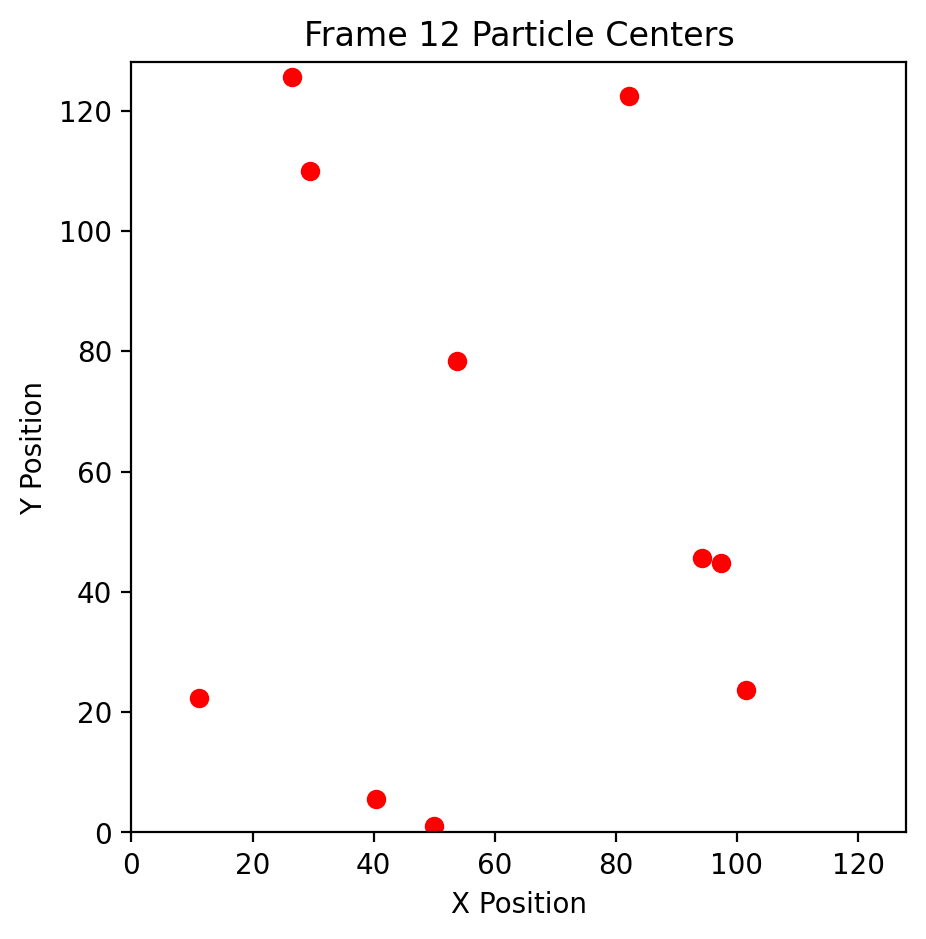

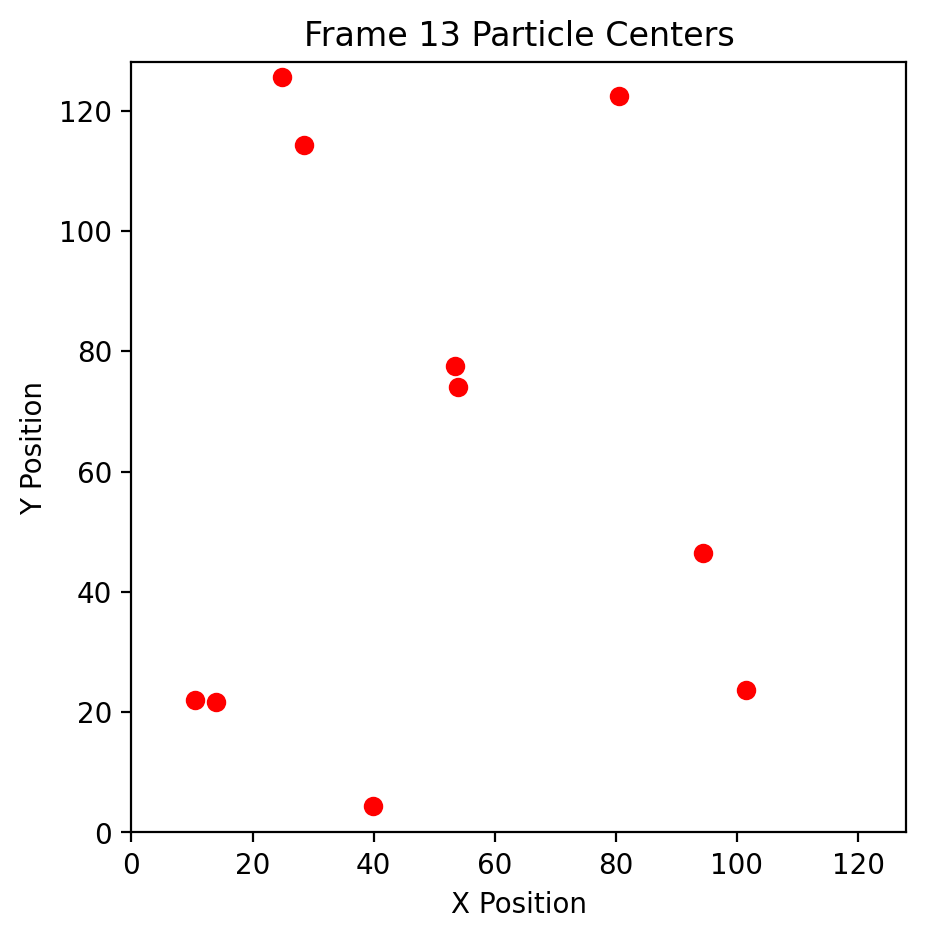

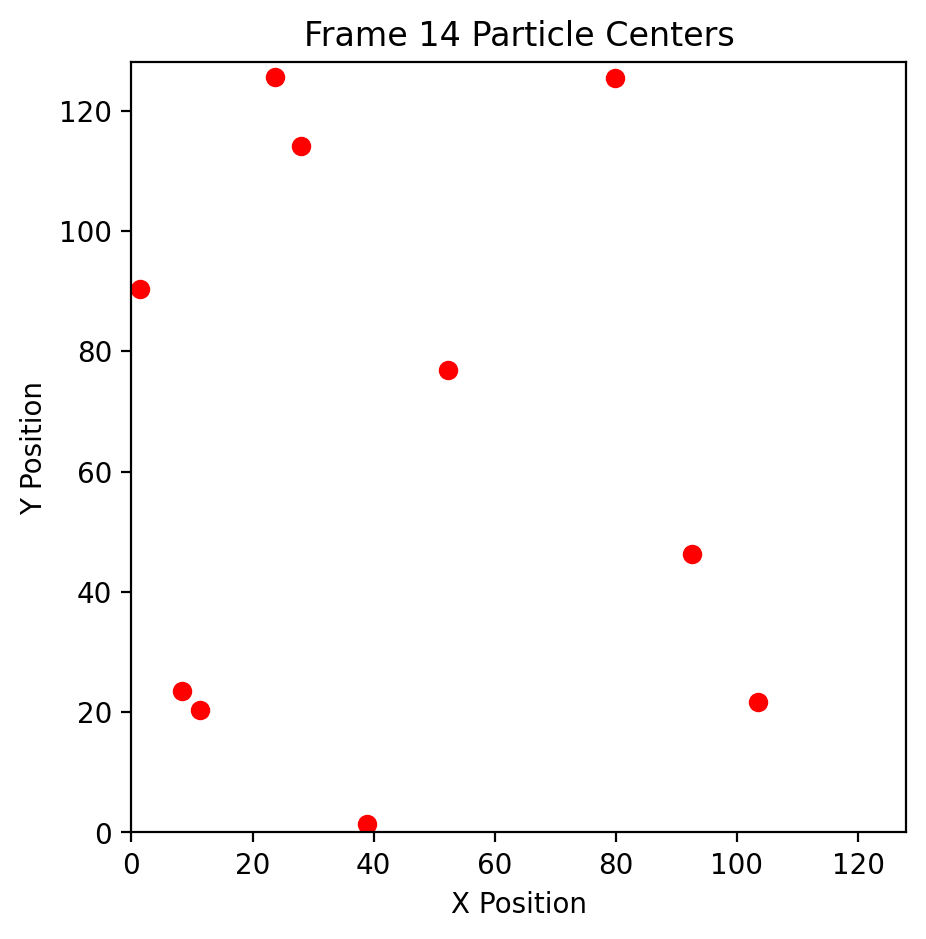

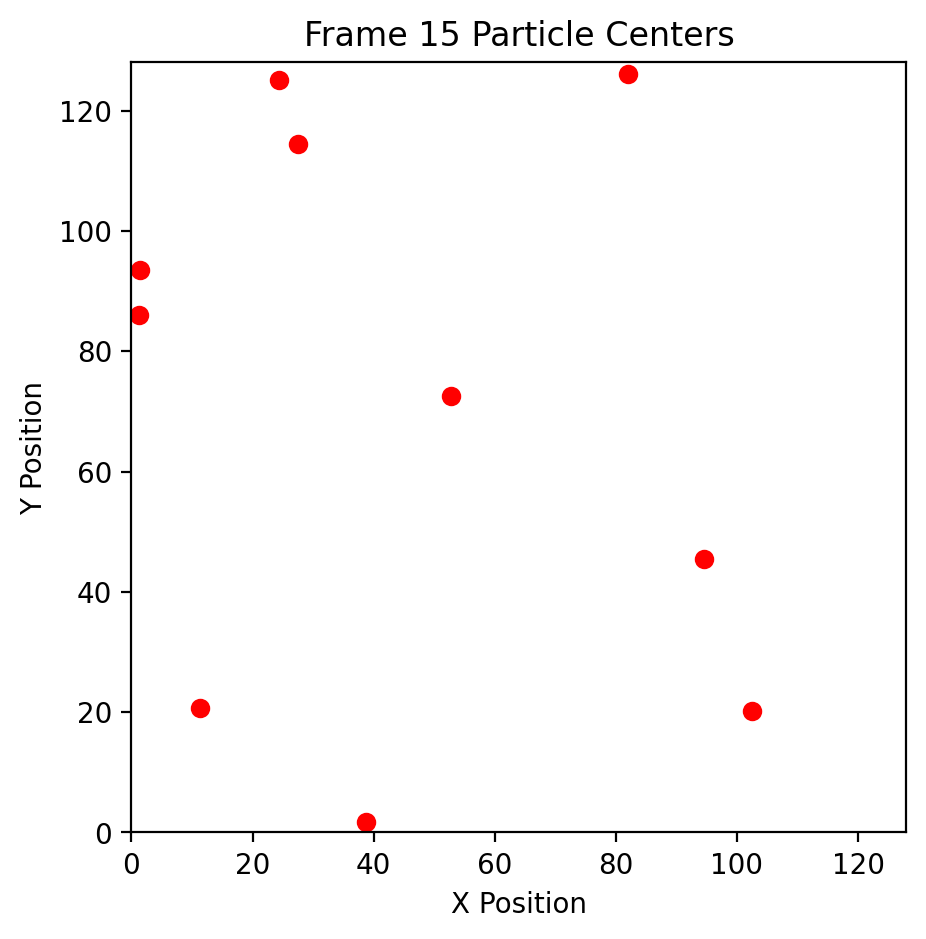

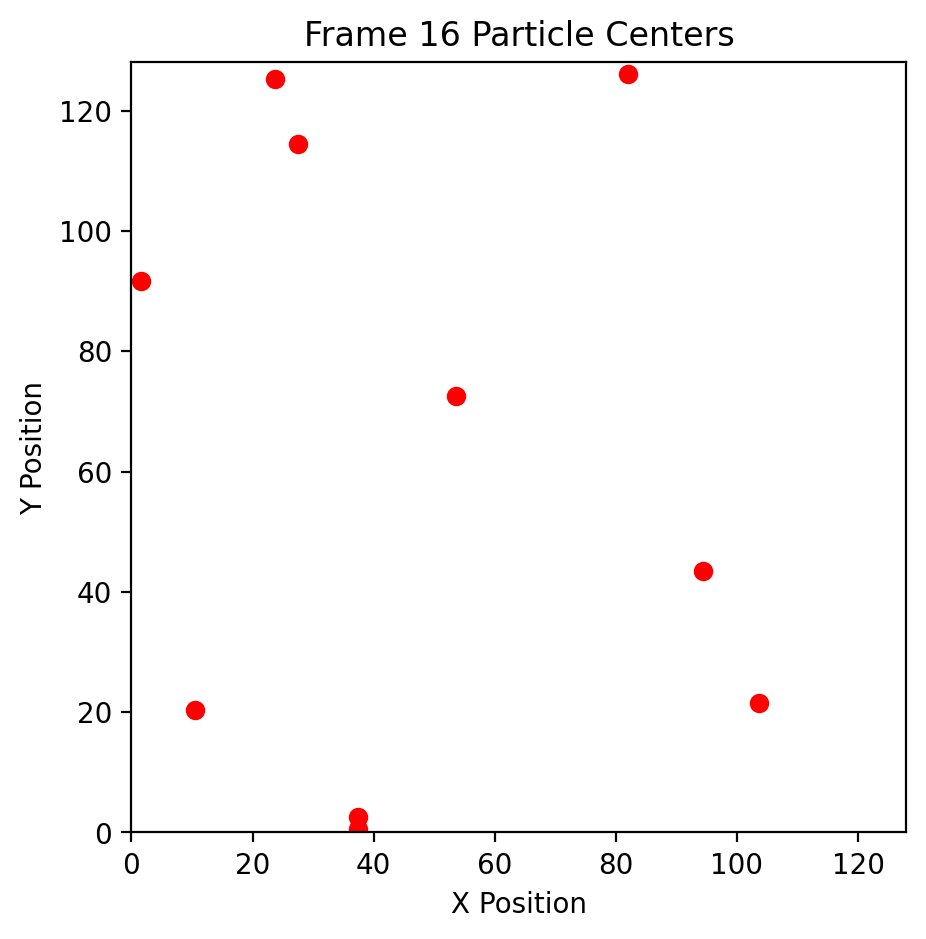

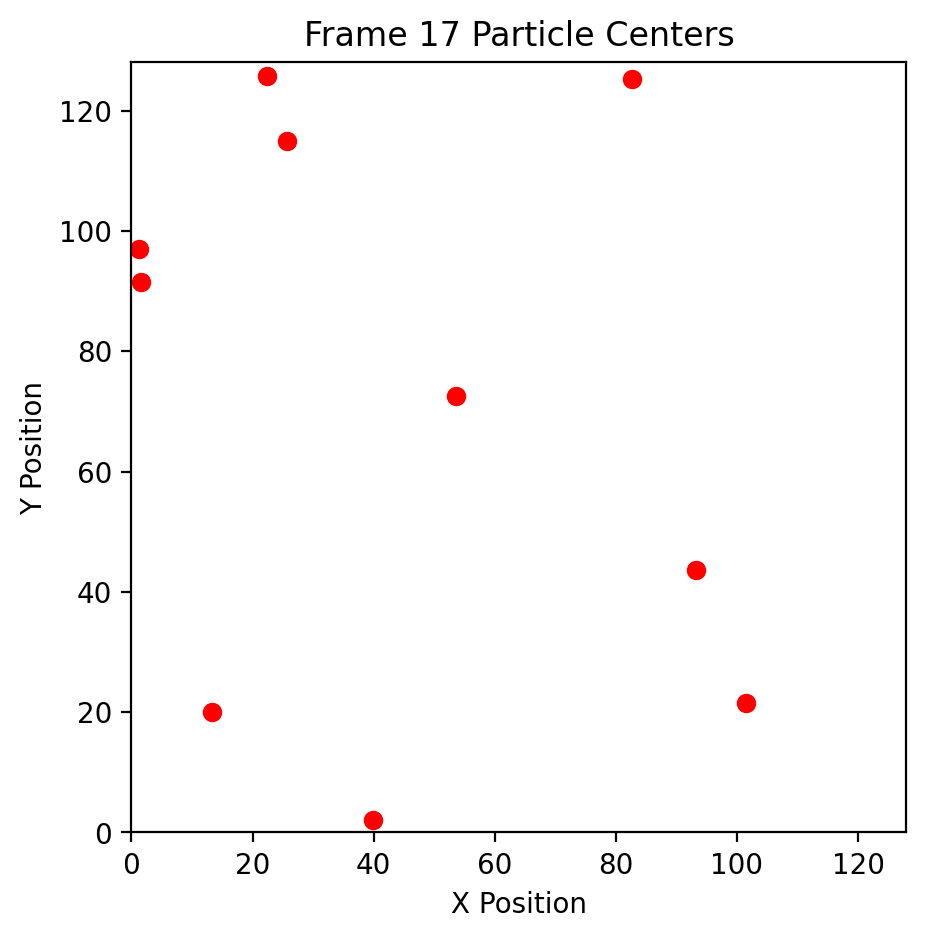

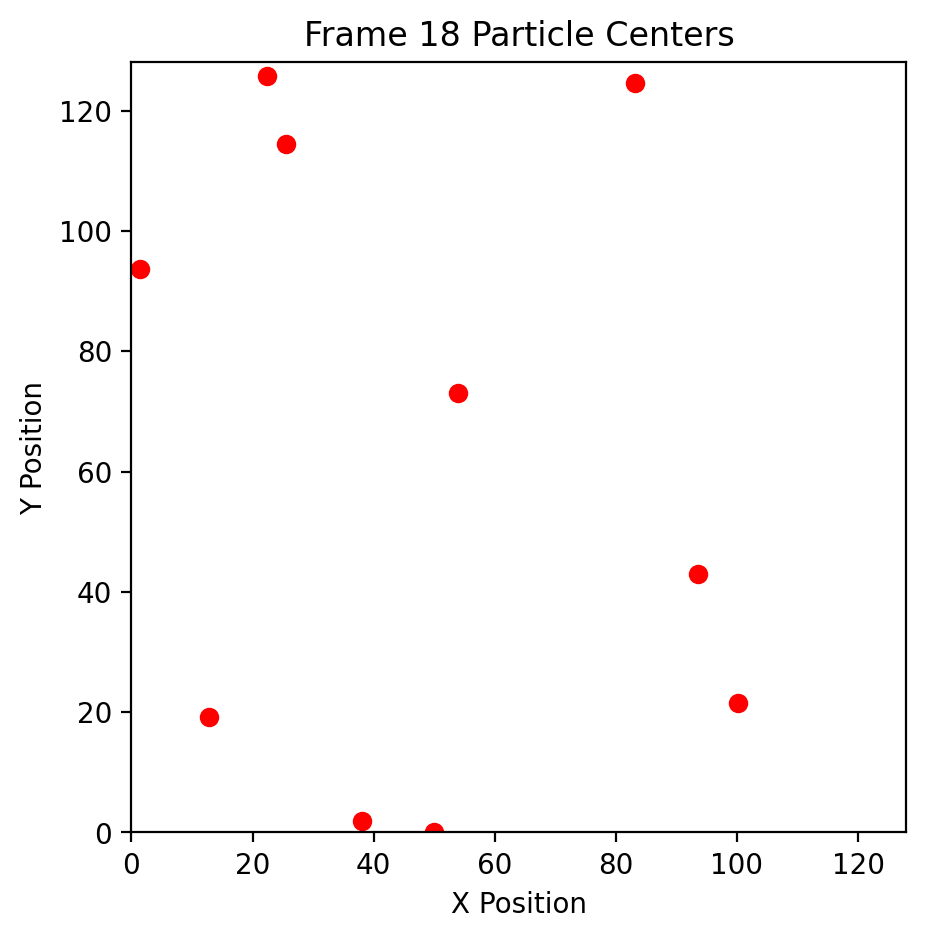

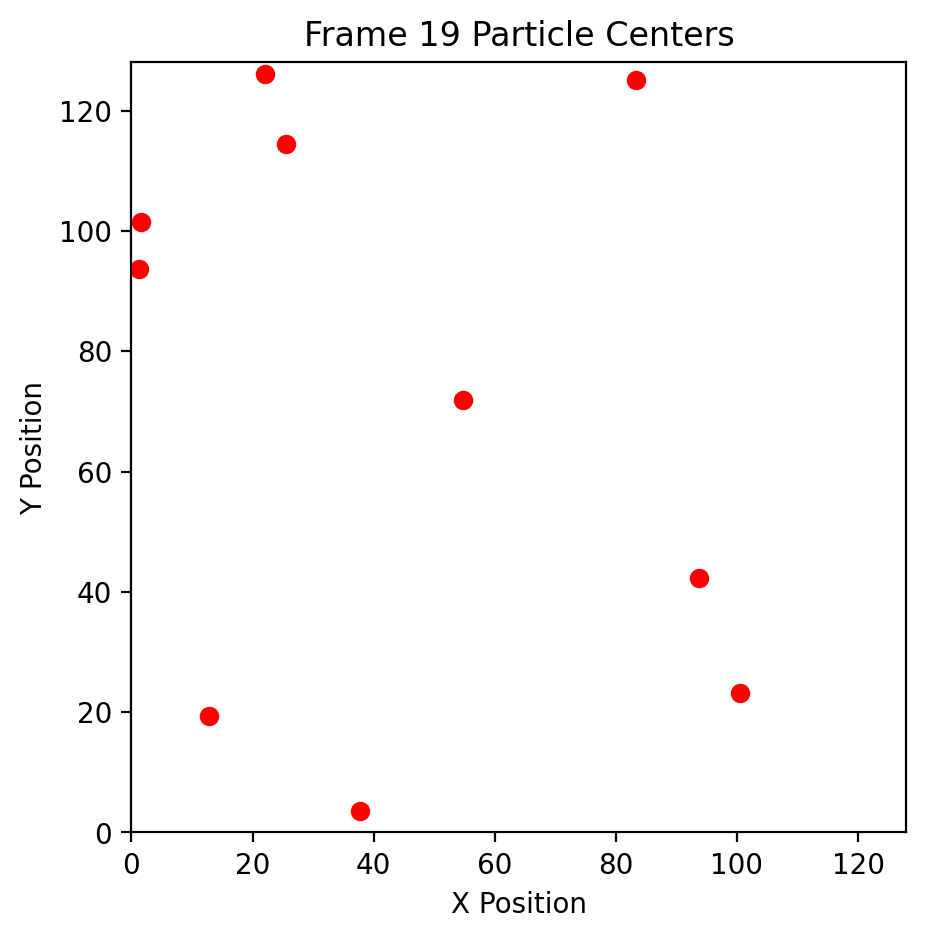

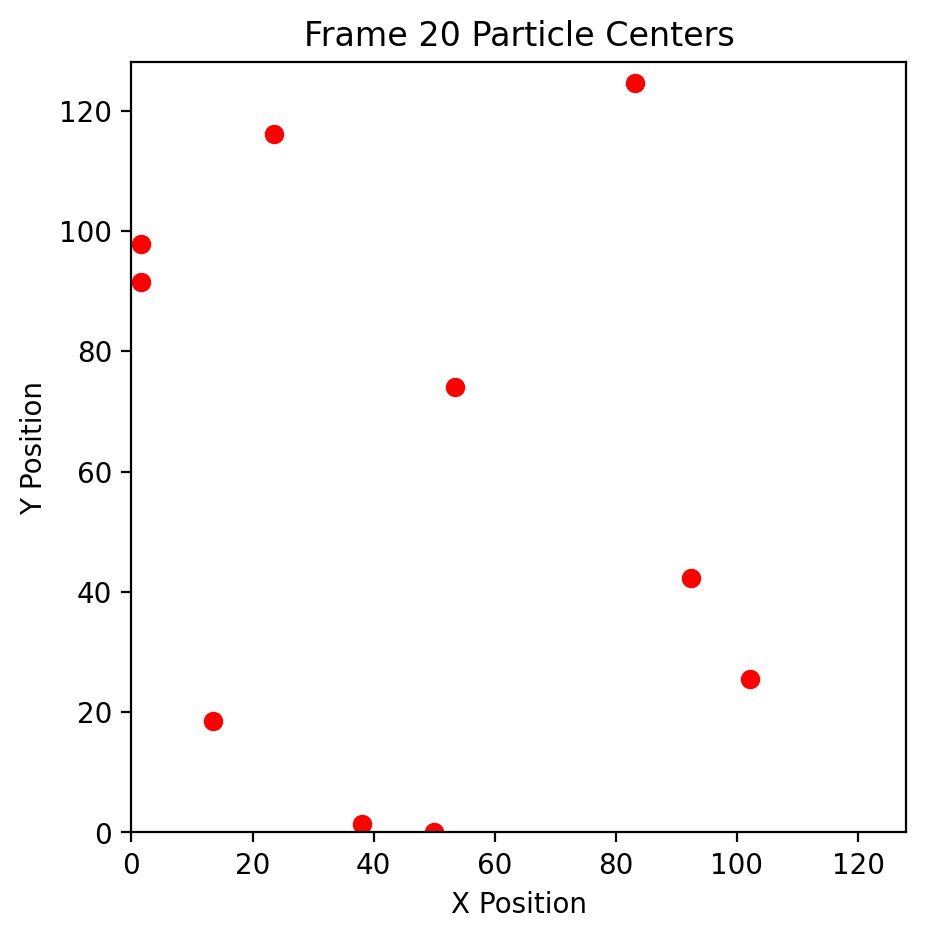

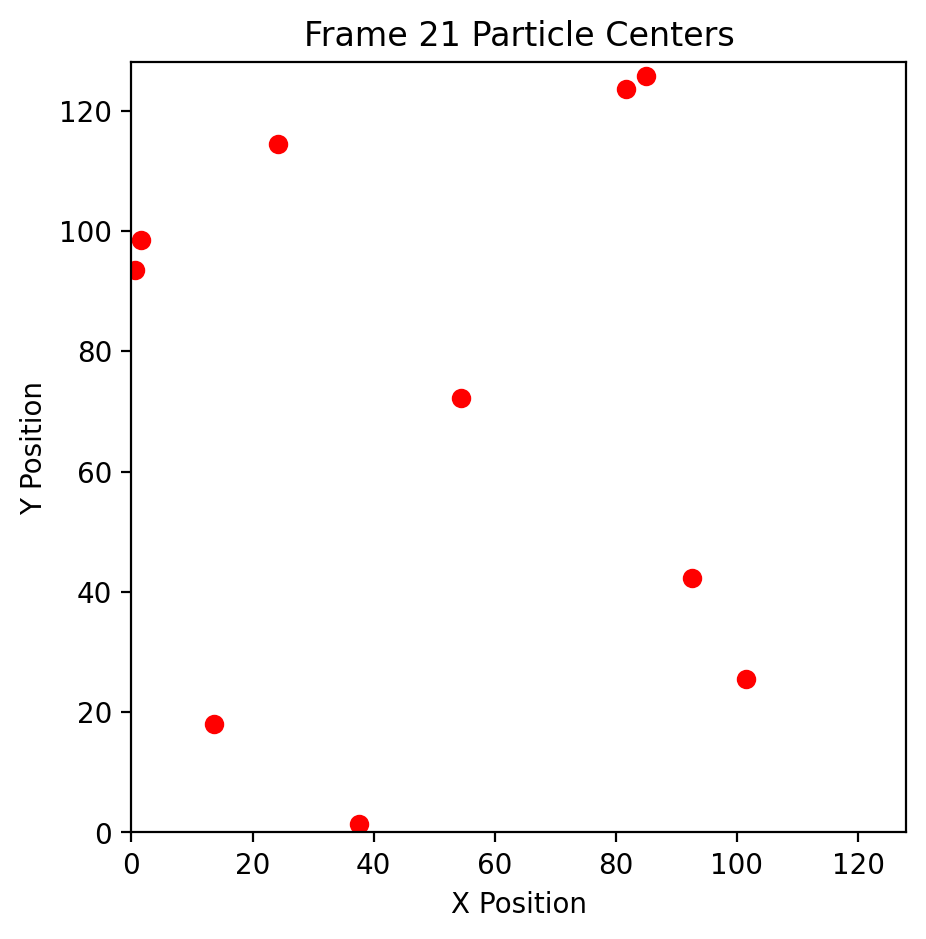

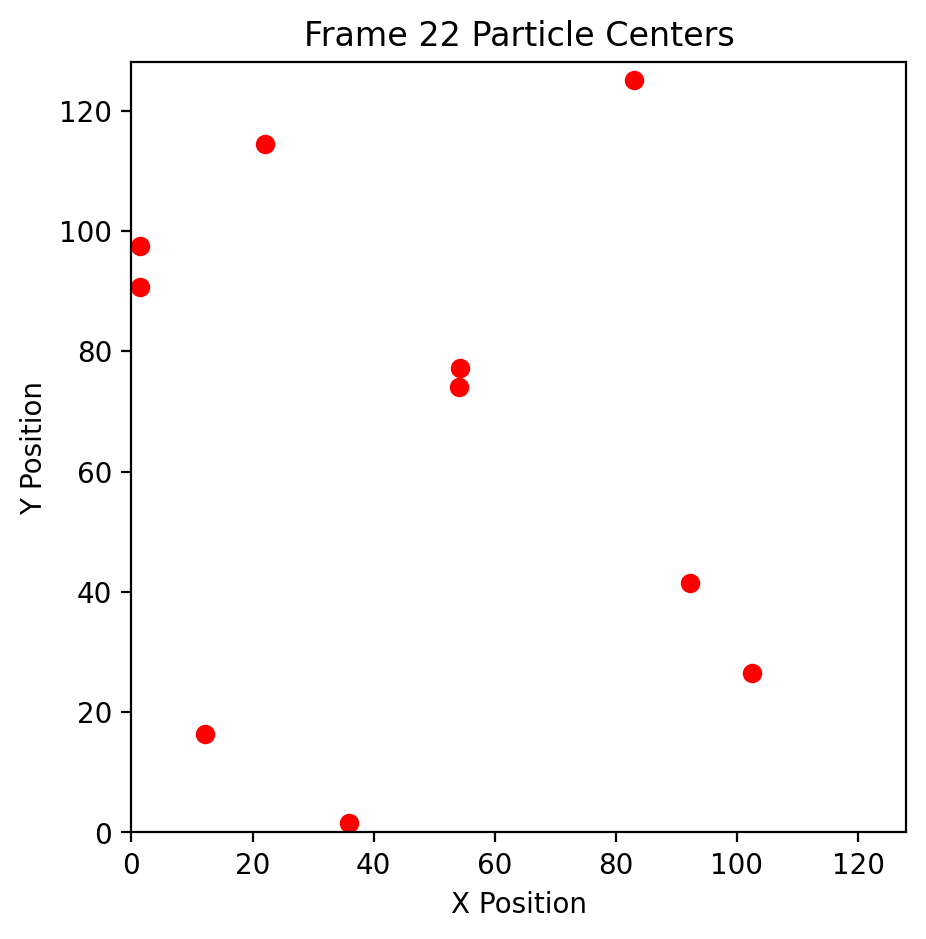

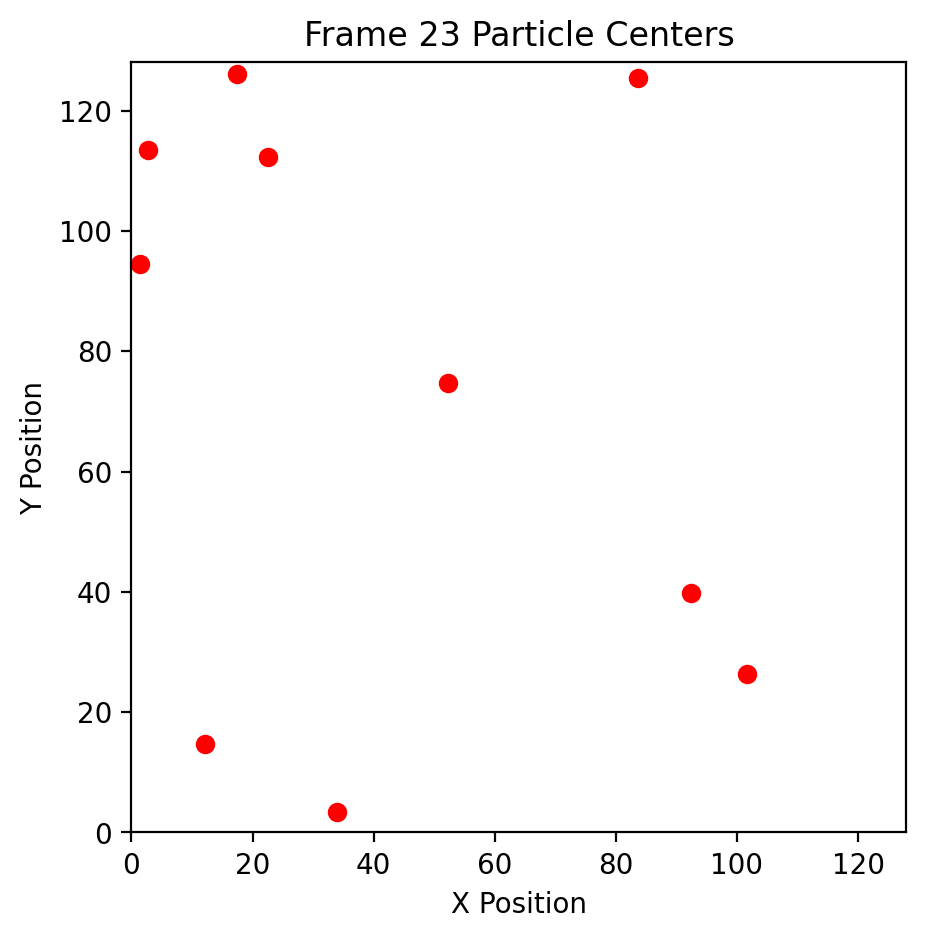

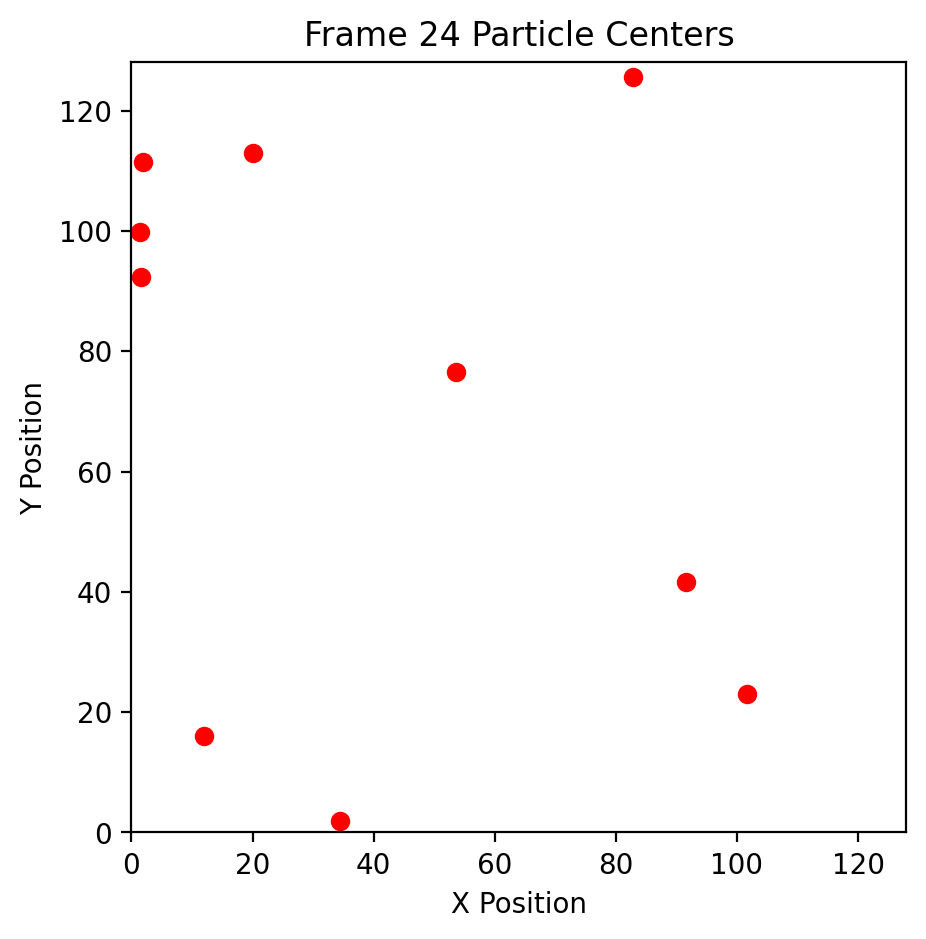

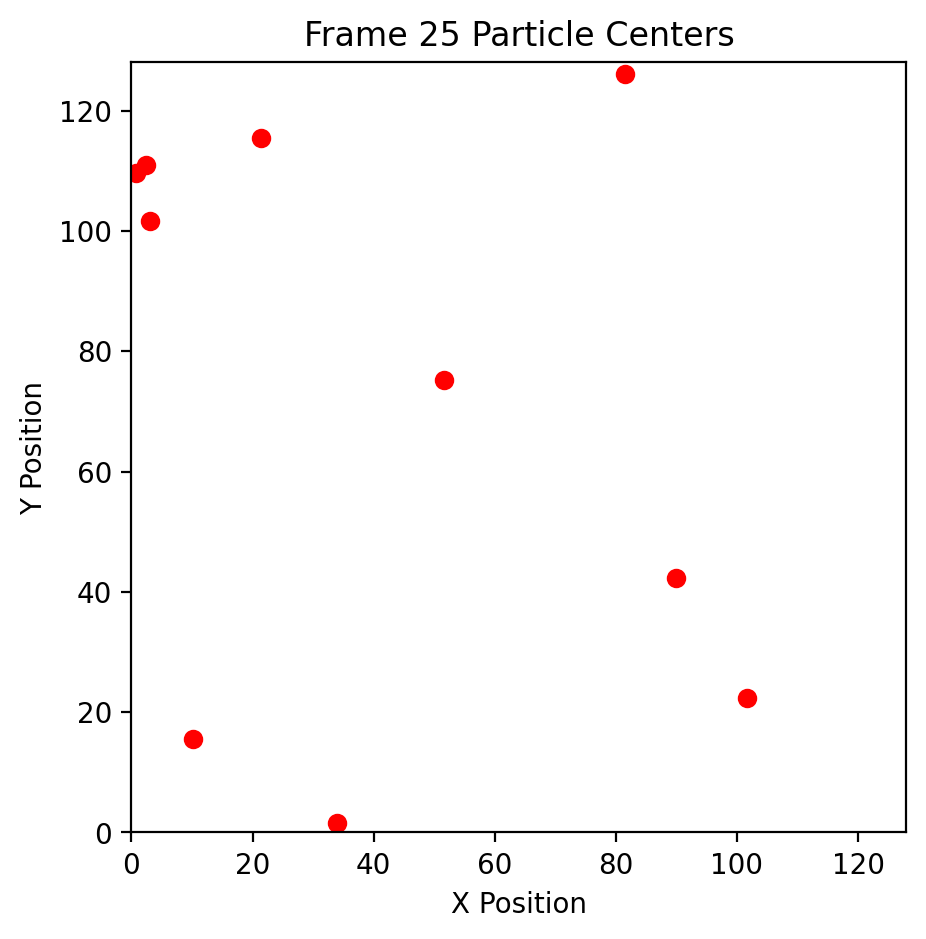

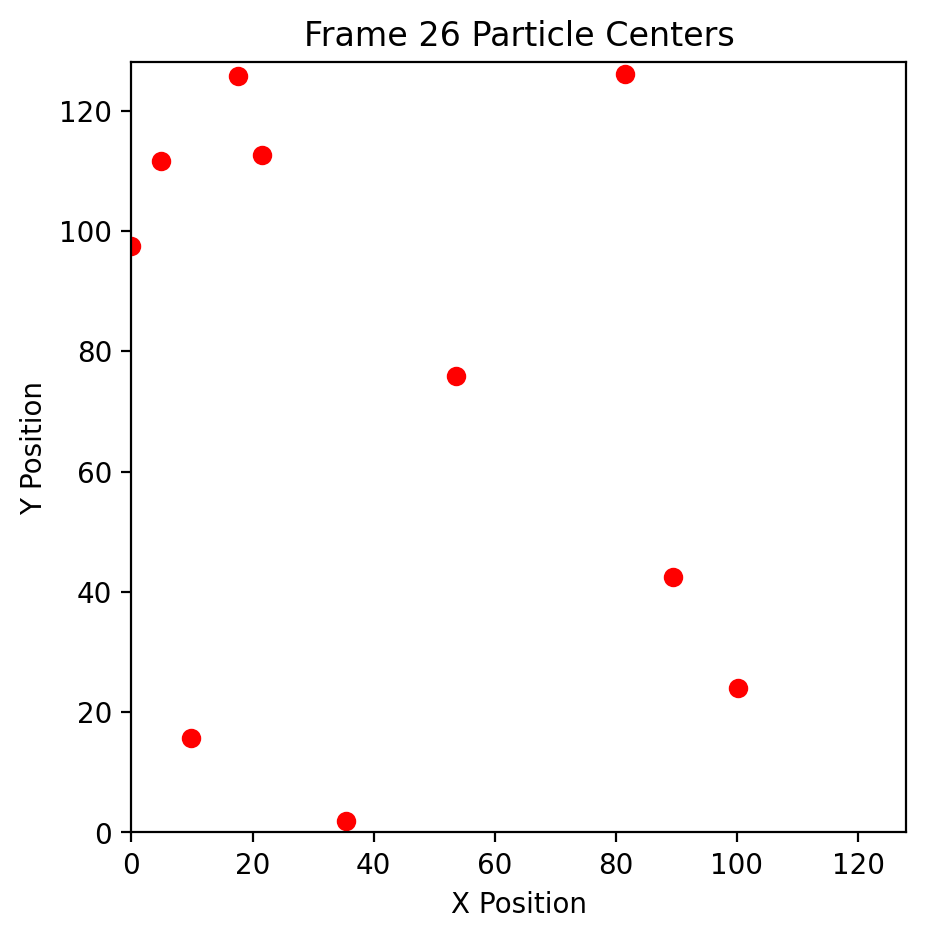

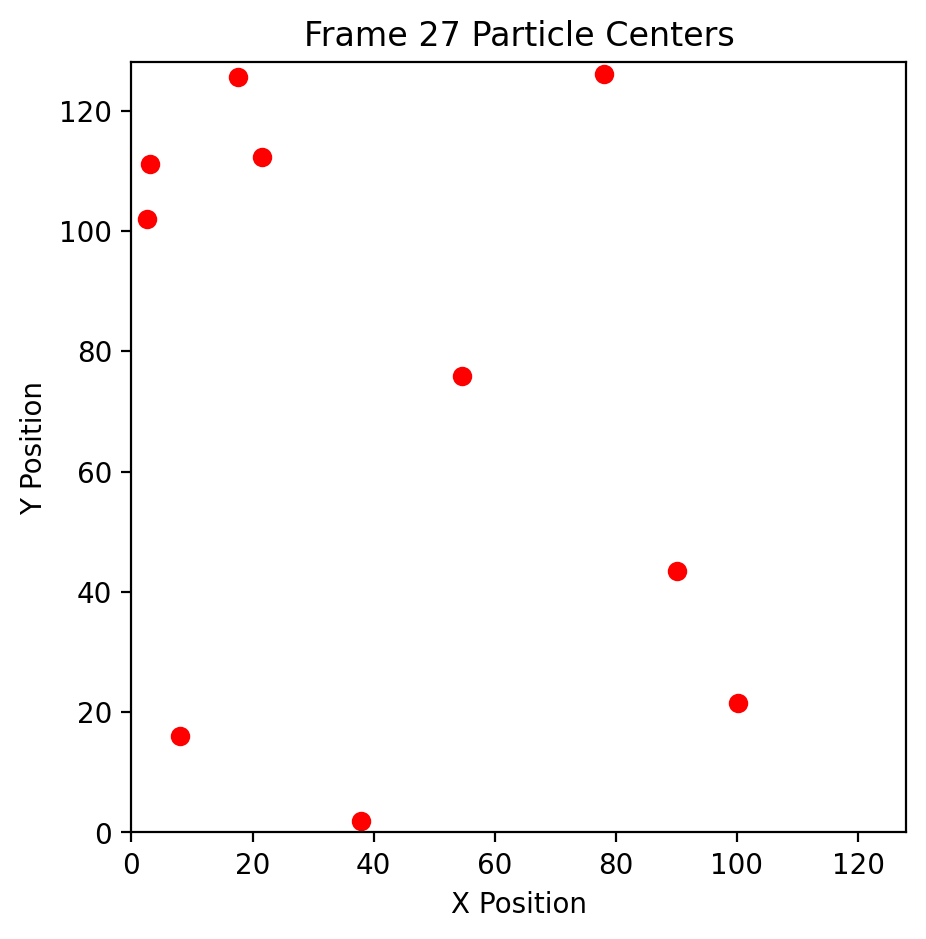

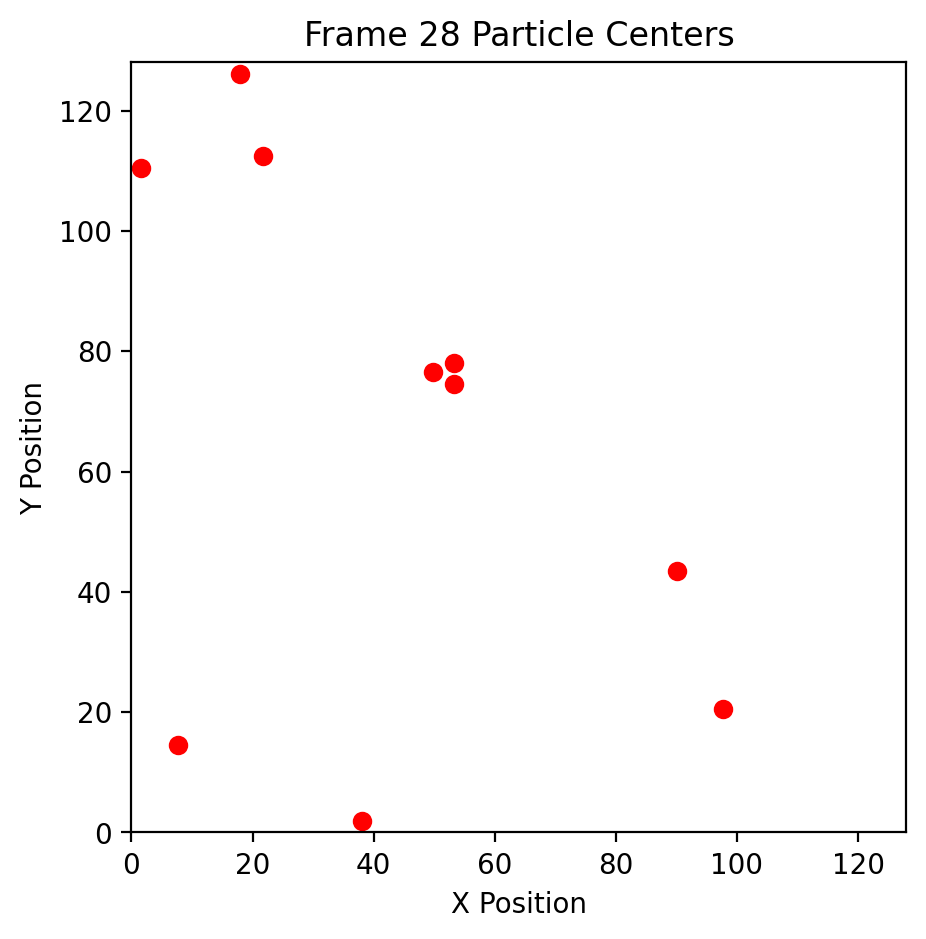

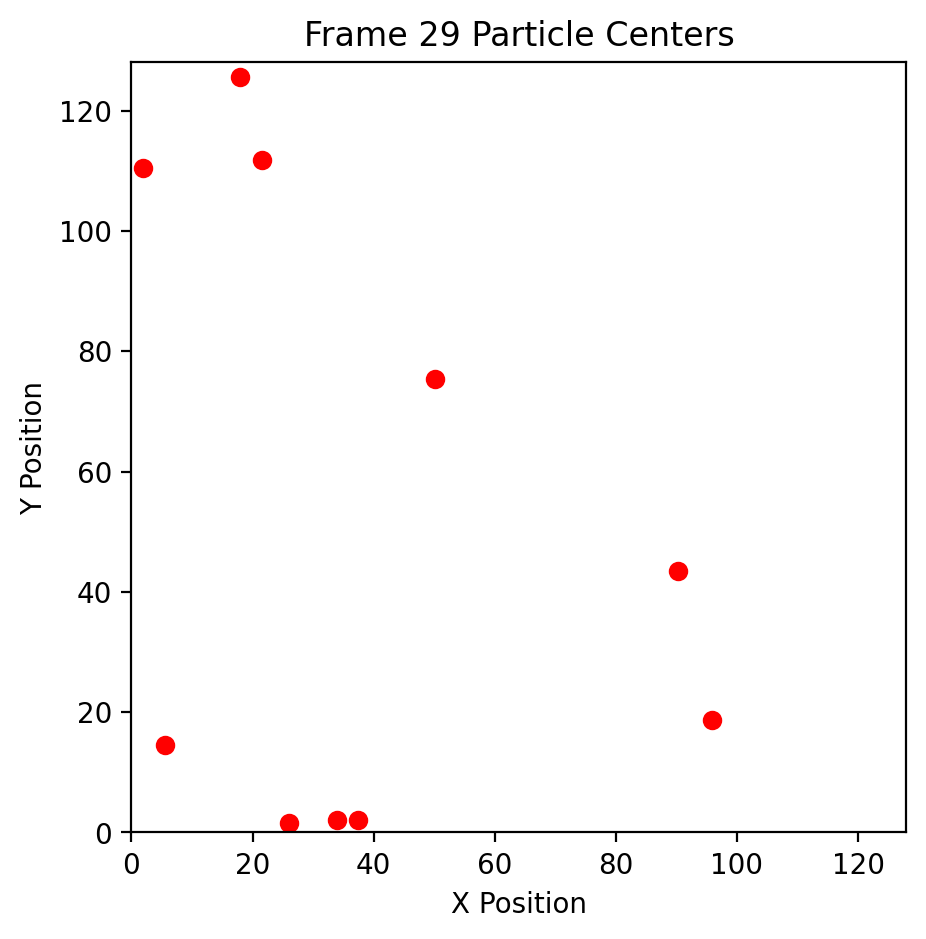

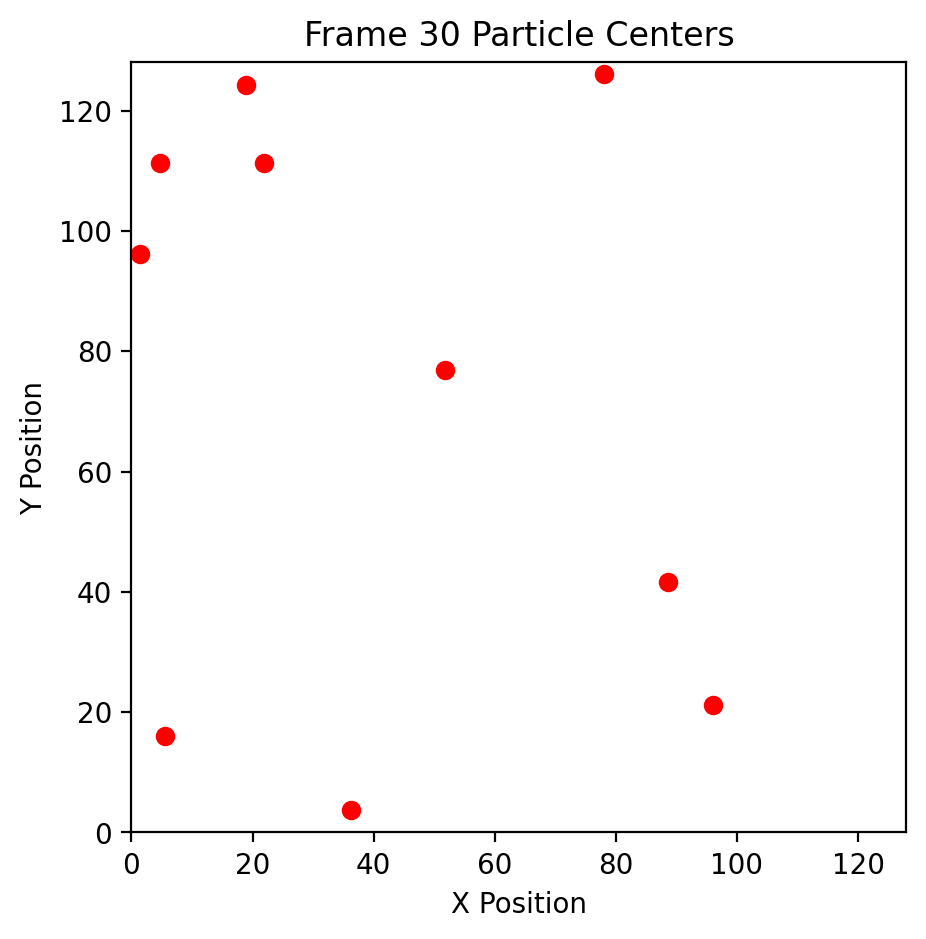

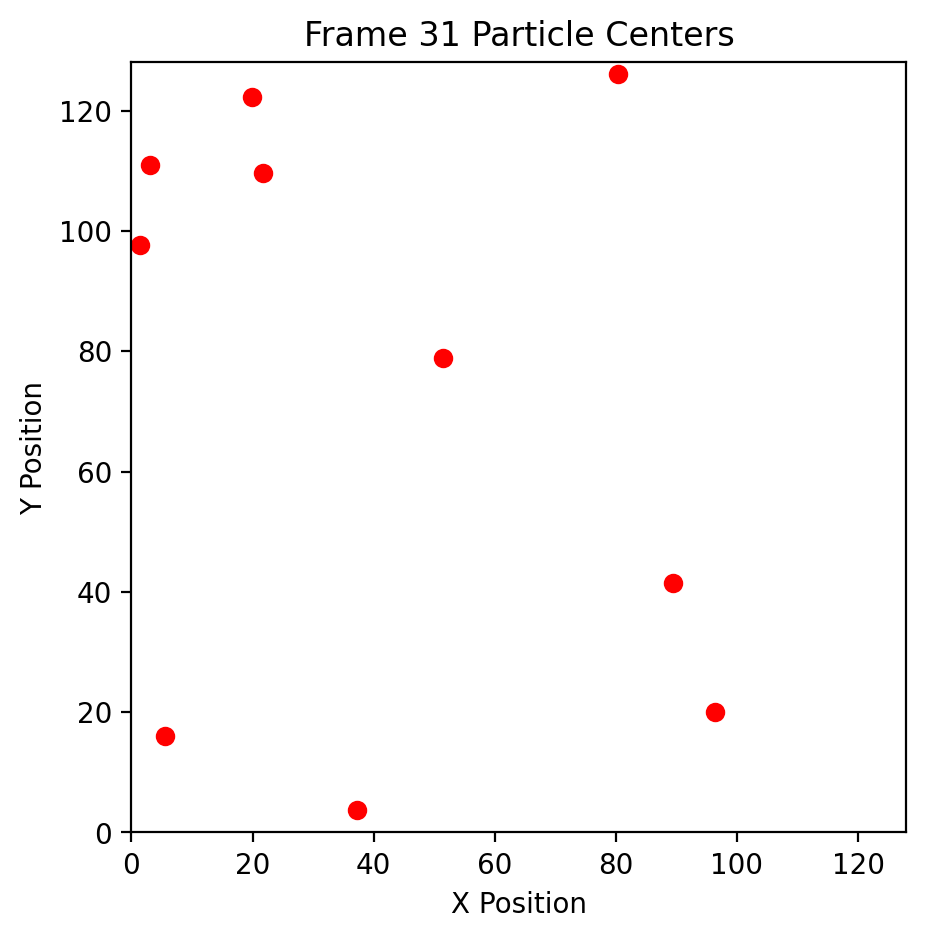

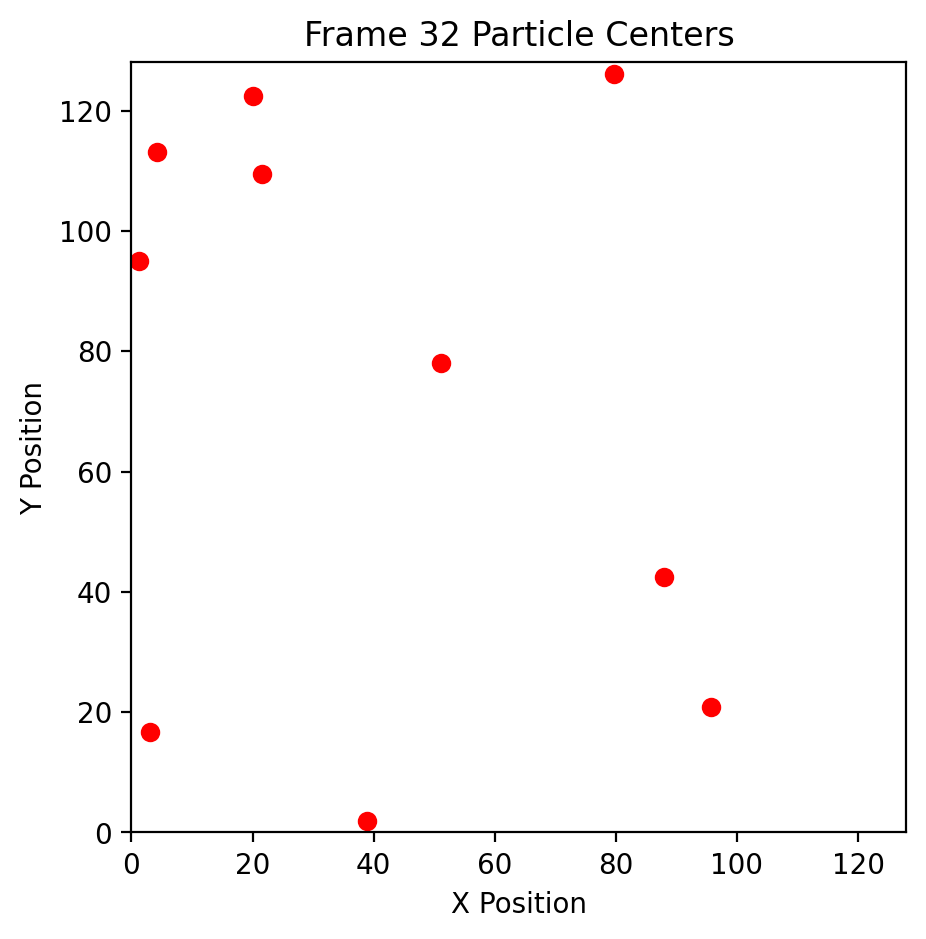

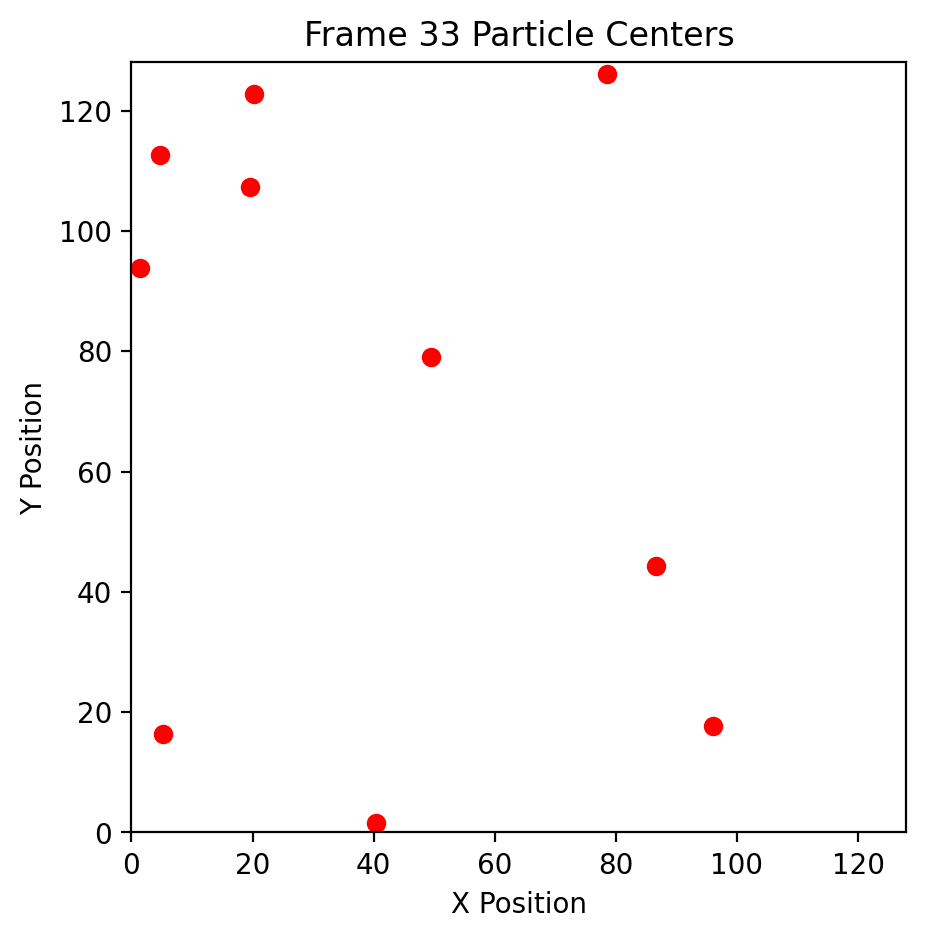

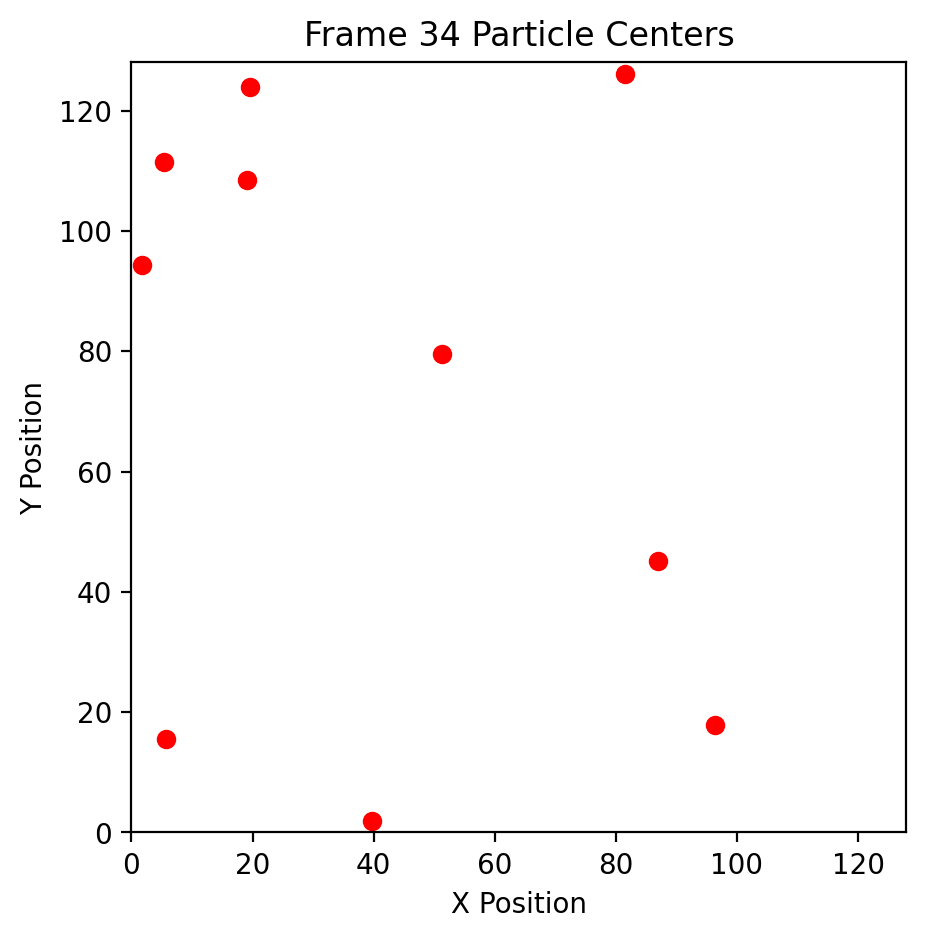

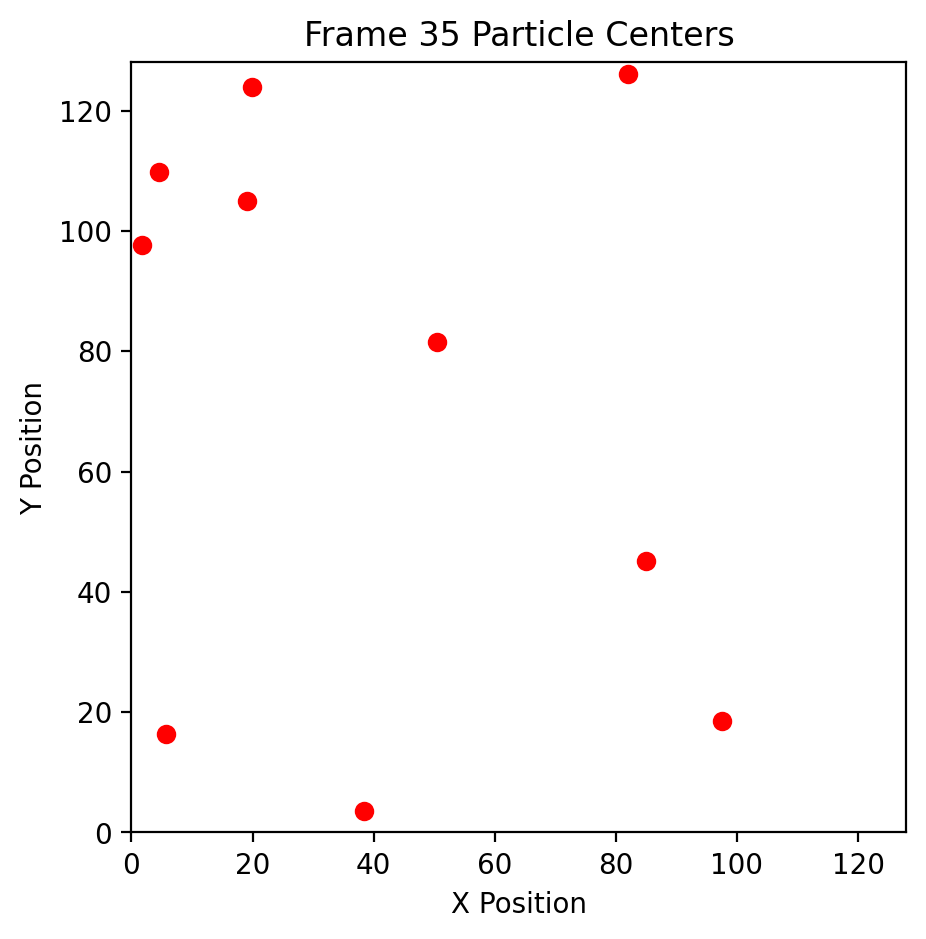

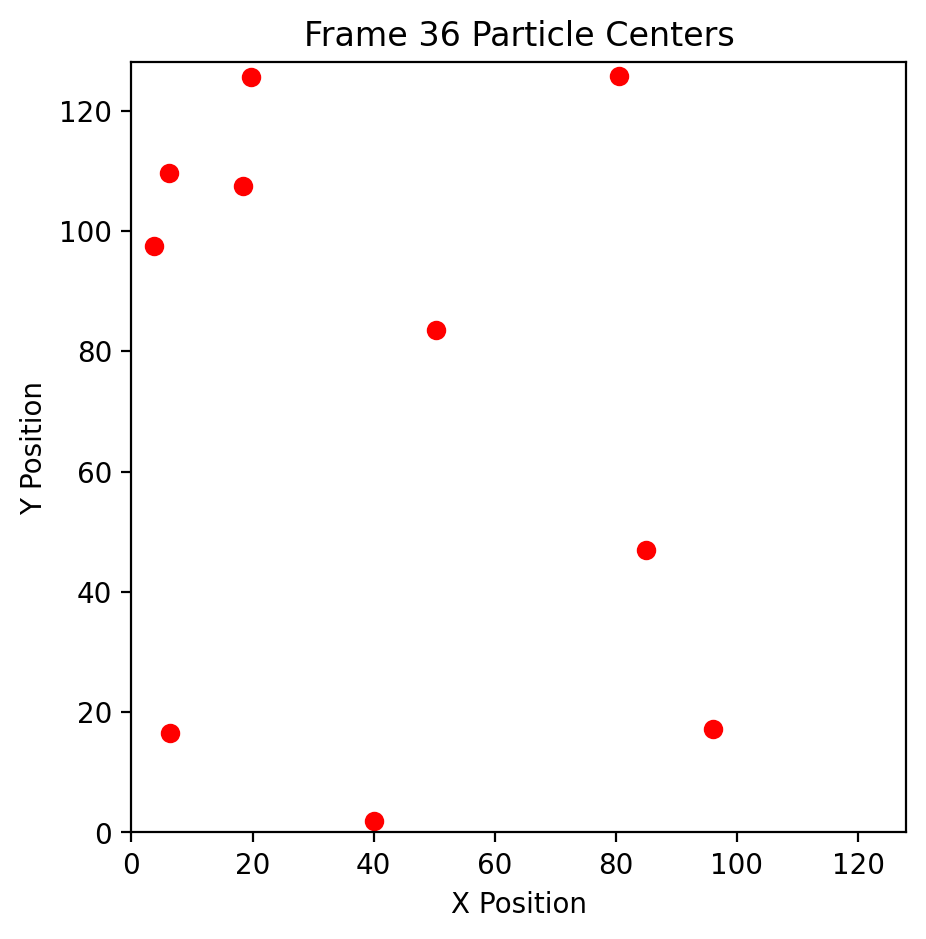

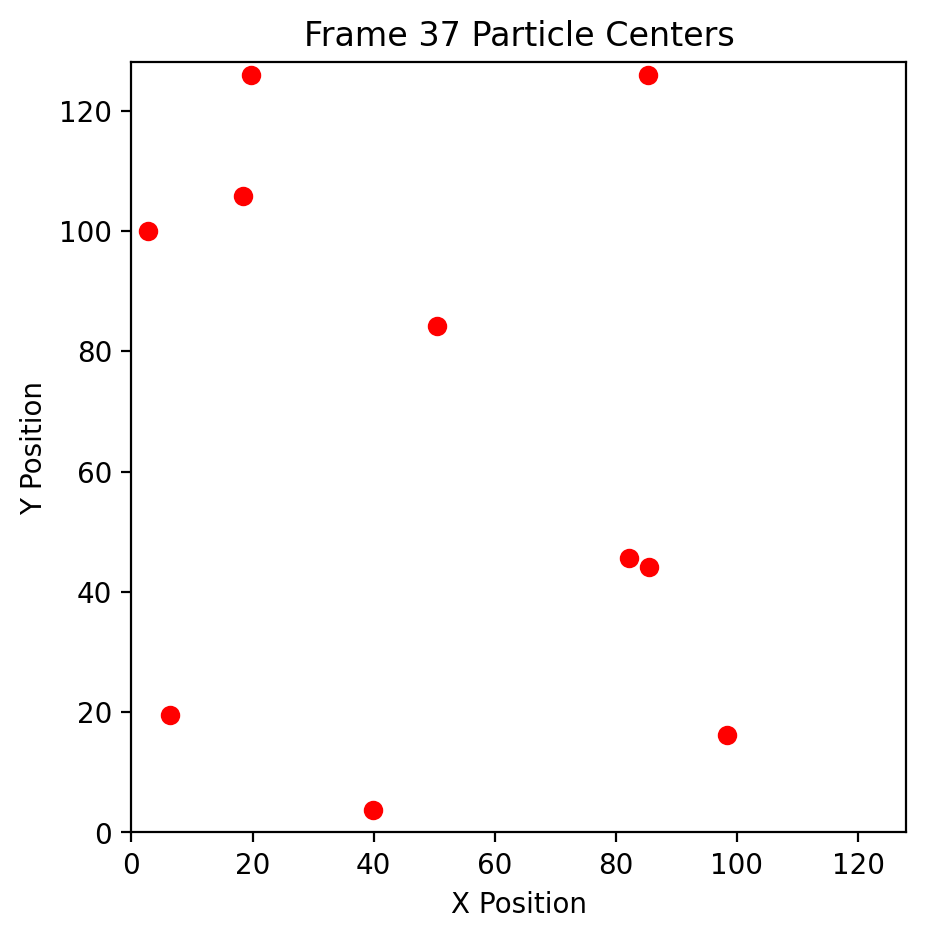

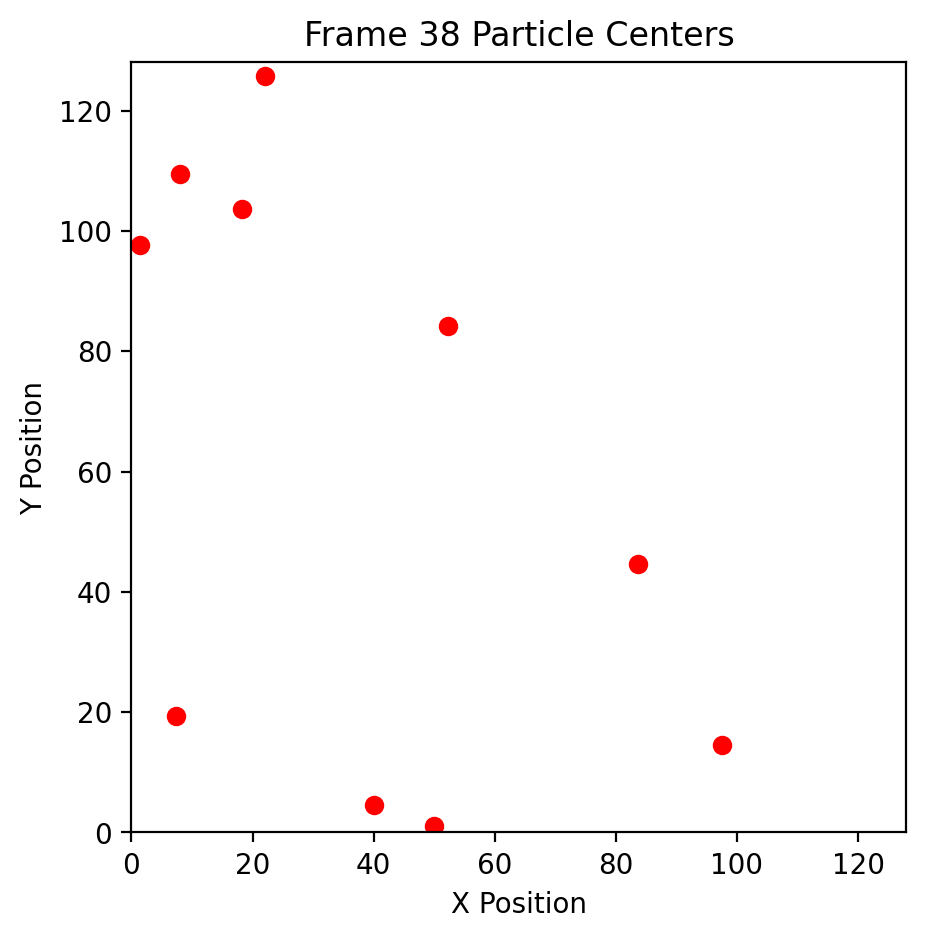

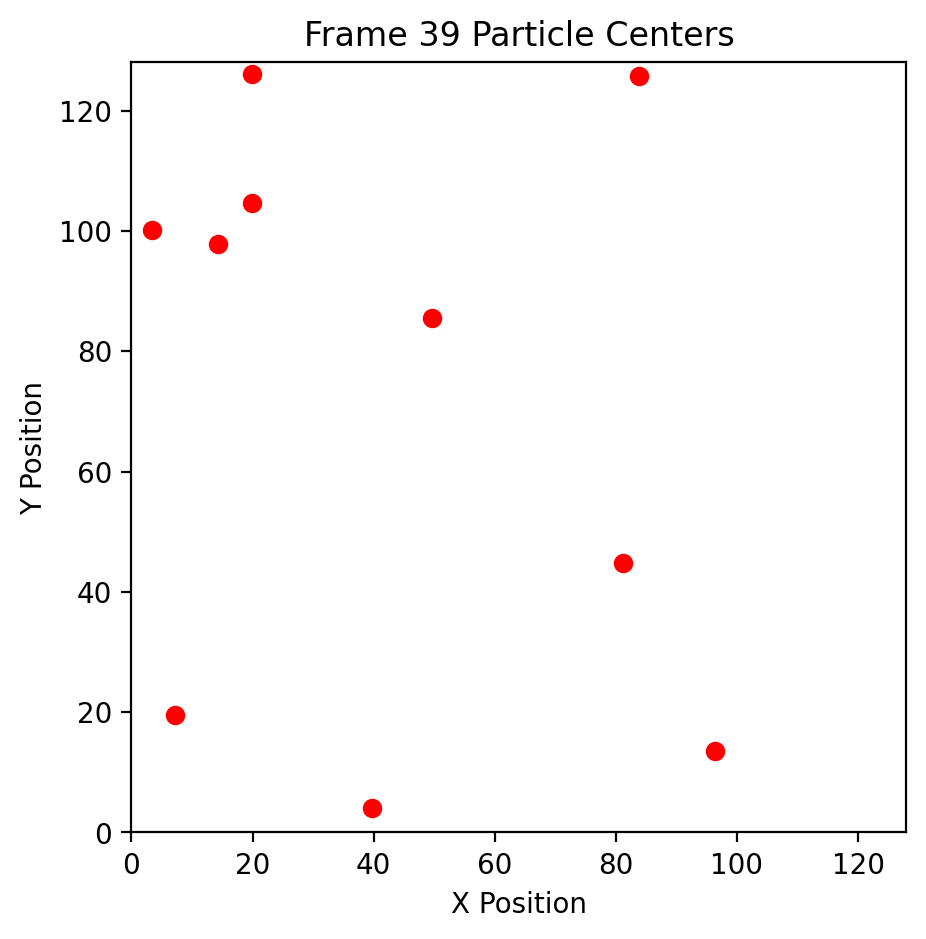

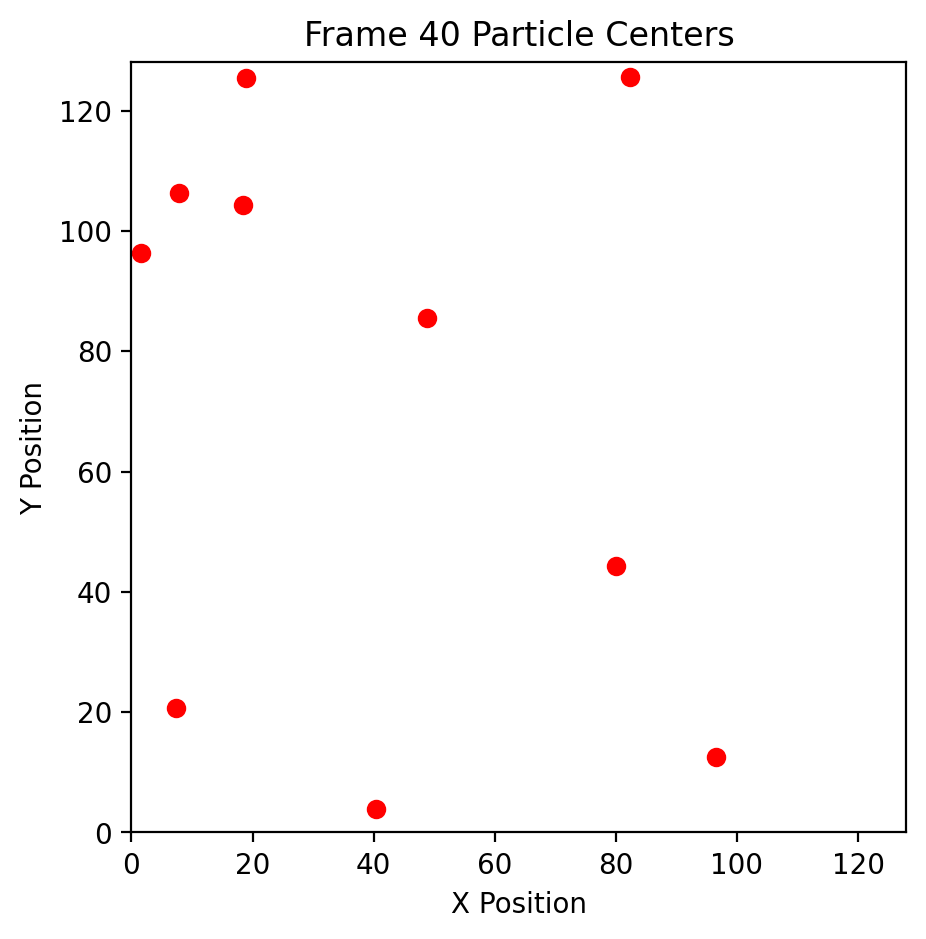

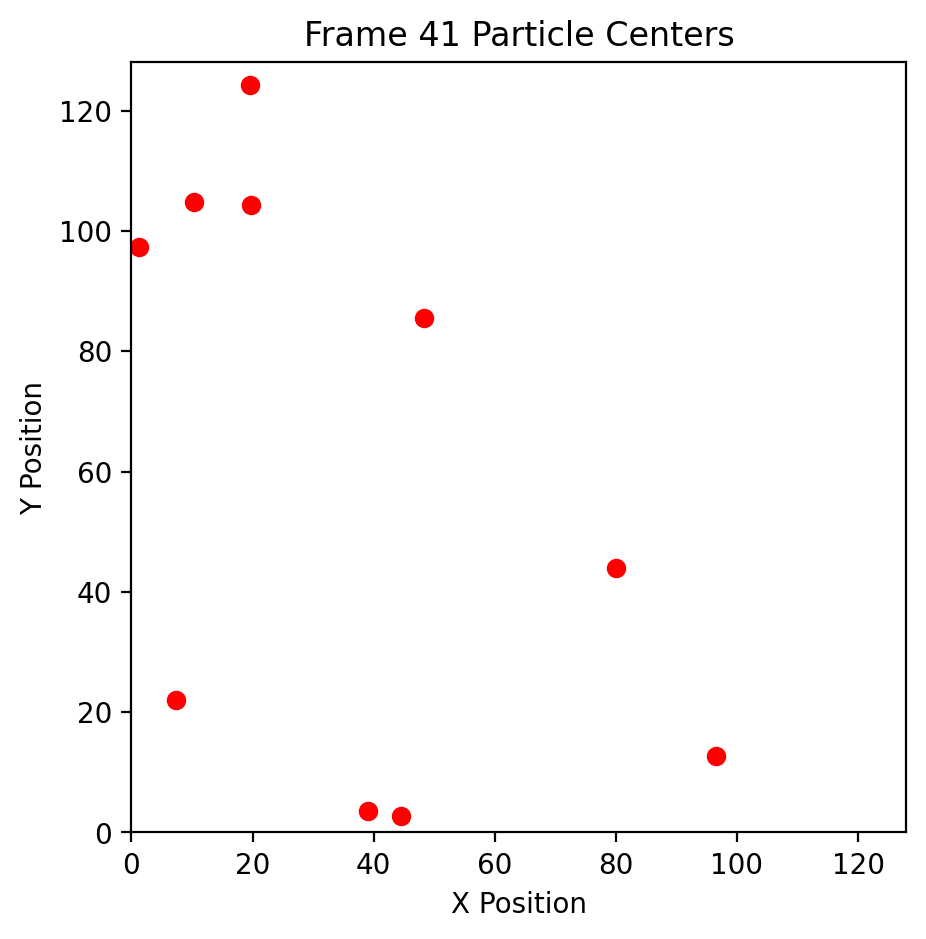

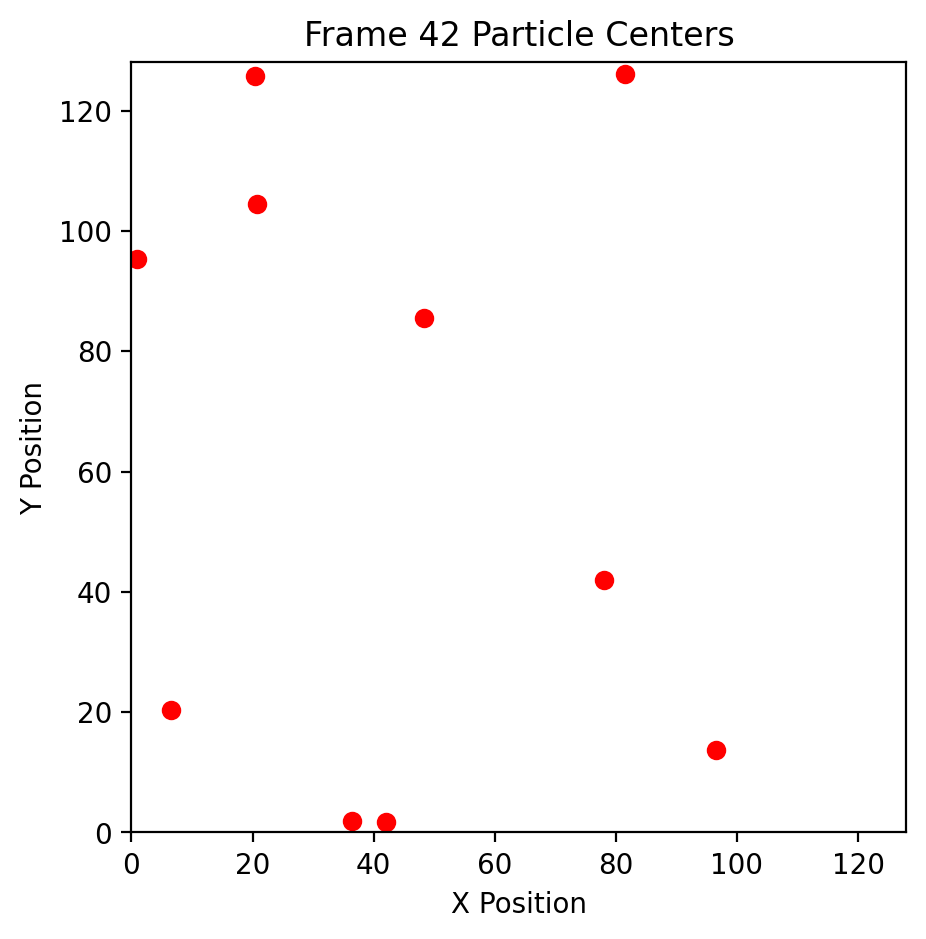

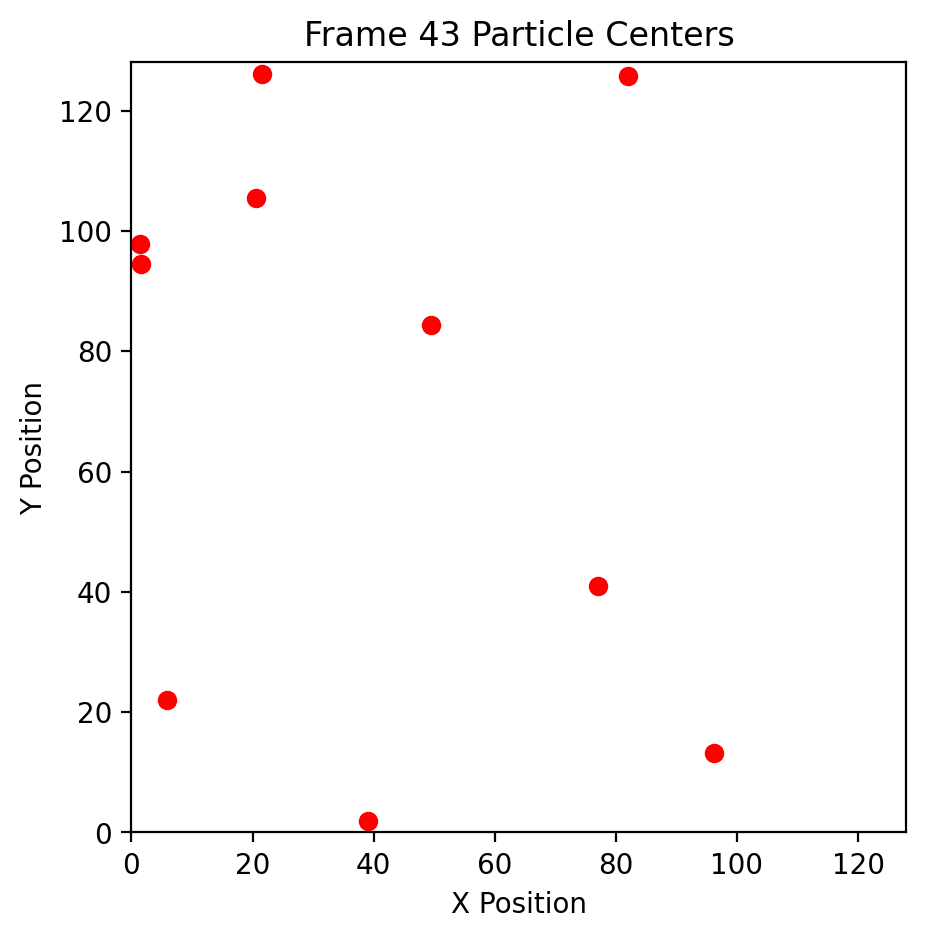

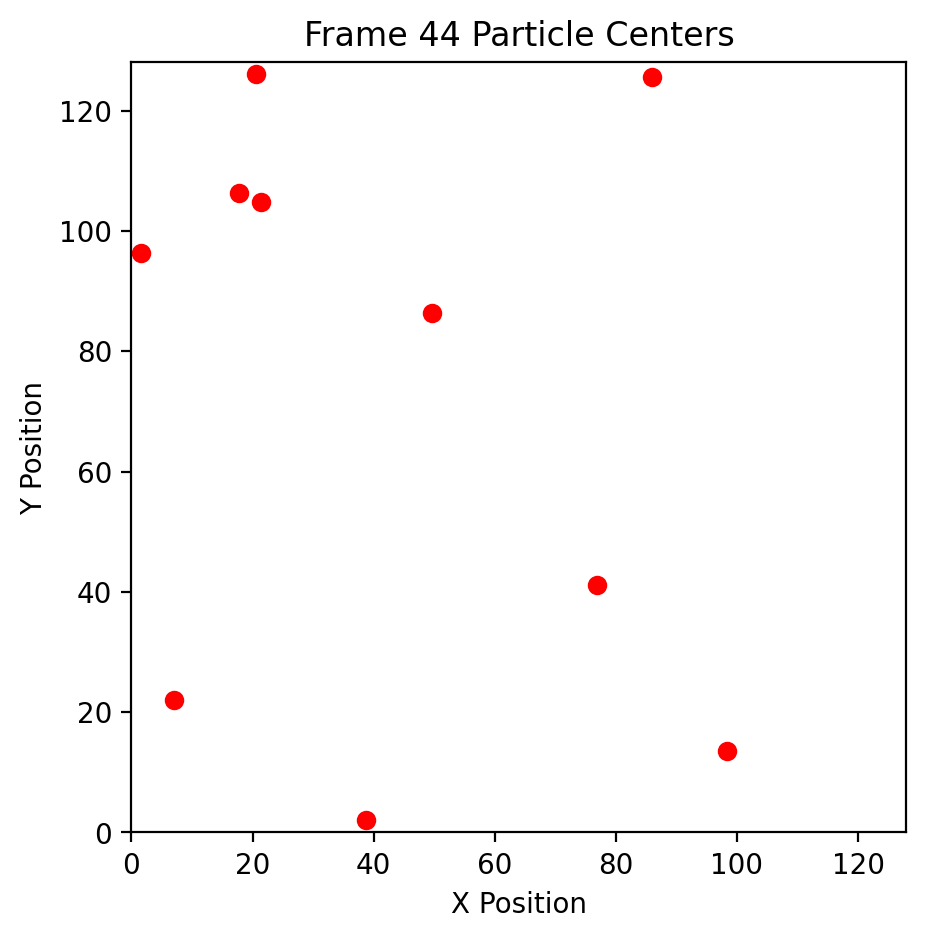

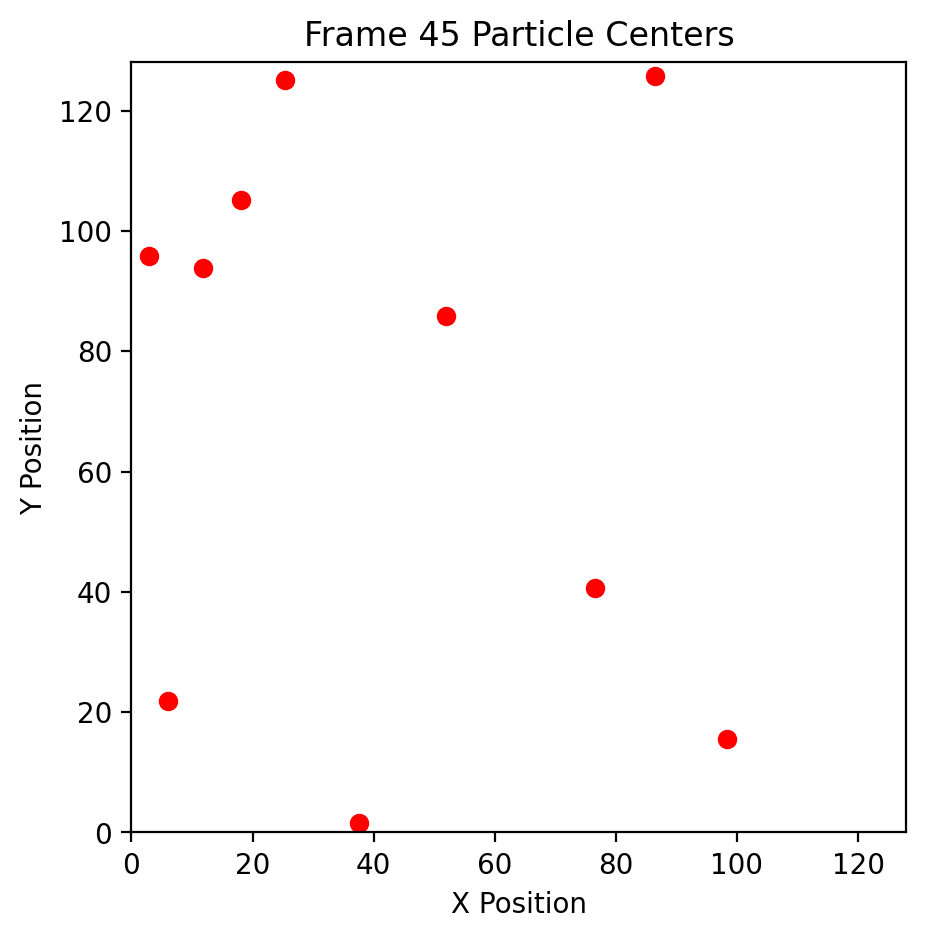

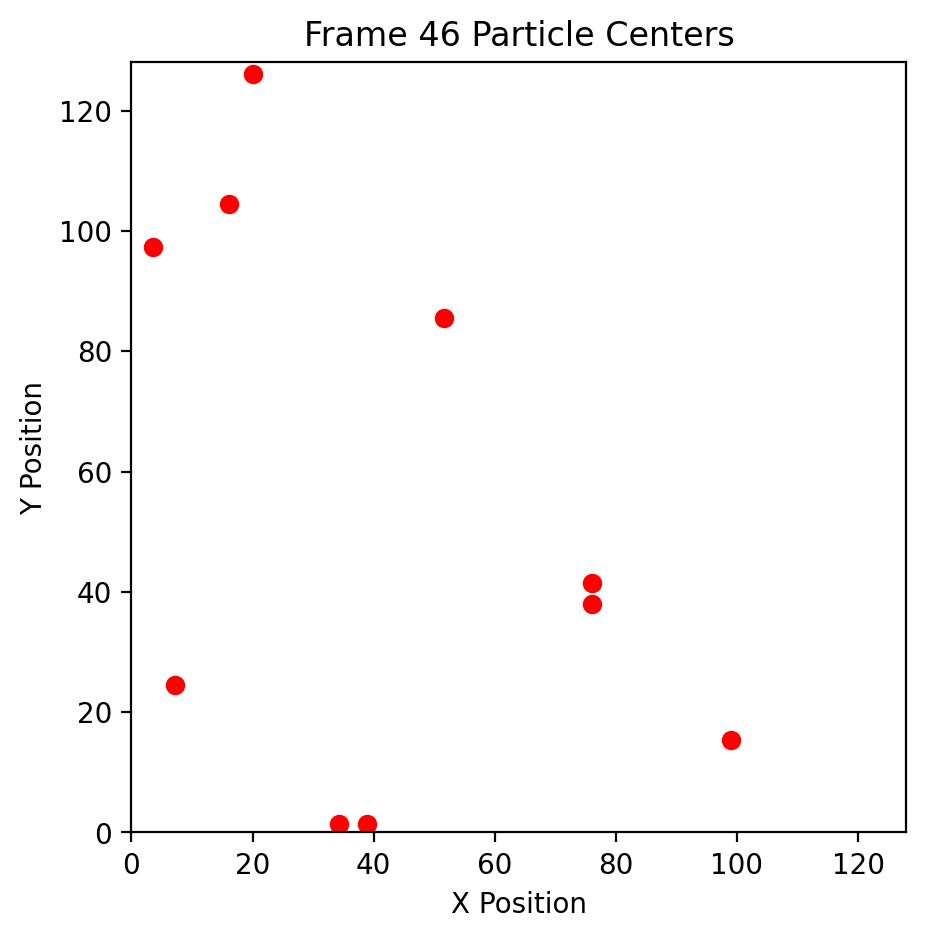

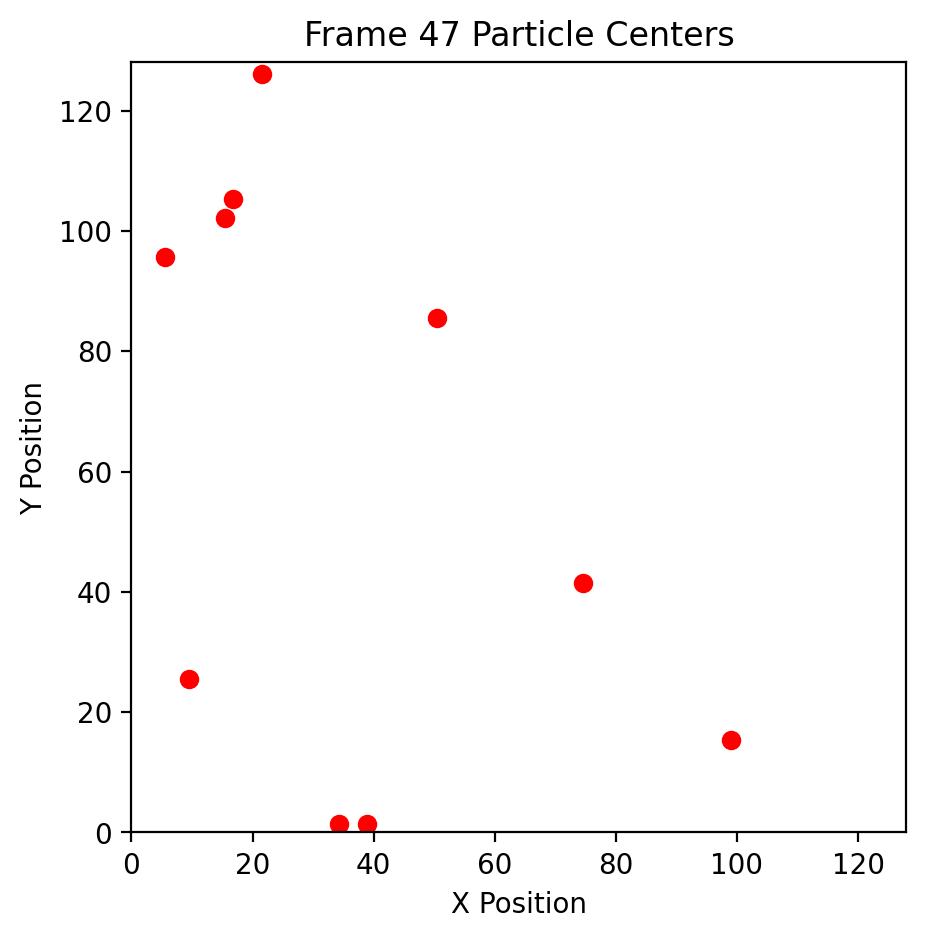

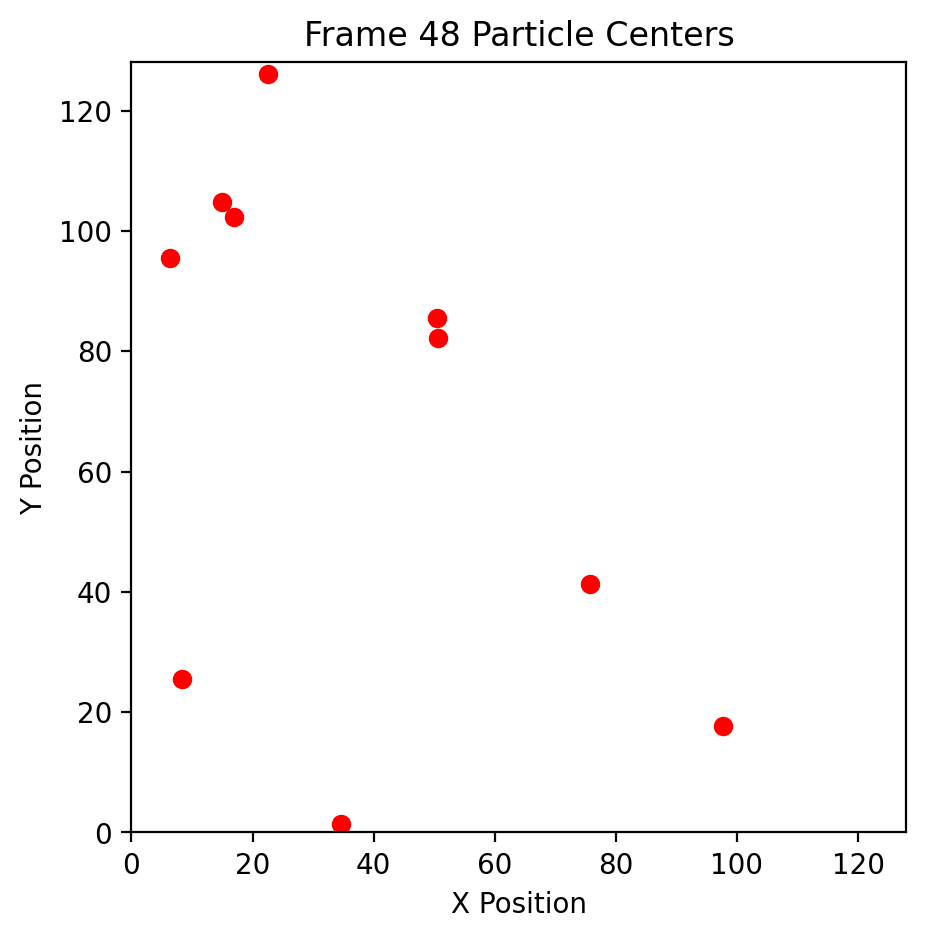

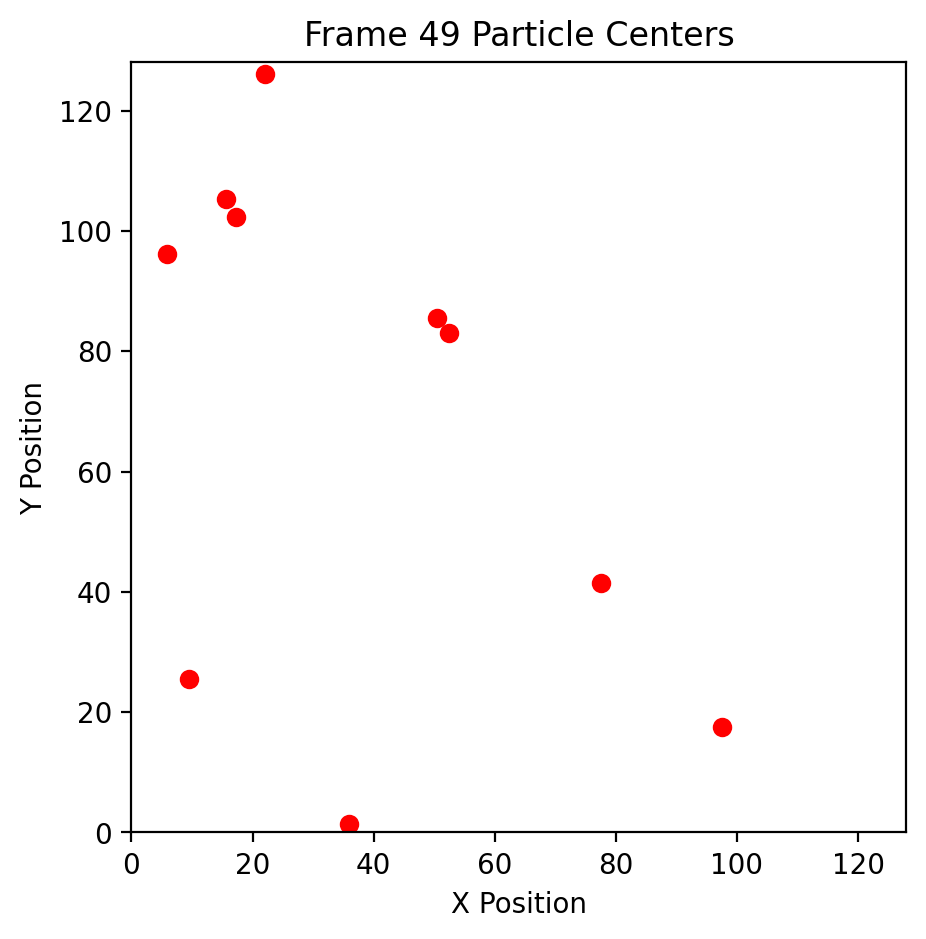

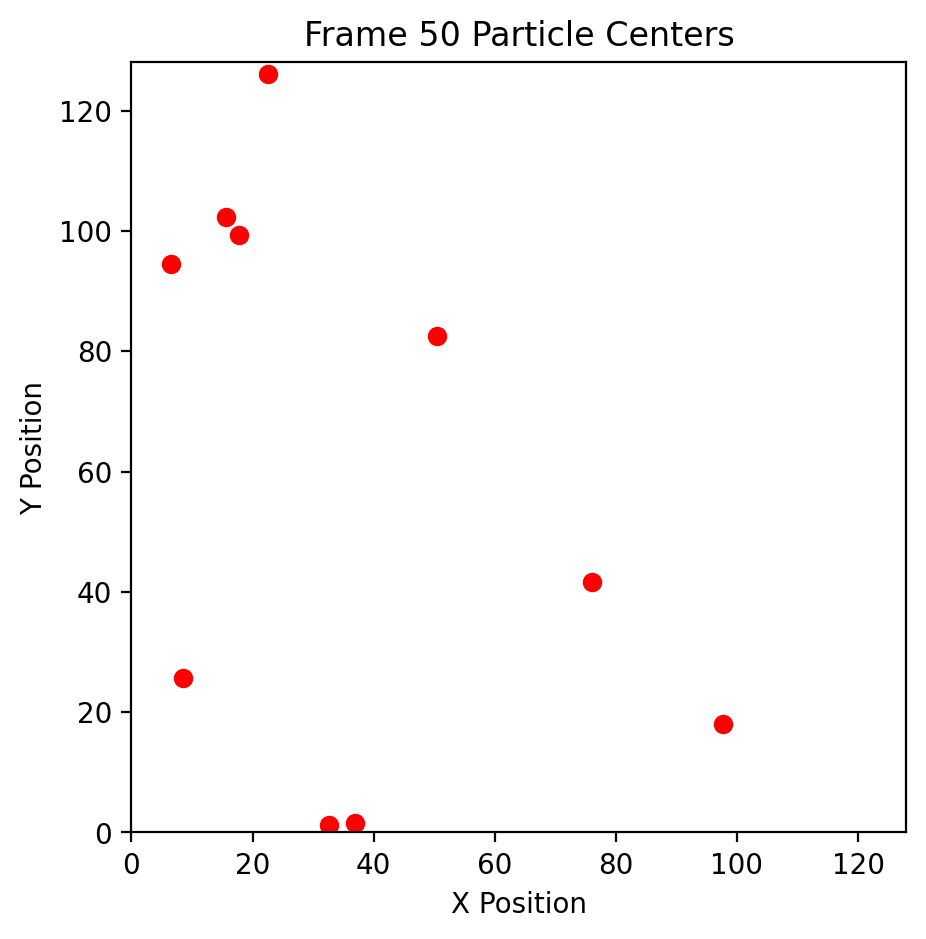

In [62]:
# Iterate through centers_per_frame and plot a scatter plot for each frame
for i, centers in enumerate(centers_per_frame):
    plt.figure(figsize=(5, 5))
    plt.scatter(centers[:, 1], centers[:, 0], c='r', marker='o')  # Mark particle centers with red circles
    plt.title(f"Frame {i + 1} Particle Centers")
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.xlim(0, 128)
    plt.ylim(0, 128)

plt.show()